# Import Statements

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Lasso, LogisticRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, accuracy_score, log_loss
from sklearn.dummy import DummyRegressor, DummyClassifier
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc
from sklearn.metrics import f1_score, classification_report, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Data Loading - Listings and Reviews
- Raw Listings Data from Inside AirBnb Website
- Reviews Dataset from Inside AirBnb is first cleansed using the Code Review_Preprocessing.ipynb and then used here

In [2]:
listings = pd.read_csv("/Users/abhik_bhattacharjee/Desktop/MSc CS IS SEM 1/Machine Learning/Final Assignment/Data/listings.csv")
reviews = pd.read_csv("/Users/abhik_bhattacharjee/Desktop/MSc CS IS SEM 1/Machine Learning/Final Assignment/Data/review_final_tfidf.csv")

# Listings Data Pre-Processing
Listings data Pre-Processing involves the following steps:
- Splitting the amenities and logically clustering them into 9 different categories
- Splitting the host contact details into 3 categories namely host_email, host_phone, host_work and host_work_email
- Handling of NaN values
- Merging the Listings data with the Cleansed Reviews Dataset
- Dropping the columns which are not required while building a Machine Learning Model
- Missing Data Imputation
- Pre-Processing of Features 'price', 'host_response_rate' and 'host_acceptance_rate'
- Exploratory Data Analysis
    - Neighbourhood Analysis
    - Statistical Analysis
    - Density Plots for all 7 Target Variables (Review Scores)
- Label Encodings
- Data Scaling

## Splitting the amenities and logically clustering them into 9 different categories

In [3]:
amenities = listings['amenities'].str.split(',', expand=True)
amenities = amenities.loc[amenities[77].notnull()]
amenities_list = amenities.iloc[0]
amenities_list = amenities_list.to_list()

In [4]:
listings.loc[listings['amenities'].str.contains('Hot Water|Shower gel|Hair dryer|Bathtub|Shampoo|Essentials|Bidet|Conditioner|Body soap|Baby bath'), 
             'bath-products'] = 1
listings.loc[listings['amenities'].str.contains('Bluetooth sound system|Ethernet connection|Heating|Pocket wifi|Cable TV|Wifi'), 
             'electric-system'] = 1
listings.loc[listings['amenities'].str.contains('Breakfast'), 
             'food-services'] = 1
listings.loc[listings['amenities'].str.contains('Outdoor furniture|Dining table|Hangers|High chair|Crib|Clothing storage: wardrobe|Dedicated workspace|Drying rack for clothing|Bed linens|Extra pillows and blankets'), 
             'house-furniture'] = 1
listings.loc[listings['amenities'].str.contains('Cleaning before checkout|Luggage dropoff allowed|Long term stays allowed'), 
             'house-rules'] = 1
listings.loc[listings['amenities'].str.contains('Oven|Hot water kettle|Kitchen|Cooking basics|Microwave|Fire pit|Dishes and silverware|Barbecue utensils|Cleaning products|Baking sheet|Free washer|Free dryer|Iron|Dishwasher|Freezer|Coffee maker|Refrigerator|Toaster|dinnerware|BBQ grill|Stove|Wine glasses'), 
                          'kitchen-appliances'] = 1
listings.loc[listings['amenities'].str.contains('Free parking on premises|Free street parking'), 
             'parking'] = 1
listings.loc[listings['amenities'].str.contains('Board games|Indoor fireplace|Bikes|Shared patio or balcony|Private fenced garden or backyard|crib|books and toys|Outdoor dining area|Private gym in building|Piano|HDTV with Netflix|premium cable|standard cable'), 
             'recreation'] = 1
listings.loc[listings['amenities'].str.contains('Fire extinguisher|Carbon monoxide alarm|Window guards|Fireplace guards|First aid kit|Baby monitor|Private entrance|Lockbox|Smoke alarm|Room-darkening shades|Baby safety gates'), 
             'safety'] = 1

## Splitting the host contact details into 3 categories namely host_email, host_phone, host_work and host_work_email

In [5]:
host_verification = listings['host_verifications'].str.split(',', expand=True)

In [6]:
listings.loc[listings['host_verifications'].str.contains('email'), 
             'host_email'] = 1
listings.loc[listings['host_verifications'].str.contains('phone'), 
             'host_phone'] = 1
listings.loc[listings['host_verifications'].str.contains('work_email'), 
             'host_work_email'] = 1

## Handling of NaN values of New Feature Columns Created

In [7]:
new_feature_cols = listings.iloc[:,75:].columns
listings[new_feature_cols] = listings[new_feature_cols].fillna(0)

## Merging the Listings data with the Cleansed Reviews Dataset

In [8]:
listings = listings.merge(reviews, how='inner', left_on='id', right_on='listing_id')

## Dropping the columns which are not required while building a Machine Learning Model

### Plot %NaN Values

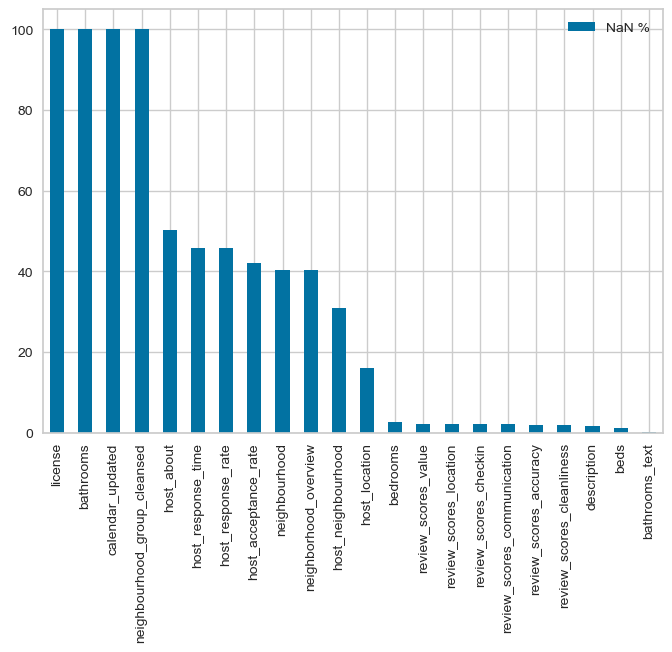

In [9]:
import matplotlib.pyplot as plt
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'NaN %' :na_df})
        missing_data.plot(kind = "bar")
        plt.show()
    else:
        print('No NAs found')
plot_nas(listings)

### Column Drop List

In [10]:
not_needed_columns = [
    'id','listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 
    'picture_url', 'host_id', 'host_url', 'host_name', 'host_location',
    'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
    'neighbourhood', 'neighbourhood_group_cleansed', 
    'calendar_updated', 'first_review', 'last_review', 'license', 
    'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 
    'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
    'description', 'neighborhood_overview', 'host_verifications','host_since', 
    'bathrooms', 'bathrooms_text', 'amenities', 'availability_30', 
    'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 
    'number_of_reviews_ltm', 'number_of_reviews_l30d', 'host_has_profile_pic', 'property_type',
    'minimum_minimum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm',
    'minimum_maximum_nights', 'maximum_minimum_nights', 'maximum_nights_avg_ntm'
    ]

In [11]:
listings.drop(not_needed_columns, axis = 1, inplace = True)
listings = listings.dropna()

## Missing Data Imputation

In [12]:
imputation_cols = ['bedrooms', 'beds']
for i in imputation_cols:
    listings.loc[listings.loc[:,i].isnull(),i] = listings.loc[:,i].median()

## Pre-Processing of Features 'price', 'host_response_rate' and 'host_acceptance_rate'

In [13]:
listings['price'] = listings['price'].str.replace('$', '')
listings['price'] = listings['price'].str.replace(',', '')
listings['price'] = pd.to_numeric(listings['price'])
listings['host_response_rate'] = listings["host_response_rate"].str.replace("%","")
listings['host_response_rate'] = pd.to_numeric(listings['host_response_rate'])
listings['host_acceptance_rate'] = listings["host_acceptance_rate"].str.replace("%","")
listings['host_acceptance_rate'] = pd.to_numeric(listings['host_acceptance_rate'])

(0.0, 1750.0)

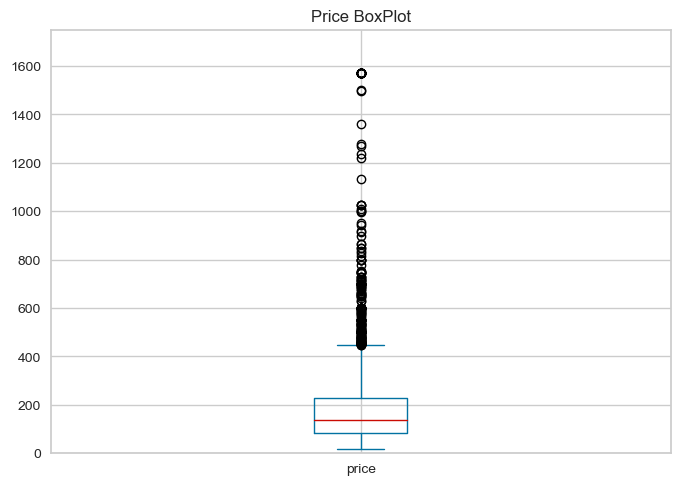

In [14]:
listings[['price']].plot(kind='box', title='Price BoxPlot')
plt.ylim(0,1750)

### Outlier Removal for the Feature 'price'

In [15]:
listings = listings[listings.price > 50]
listings = listings[listings.price <= 300]

<AxesSubplot:title={'center':'Price BoxPlot'}>

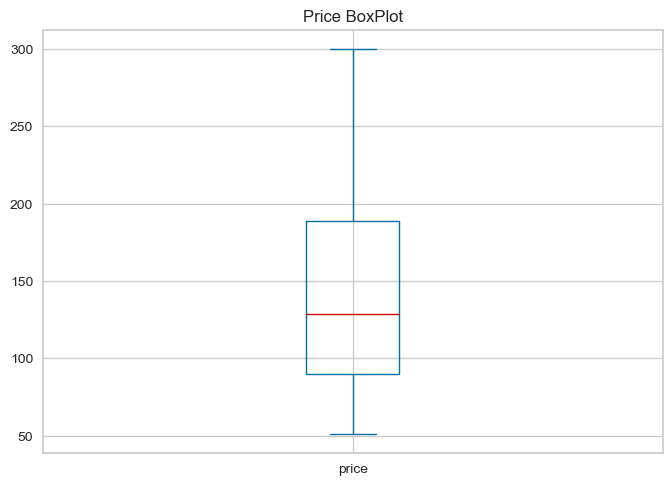

In [16]:
listings[['price']].plot(kind='box', title='Price BoxPlot')

# Exploratory Data Analysis
- Neighbourhood Analysis
- Statistical Analysis
- Density Plots for all 7 Target Variables (Review Scores)

## Neighbourhood Analysis

In [17]:
listings.neighbourhood_cleansed.unique()

array(['Dn Laoghaire-Rathdown', 'Dublin City', 'Fingal', 'South Dublin'],
      dtype=object)

In [18]:
listings.groupby('neighbourhood_cleansed').host_response_time.count()

neighbourhood_cleansed
Dn Laoghaire-Rathdown     341
Dublin City              1654
Fingal                    327
South Dublin              134
Name: host_response_time, dtype: int64

In [19]:
neighbourhood_DF=listings.groupby('neighbourhood_cleansed').host_response_time.count()
neighbourhood_DF=neighbourhood_DF.reset_index()
neighbourhood_DF=neighbourhood_DF.rename(columns={'host_response_time':'Number_Of_Listings'})

<AxesSubplot:title={'center':'Dublin Neighborhood Frequency'}, xlabel='neighbourhood_cleansed'>

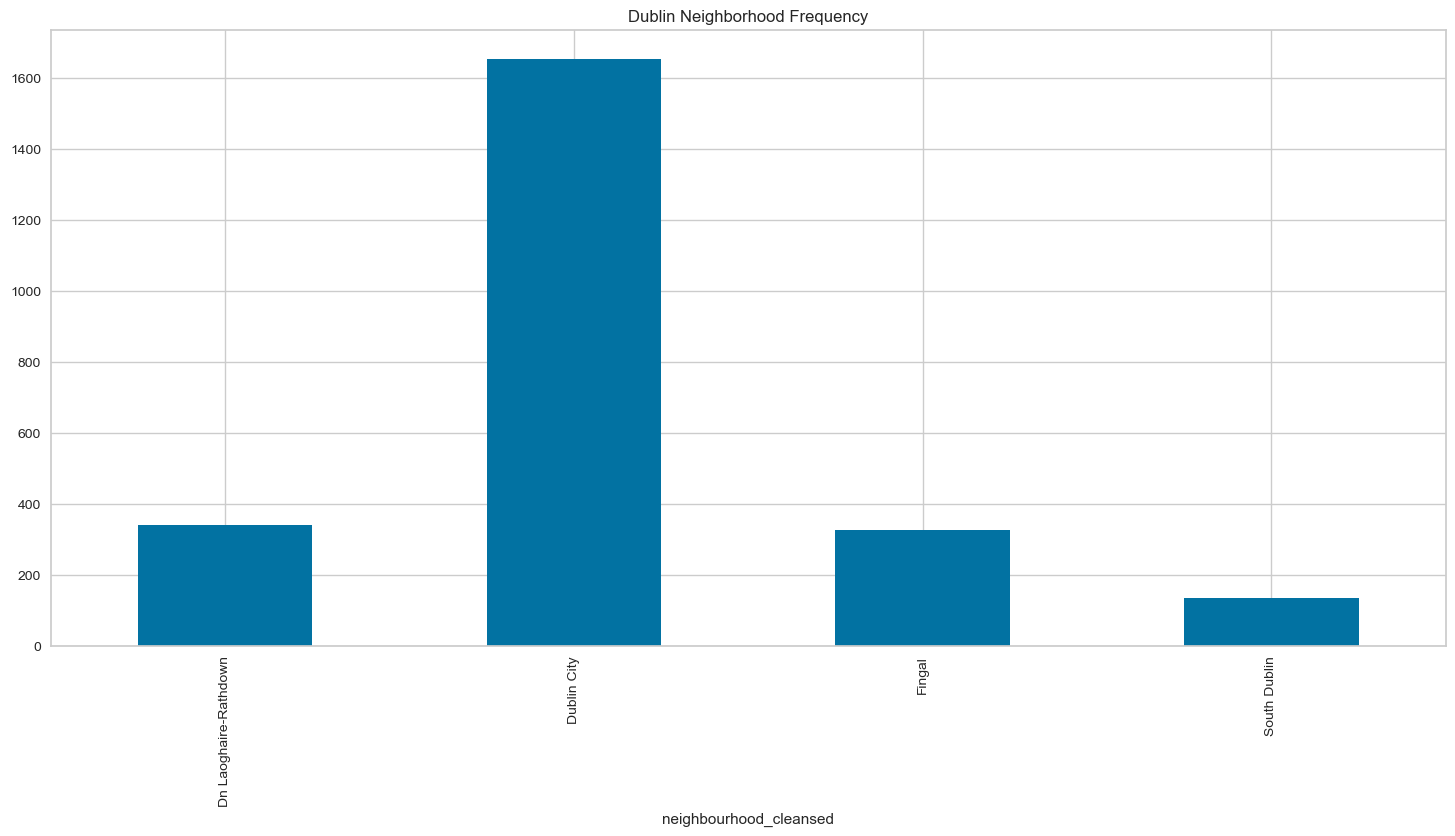

In [20]:
neighbourhood_DF.plot(kind='bar', 
           x='neighbourhood_cleansed',
           y='Number_Of_Listings',
           figsize =(18,8), 
           title = 'Dublin Neighborhood Frequency', 
           legend = False)

## Statistical Analysis

In [21]:
print(listings.review_scores_accuracy.mean())
print(listings.review_scores_checkin.mean())
print(listings.review_scores_cleanliness.mean())
print(listings.review_scores_communication.mean())
print(listings.review_scores_location.mean())
print(listings.review_scores_rating.mean())
print(listings.review_scores_value.mean())

4.802870521172625
4.8528542345276735
4.715549674267092
4.862414495113992
4.764776058631911
4.749352605863186
4.64558224755699


In [22]:
print(listings.review_scores_accuracy.median())
print(listings.review_scores_checkin.median())
print(listings.review_scores_cleanliness.median())
print(listings.review_scores_communication.median())
print(listings.review_scores_location.median())
print(listings.review_scores_rating.median())
print(listings.review_scores_value.median())

4.89
4.95
4.83
4.95
4.83
4.84
4.73


In [23]:
print(listings.review_scores_accuracy.mode())
print(listings.review_scores_checkin.mode())
print(listings.review_scores_cleanliness.mode())
print(listings.review_scores_communication.mode())
print(listings.review_scores_location.mode())
print(listings.review_scores_rating.mode())
print(listings.review_scores_value.mode())

0    5.0
Name: review_scores_accuracy, dtype: float64
0    5.0
Name: review_scores_checkin, dtype: float64
0    5.0
Name: review_scores_cleanliness, dtype: float64
0    5.0
Name: review_scores_communication, dtype: float64
0    5.0
Name: review_scores_location, dtype: float64
0    5.0
Name: review_scores_rating, dtype: float64
0    5.0
Name: review_scores_value, dtype: float64


In [24]:
print(listings.review_scores_accuracy.min())
print(listings.review_scores_checkin.min())
print(listings.review_scores_cleanliness.min())
print(listings.review_scores_communication.min())
print(listings.review_scores_location.min())
print(listings.review_scores_rating.min())
print(listings.review_scores_value.min())

1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [25]:
print(listings.review_scores_accuracy.max())
print(listings.review_scores_checkin.max())
print(listings.review_scores_cleanliness.max())
print(listings.review_scores_communication.max())
print(listings.review_scores_location.max())
print(listings.review_scores_rating.max())
print(listings.review_scores_value.max())

5.0
5.0
5.0
5.0
5.0
5.0
5.0


## Density Plots for all 7 Target Variables (Review Scores)

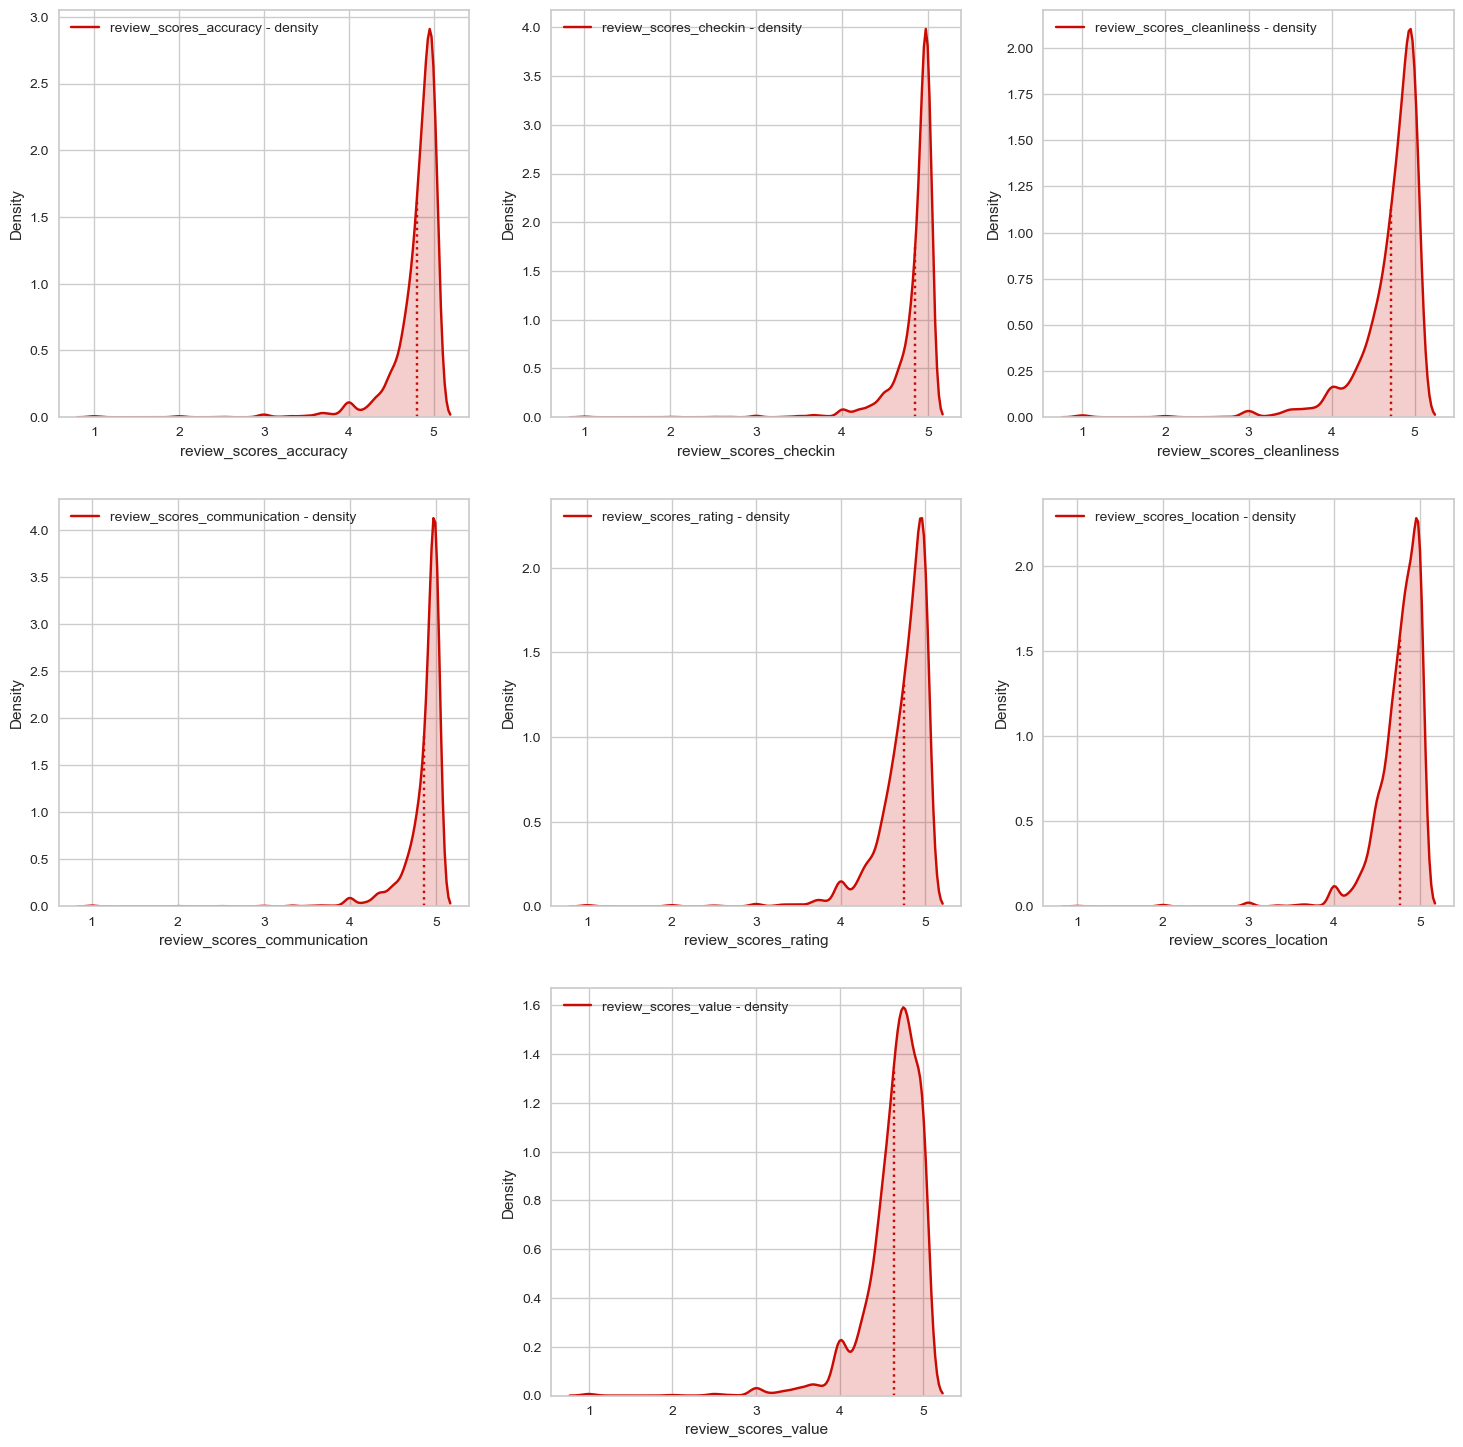

In [26]:
plt.figure(figsize=(18, 18))
plt.subplot(3, 3, 1)
review_scores_accuracy_density = sns.kdeplot(listings.review_scores_accuracy, color="r", 
                                             label='review_scores_accuracy - density')
x_review_scores_accuracy = review_scores_accuracy_density.lines[0].get_xdata()
y_review_scores_accuracy = review_scores_accuracy_density.lines[0].get_ydata()
mean_review_scores_accuracy_density = listings.review_scores_accuracy.mean()
height_review_scores_accuracy = np.interp(mean_review_scores_accuracy_density, x_review_scores_accuracy, 
                                                   y_review_scores_accuracy)
review_scores_accuracy_density.vlines(mean_review_scores_accuracy_density, 0, height_review_scores_accuracy, 
                                      color='r', ls=':')
review_scores_accuracy_density.fill_between(x_review_scores_accuracy, 0, y_review_scores_accuracy, 
                                            facecolor='r', alpha=0.2)
plt.legend()


plt.subplot(3, 3, 2)
review_scores_checkin_density = sns.kdeplot(listings.review_scores_checkin, color="r", 
                                             label='review_scores_checkin - density')
x_review_scores_checkin = review_scores_checkin_density.lines[0].get_xdata()
y_review_scores_checkin = review_scores_checkin_density.lines[0].get_ydata()
mean_review_scores_checkin_density = listings.review_scores_checkin.mean()
height_review_scores_checkin = np.interp(mean_review_scores_checkin_density, x_review_scores_checkin, 
                                                   y_review_scores_checkin)
review_scores_checkin_density.vlines(mean_review_scores_checkin_density, 0, height_review_scores_checkin, 
                                      color='r', ls=':')
review_scores_checkin_density.fill_between(x_review_scores_checkin, 0, y_review_scores_checkin, 
                                            facecolor='r', alpha=0.2)
plt.legend()



plt.subplot(3, 3, 3)
review_scores_cleanliness_density = sns.kdeplot(listings.review_scores_cleanliness, color="r", 
                                             label='review_scores_cleanliness - density')
x_review_scores_cleanliness = review_scores_cleanliness_density.lines[0].get_xdata()
y_review_scores_cleanliness = review_scores_cleanliness_density.lines[0].get_ydata()
mean_review_scores_cleanliness_density = listings.review_scores_cleanliness.mean()
height_review_scores_cleanliness = np.interp(mean_review_scores_cleanliness_density, x_review_scores_cleanliness, 
                                                   y_review_scores_cleanliness)
review_scores_cleanliness_density.vlines(mean_review_scores_cleanliness_density, 0, height_review_scores_cleanliness, 
                                      color='r', ls=':')
review_scores_cleanliness_density.fill_between(x_review_scores_cleanliness, 0, y_review_scores_cleanliness, 
                                            facecolor='r', alpha=0.2)
plt.legend()


plt.subplot(3, 3, 4)
review_scores_communication_density = sns.kdeplot(listings.review_scores_communication, color="r", 
                                             label='review_scores_communication - density')
x_review_scores_communication = review_scores_communication_density.lines[0].get_xdata()
y_review_scores_communication = review_scores_communication_density.lines[0].get_ydata()
mean_review_scores_communication_density = listings.review_scores_communication.mean()
height_review_scores_communication = np.interp(mean_review_scores_communication_density, x_review_scores_communication, 
                                                   y_review_scores_communication)
review_scores_communication_density.vlines(mean_review_scores_communication_density, 0, height_review_scores_communication, 
                                      color='r', ls=':')
review_scores_communication_density.fill_between(x_review_scores_communication, 0, y_review_scores_communication, 
                                            facecolor='r', alpha=0.2)
plt.legend()

plt.subplot(3, 3, 5)
review_scores_rating_density = sns.kdeplot(listings.review_scores_rating, color="r", 
                                             label='review_scores_rating - density')
x_review_scores_rating = review_scores_rating_density.lines[0].get_xdata()
y_review_scores_rating = review_scores_rating_density.lines[0].get_ydata()
mean_review_scores_rating_density = listings.review_scores_rating.mean()
height_review_scores_rating = np.interp(mean_review_scores_rating_density, x_review_scores_rating, 
                                                   y_review_scores_rating)
review_scores_rating_density.vlines(mean_review_scores_rating_density, 0, height_review_scores_rating, 
                                      color='r', ls=':')
review_scores_rating_density.fill_between(x_review_scores_rating, 0, y_review_scores_rating, 
                                            facecolor='r', alpha=0.2)
plt.legend()


plt.subplot(3, 3, 6)
review_scores_location_density = sns.kdeplot(listings.review_scores_location, color="r", 
                                             label='review_scores_location - density')
x_review_scores_location = review_scores_location_density.lines[0].get_xdata()
y_review_scores_location = review_scores_location_density.lines[0].get_ydata()
mean_review_scores_location_density = listings.review_scores_location.mean()
height_review_scores_location = np.interp(mean_review_scores_location_density, x_review_scores_location, 
                                                   y_review_scores_location)
review_scores_location_density.vlines(mean_review_scores_location_density, 0, height_review_scores_location, 
                                      color='r', ls=':')
review_scores_location_density.fill_between(x_review_scores_location, 0, y_review_scores_location, 
                                            facecolor='r', alpha=0.2)
plt.legend()

plt.subplot(3, 3, 8)
review_scores_value_density = sns.kdeplot(listings.review_scores_value, color="r", 
                                             label='review_scores_value - density')
x_review_scores_value = review_scores_value_density.lines[0].get_xdata()
y_review_scores_value = review_scores_value_density.lines[0].get_ydata()
mean_review_scores_value_density = listings.review_scores_value.mean()
height_review_scores_value = np.interp(mean_review_scores_value_density, x_review_scores_value, 
                                                   y_review_scores_value)
review_scores_value_density.vlines(mean_review_scores_value_density, 0, height_review_scores_value, 
                                      color='r', ls=':')
review_scores_value_density.fill_between(x_review_scores_value, 0, y_review_scores_value, 
                                            facecolor='r', alpha=0.2)
plt.legend()

plt.show()

## Data Scaling

### Min Max Scaling

In [27]:
def minmax(X):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (X.max() - X.min()) + X.min()
    return X_scaled

### List of Columns to be Scaled

In [28]:
scaling_data = ['host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds',
                'host_listings_count', 'host_total_listings_count',
                'latitude', 'longitude', 'accommodates', 'price', 
                'minimum_nights', 'maximum_nights', 'number_of_reviews', 'num_cmt', #'avg_senti',
                'review_scores_rating', 'review_scores_accuracy', 
                'review_scores_cleanliness', 'review_scores_checkin', 
                'review_scores_communication', 'review_scores_location', 
                'review_scores_value', 'reviews_per_month','bath-products','electric-system',
                'food-services','house-furniture','house-rules',
                'kitchen-appliances','parking','recreation','safety',
                'host_email','host_work_email']

In [29]:
for i in scaling_data:
  listings[i] = minmax(listings[i])

## Label Encoding

In [30]:
listings.dropna(axis = 1, inplace = True)
label_encoder = preprocessing.LabelEncoder()
listings.host_response_time     = label_encoder.fit_transform(listings.host_response_time)
listings.host_is_superhost      = label_encoder.fit_transform(listings.host_is_superhost)
listings.host_identity_verified = label_encoder.fit_transform(listings.host_identity_verified)
listings.instant_bookable       = label_encoder.fit_transform(listings.instant_bookable)
listings.room_type              = label_encoder.fit_transform(listings.room_type)
listings.neighbourhood_cleansed = label_encoder.fit_transform(listings.neighbourhood_cleansed)
listings.has_availability       = label_encoder.fit_transform(listings.has_availability)

## Correlation Matrix

In [31]:
test_corr = listings.corr()
test_corr.to_csv("/Users/abhik_bhattacharjee/Desktop/MSc CS IS SEM 1/Machine Learning/Final Assignment/Data/corr.csv")

## Metrics Print Function

In [32]:
def print_metrics(y_test, y_pred):
    print("-"*10+"CONFUSION-MATRIX"+"-"*10)
    print(confusion_matrix(y_test, y_pred))

    print("-"*10+"CLASSIFICATION-REPORT"+"-"*10)
    print(classification_report(y_test, y_pred))

# Machine Learning Models
- 2 Types of Classification Models Trained for this particular use case
    - Logistic Regression
    - kNN Classifier

## Review Scores Accuracy

### Logistic Regression

#### Defining the Input Variables

In [33]:
X = listings[
                ['host_response_time', 'host_response_rate', 'host_acceptance_rate',
                 'bedrooms', 'beds','neighbourhood_cleansed',
                 'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
                 'host_identity_verified', 'room_type',
                 'accommodates','price', 'minimum_nights', 'maximum_nights',
                 'bath-products','electric-system',
                 'food-services','house-furniture','house-rules',
                 'kitchen-appliances','parking','recreation','safety',
                 'host_email','host_work_email'] + list(reviews.columns[2:])
]

#### Defining the Quantile Bins for the Target Variables

In [34]:
y = listings[['review_scores_accuracy']]
y = (y/y.max())*100

y = y.assign(
    rating_bin_ep = pd.qcut(
        y['review_scores_accuracy'],
        q=3,
        duplicates='drop',
        labels=[0,1,2]
    )
)

#### Min Max of Each Bin

In [35]:
y.groupby('rating_bin_ep').min()

review_scores_accuracy
rating_bin_ep                        
0                                20.0
1                                96.4
2                                99.2

In [36]:
y.groupby('rating_bin_ep').max()

review_scores_accuracy
rating_bin_ep                        
0                                96.2
1                                99.0
2                               100.0

#### Splitting the dataset into 75-25 Ratio for Training and Testing

In [37]:
y = y['rating_bin_ep']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### Number of Records in Each Bin

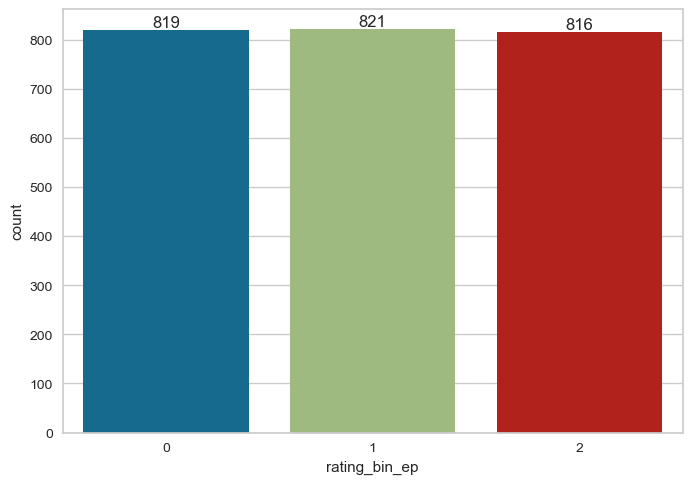

In [39]:
cnt_plt = sns.countplot(y)
cnt_plt.bar_label(cnt_plt.containers[0])
plt.show()

#### Logistic Regression - Varied C Range, using 'newton-cg' solver and multi_class='multinomial'

C =  0.001
Train accuracy score: 0.5211726384364821
Test accuracy score: 0.5472312703583062
Mean Squared Error:  1.014657980456026
C =  0.1
Train accuracy score: 0.5694896851248643
Test accuracy score: 0.5895765472312704
Mean Squared Error:  0.8061889250814332
C =  1
Train accuracy score: 0.5998914223669924
Test accuracy score: 0.5928338762214984
Mean Squared Error:  0.8078175895765473
C =  10
Train accuracy score: 0.6053203040173725
Test accuracy score: 0.5977198697068404
Mean Squared Error:  0.7785016286644951
C =  100
Train accuracy score: 0.6058631921824105
Test accuracy score: 0.5993485342019544
Mean Squared Error:  0.7671009771986971
C =  1000
Train accuracy score: 0.6058631921824105
Test accuracy score: 0.5993485342019544
Mean Squared Error:  0.7671009771986971


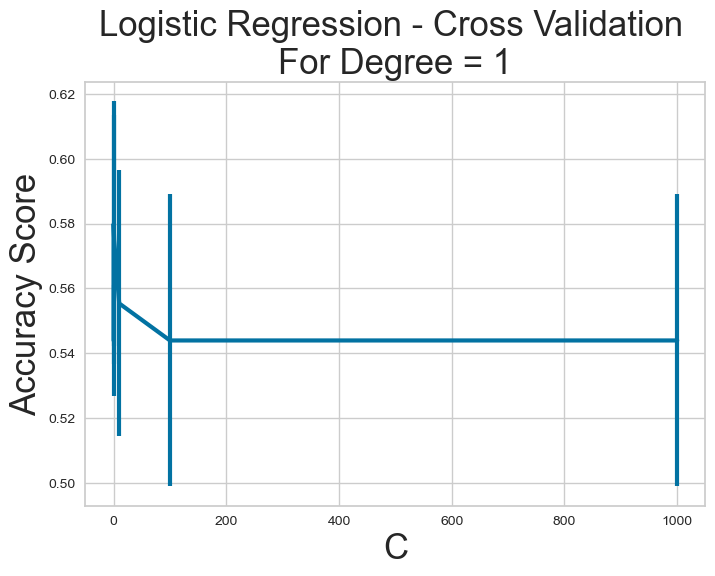

In [40]:
c_range = [0.001, 0.1, 1, 10, 100, 1000]
mean_error = []
std_error = []
for c in sorted(c_range):
    logit = LogisticRegression(C=c, random_state=0, solver='newton-cg',multi_class='multinomial')
    logit.fit(X_train, y_train)
    y_pred = logit.predict(X_test)
    print("C = ",c)
    print('Train accuracy score:',logit.score(X_train, y_train))
    print('Test accuracy score:',logit.score(X_test, y_test))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    scores = cross_val_score(logit, X_test, y_test, cv=5, scoring='accuracy')
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())
plt.errorbar(c_range, mean_error, yerr = std_error, linewidth=3)
plt.xlabel('C', fontsize=25)
plt.ylabel('Accuracy Score', fontsize=25)
title_cv = "Logistic Regression - Cross Validation \nFor Degree = 1"
plt.title(title_cv, fontsize=25)
plt.show()

#### ROC-AUC Curve for all three categories

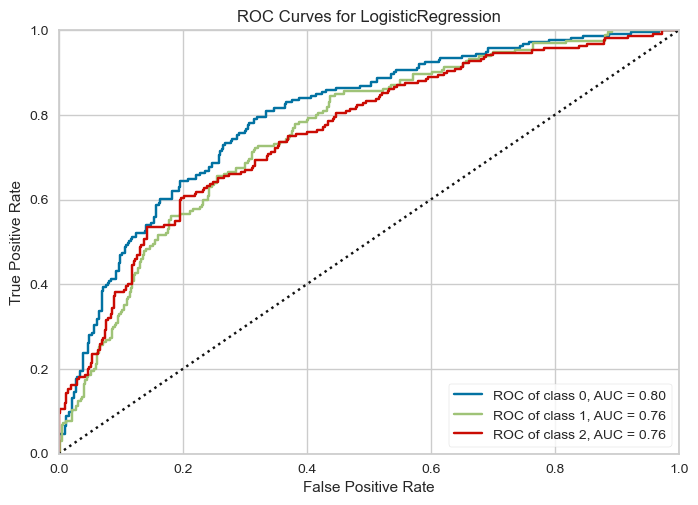

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [41]:
visualizer = ROCAUC(logit, classes=["0", "1", "2"], macro=False, micro=False)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)        
visualizer.show() 

#### Feature Importance

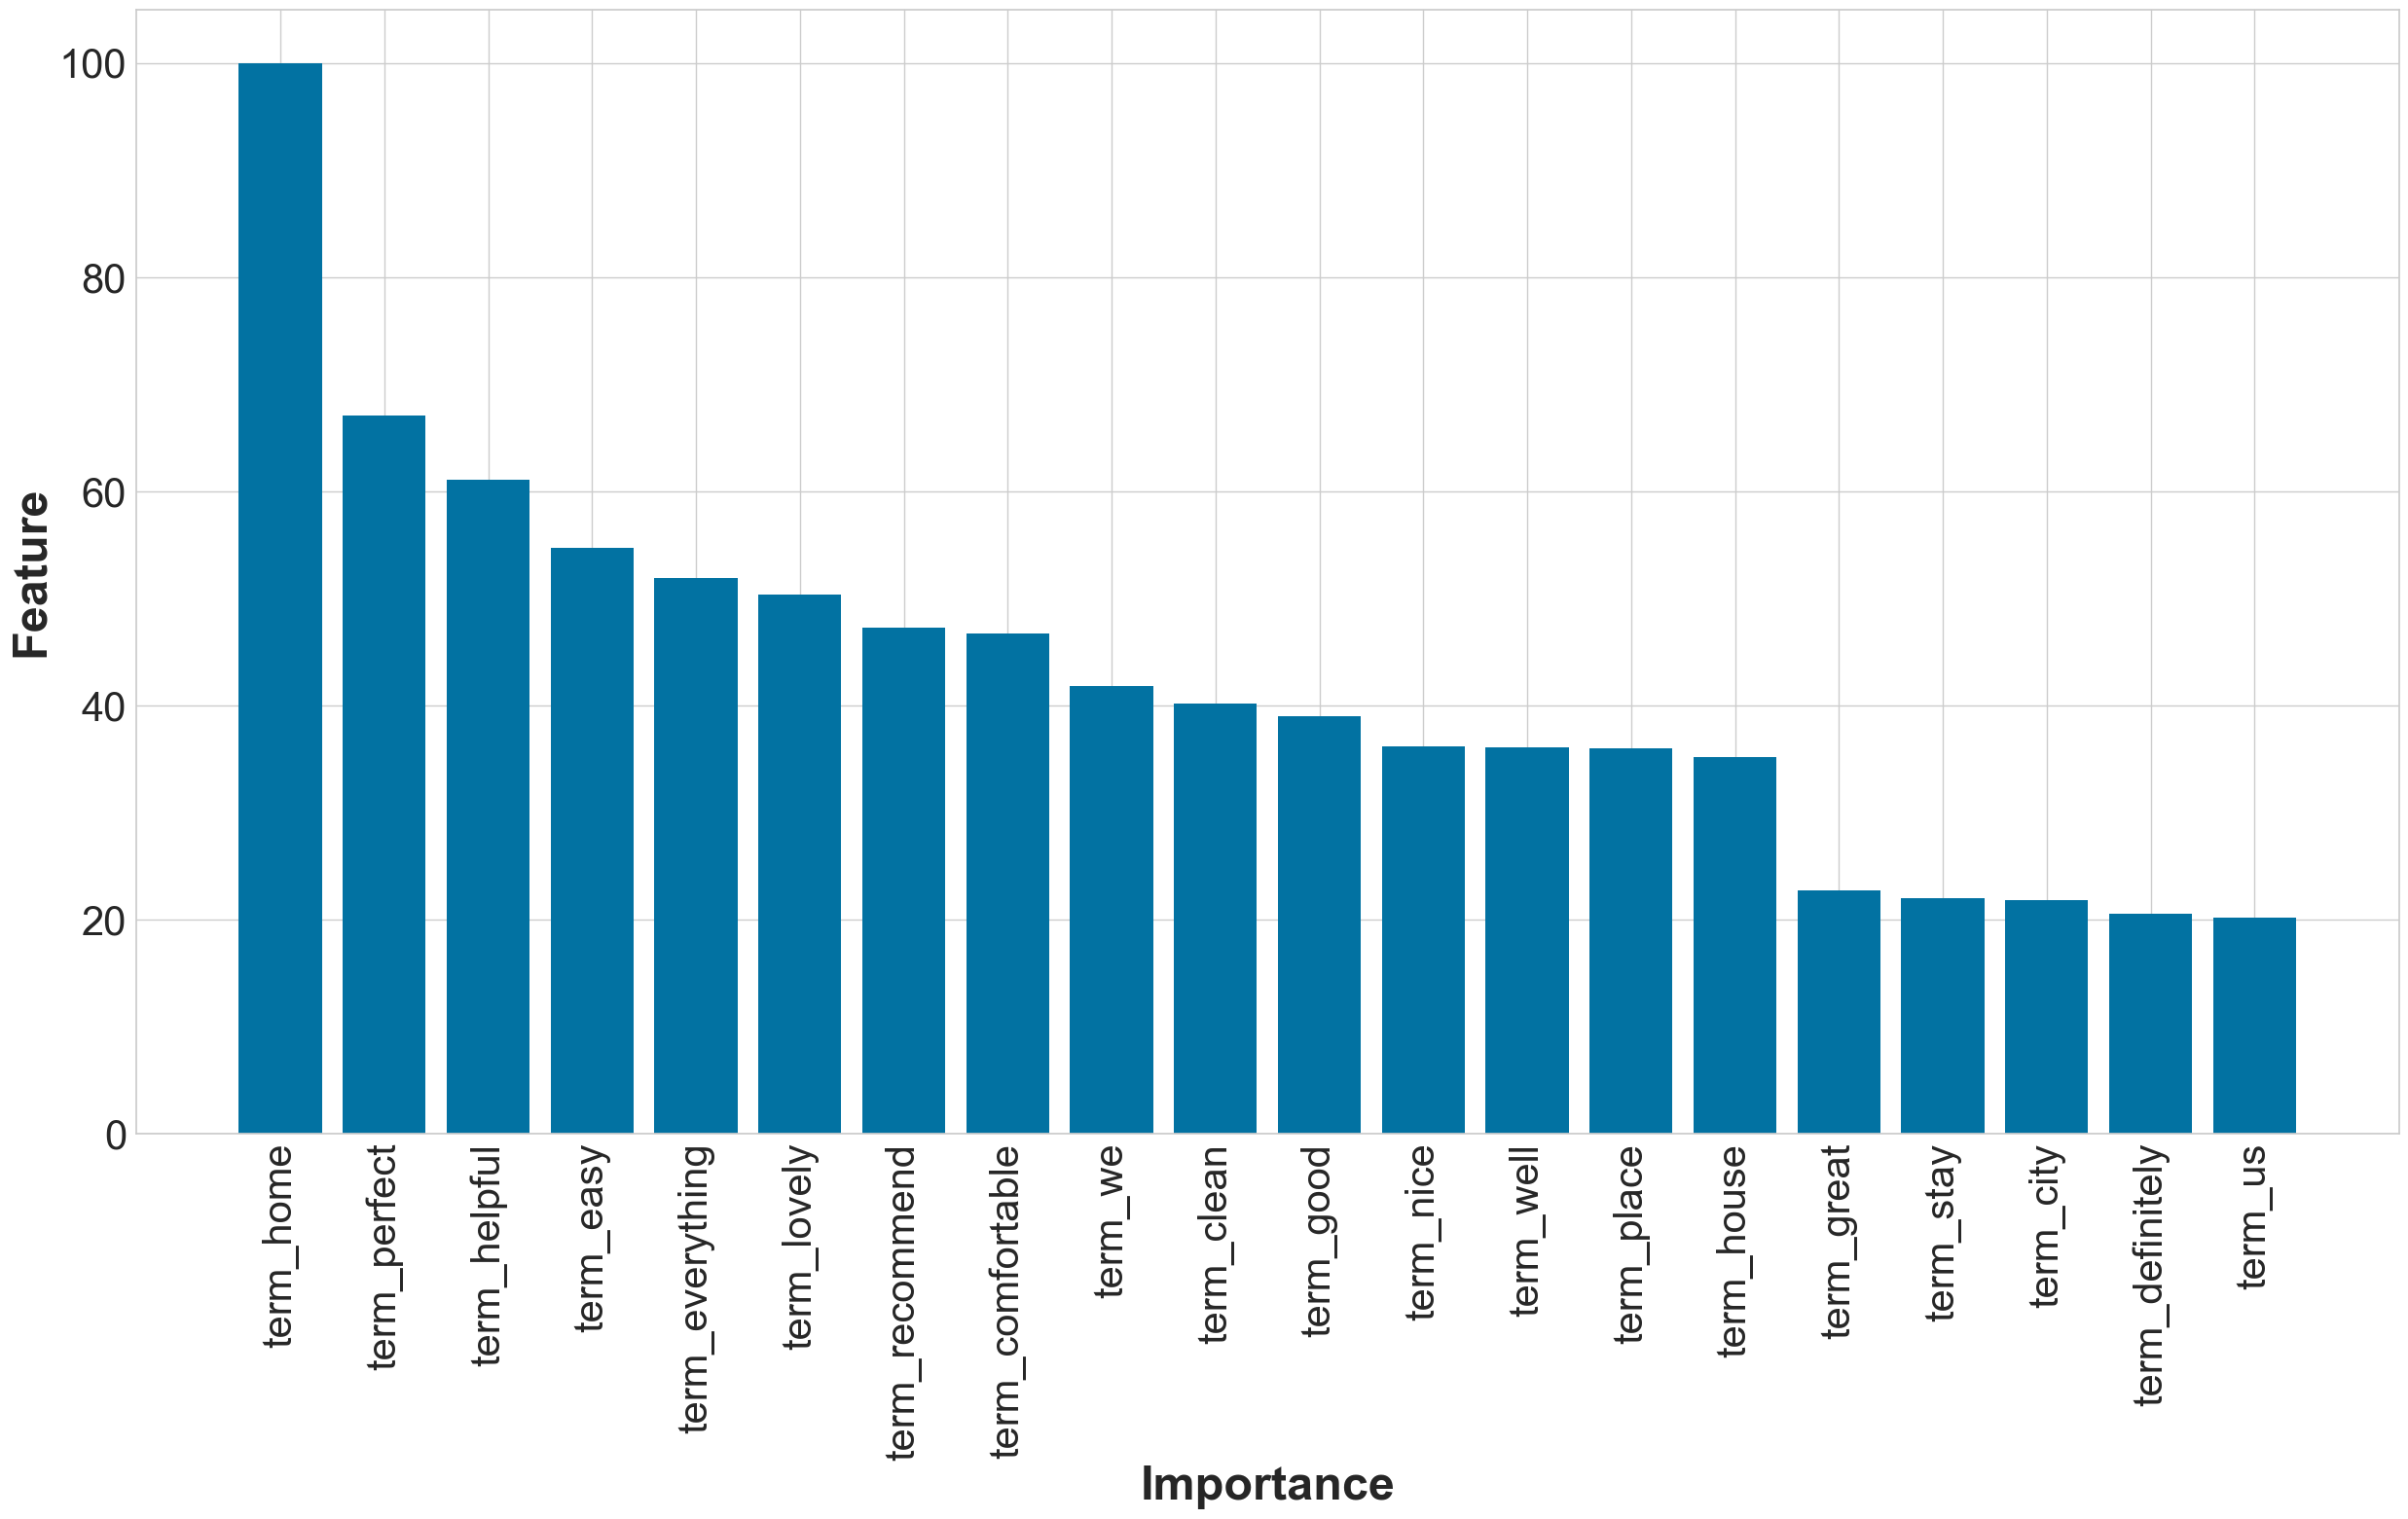

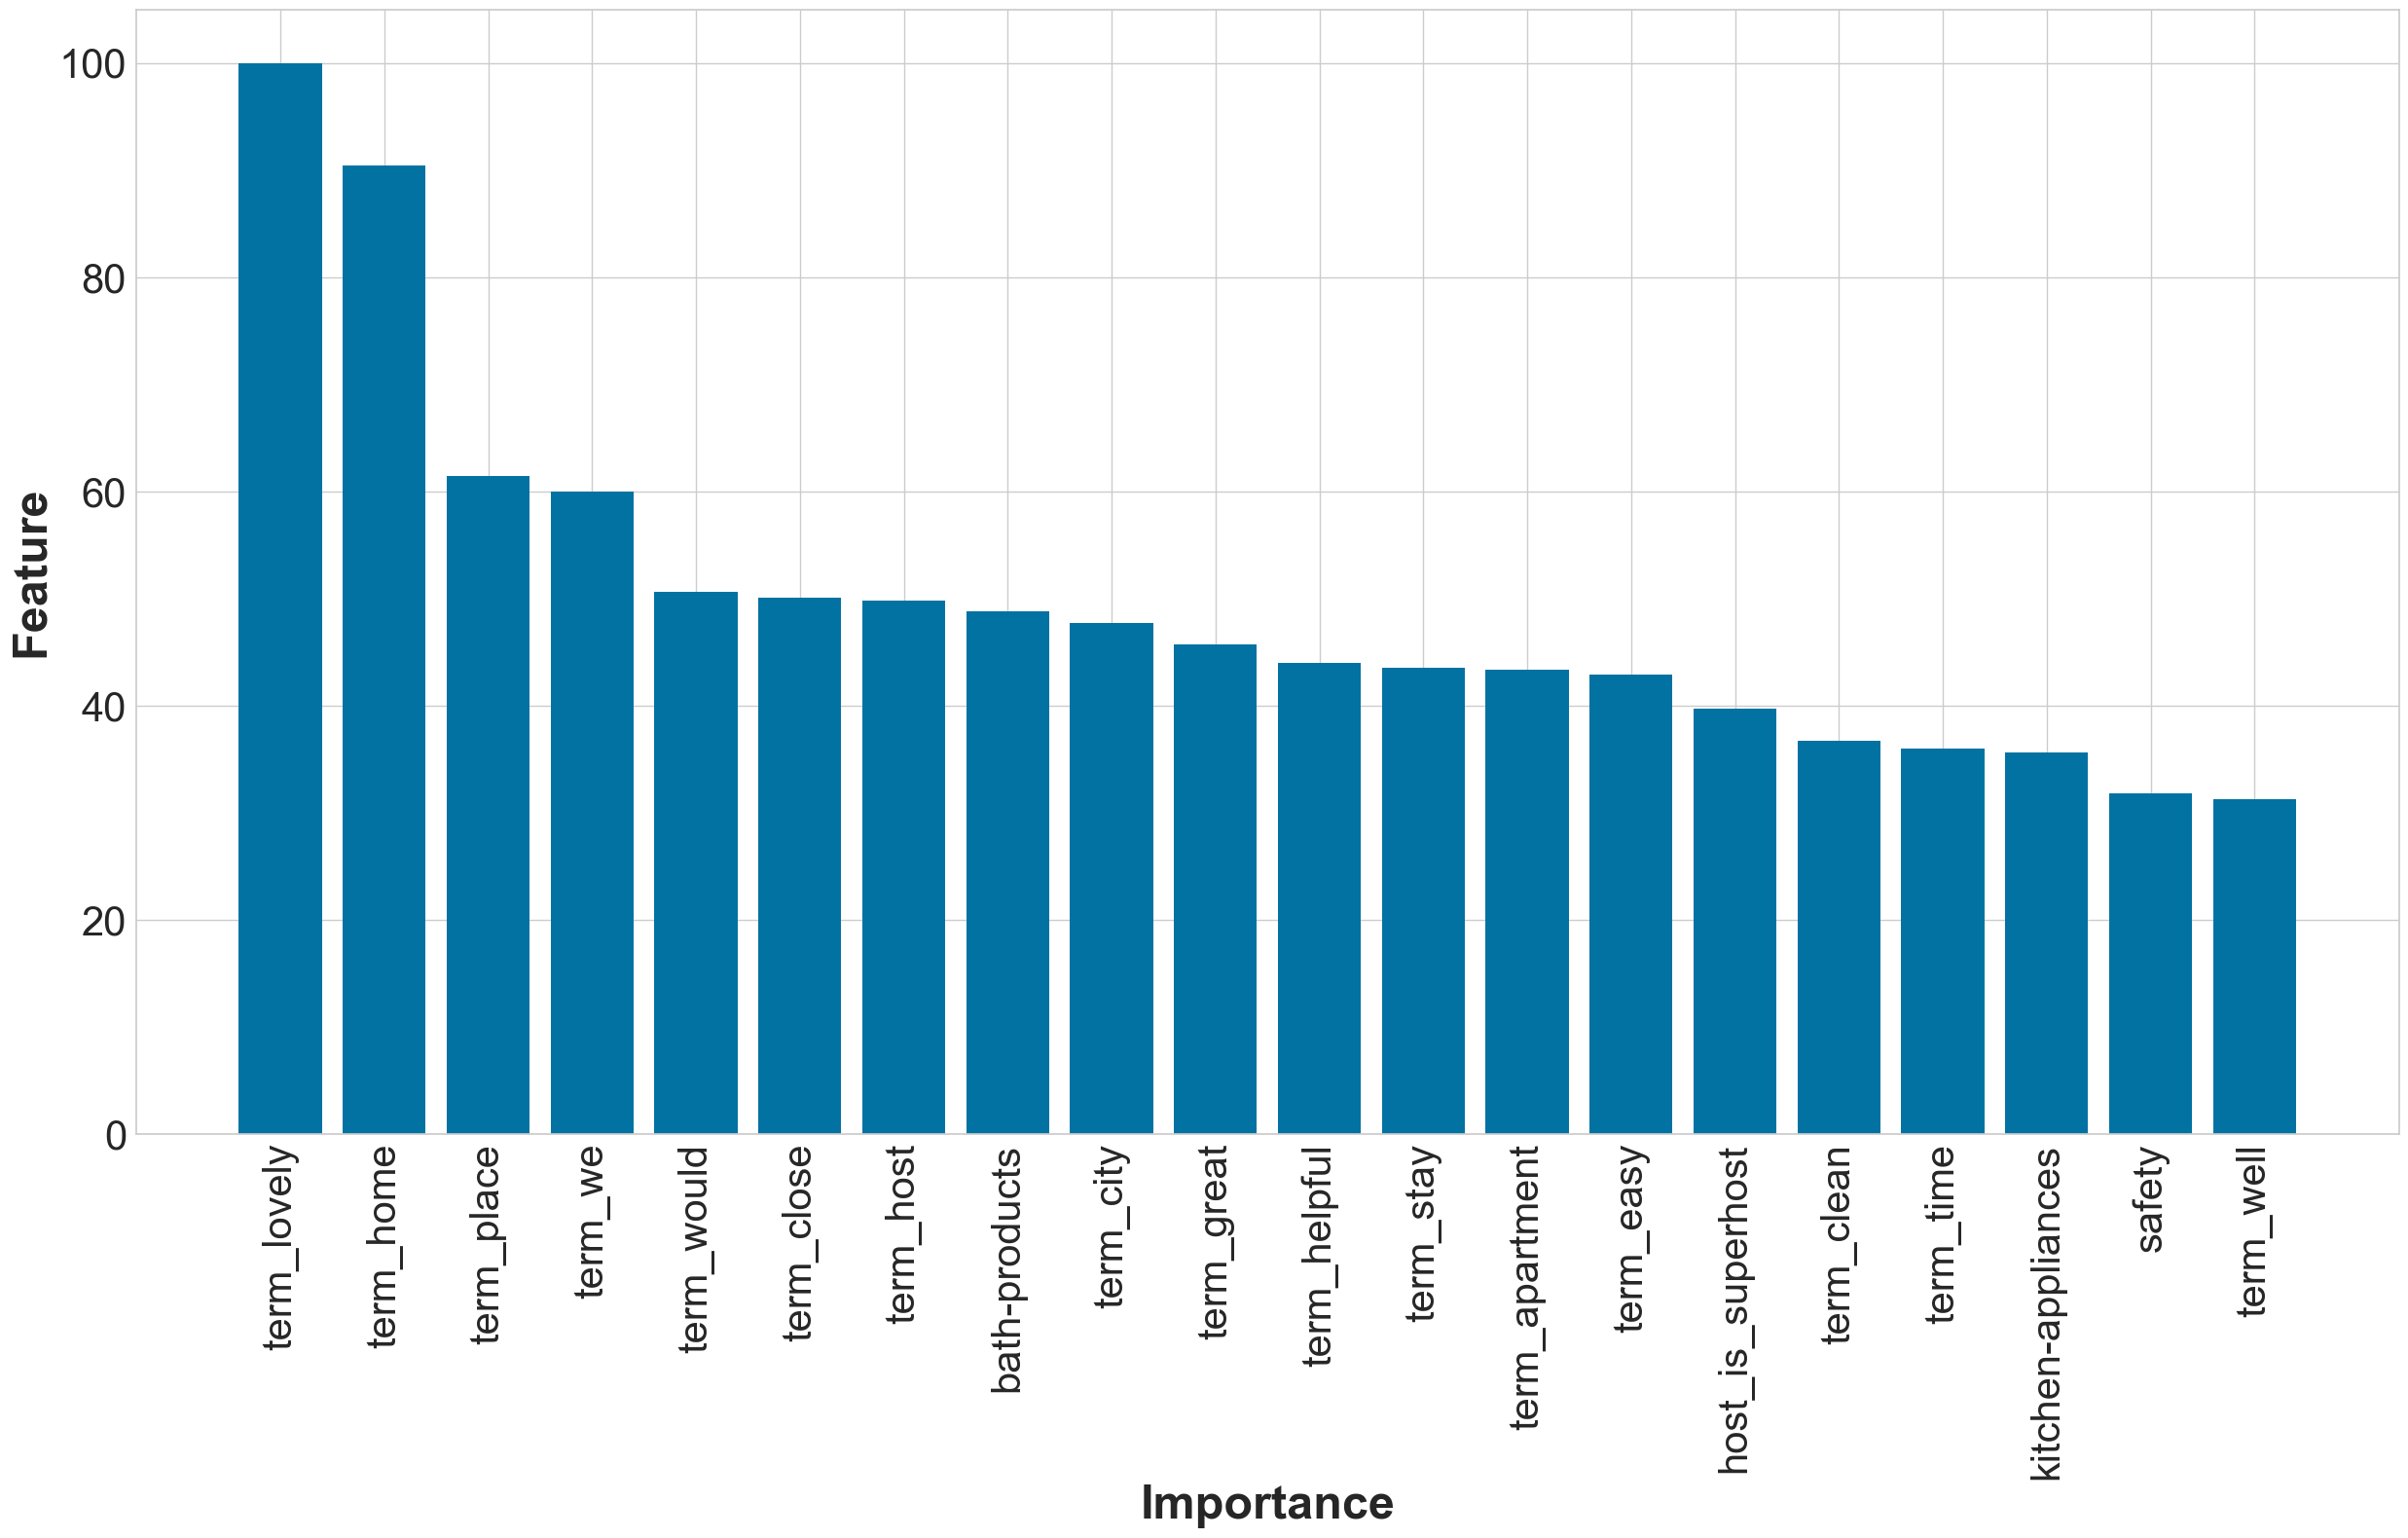

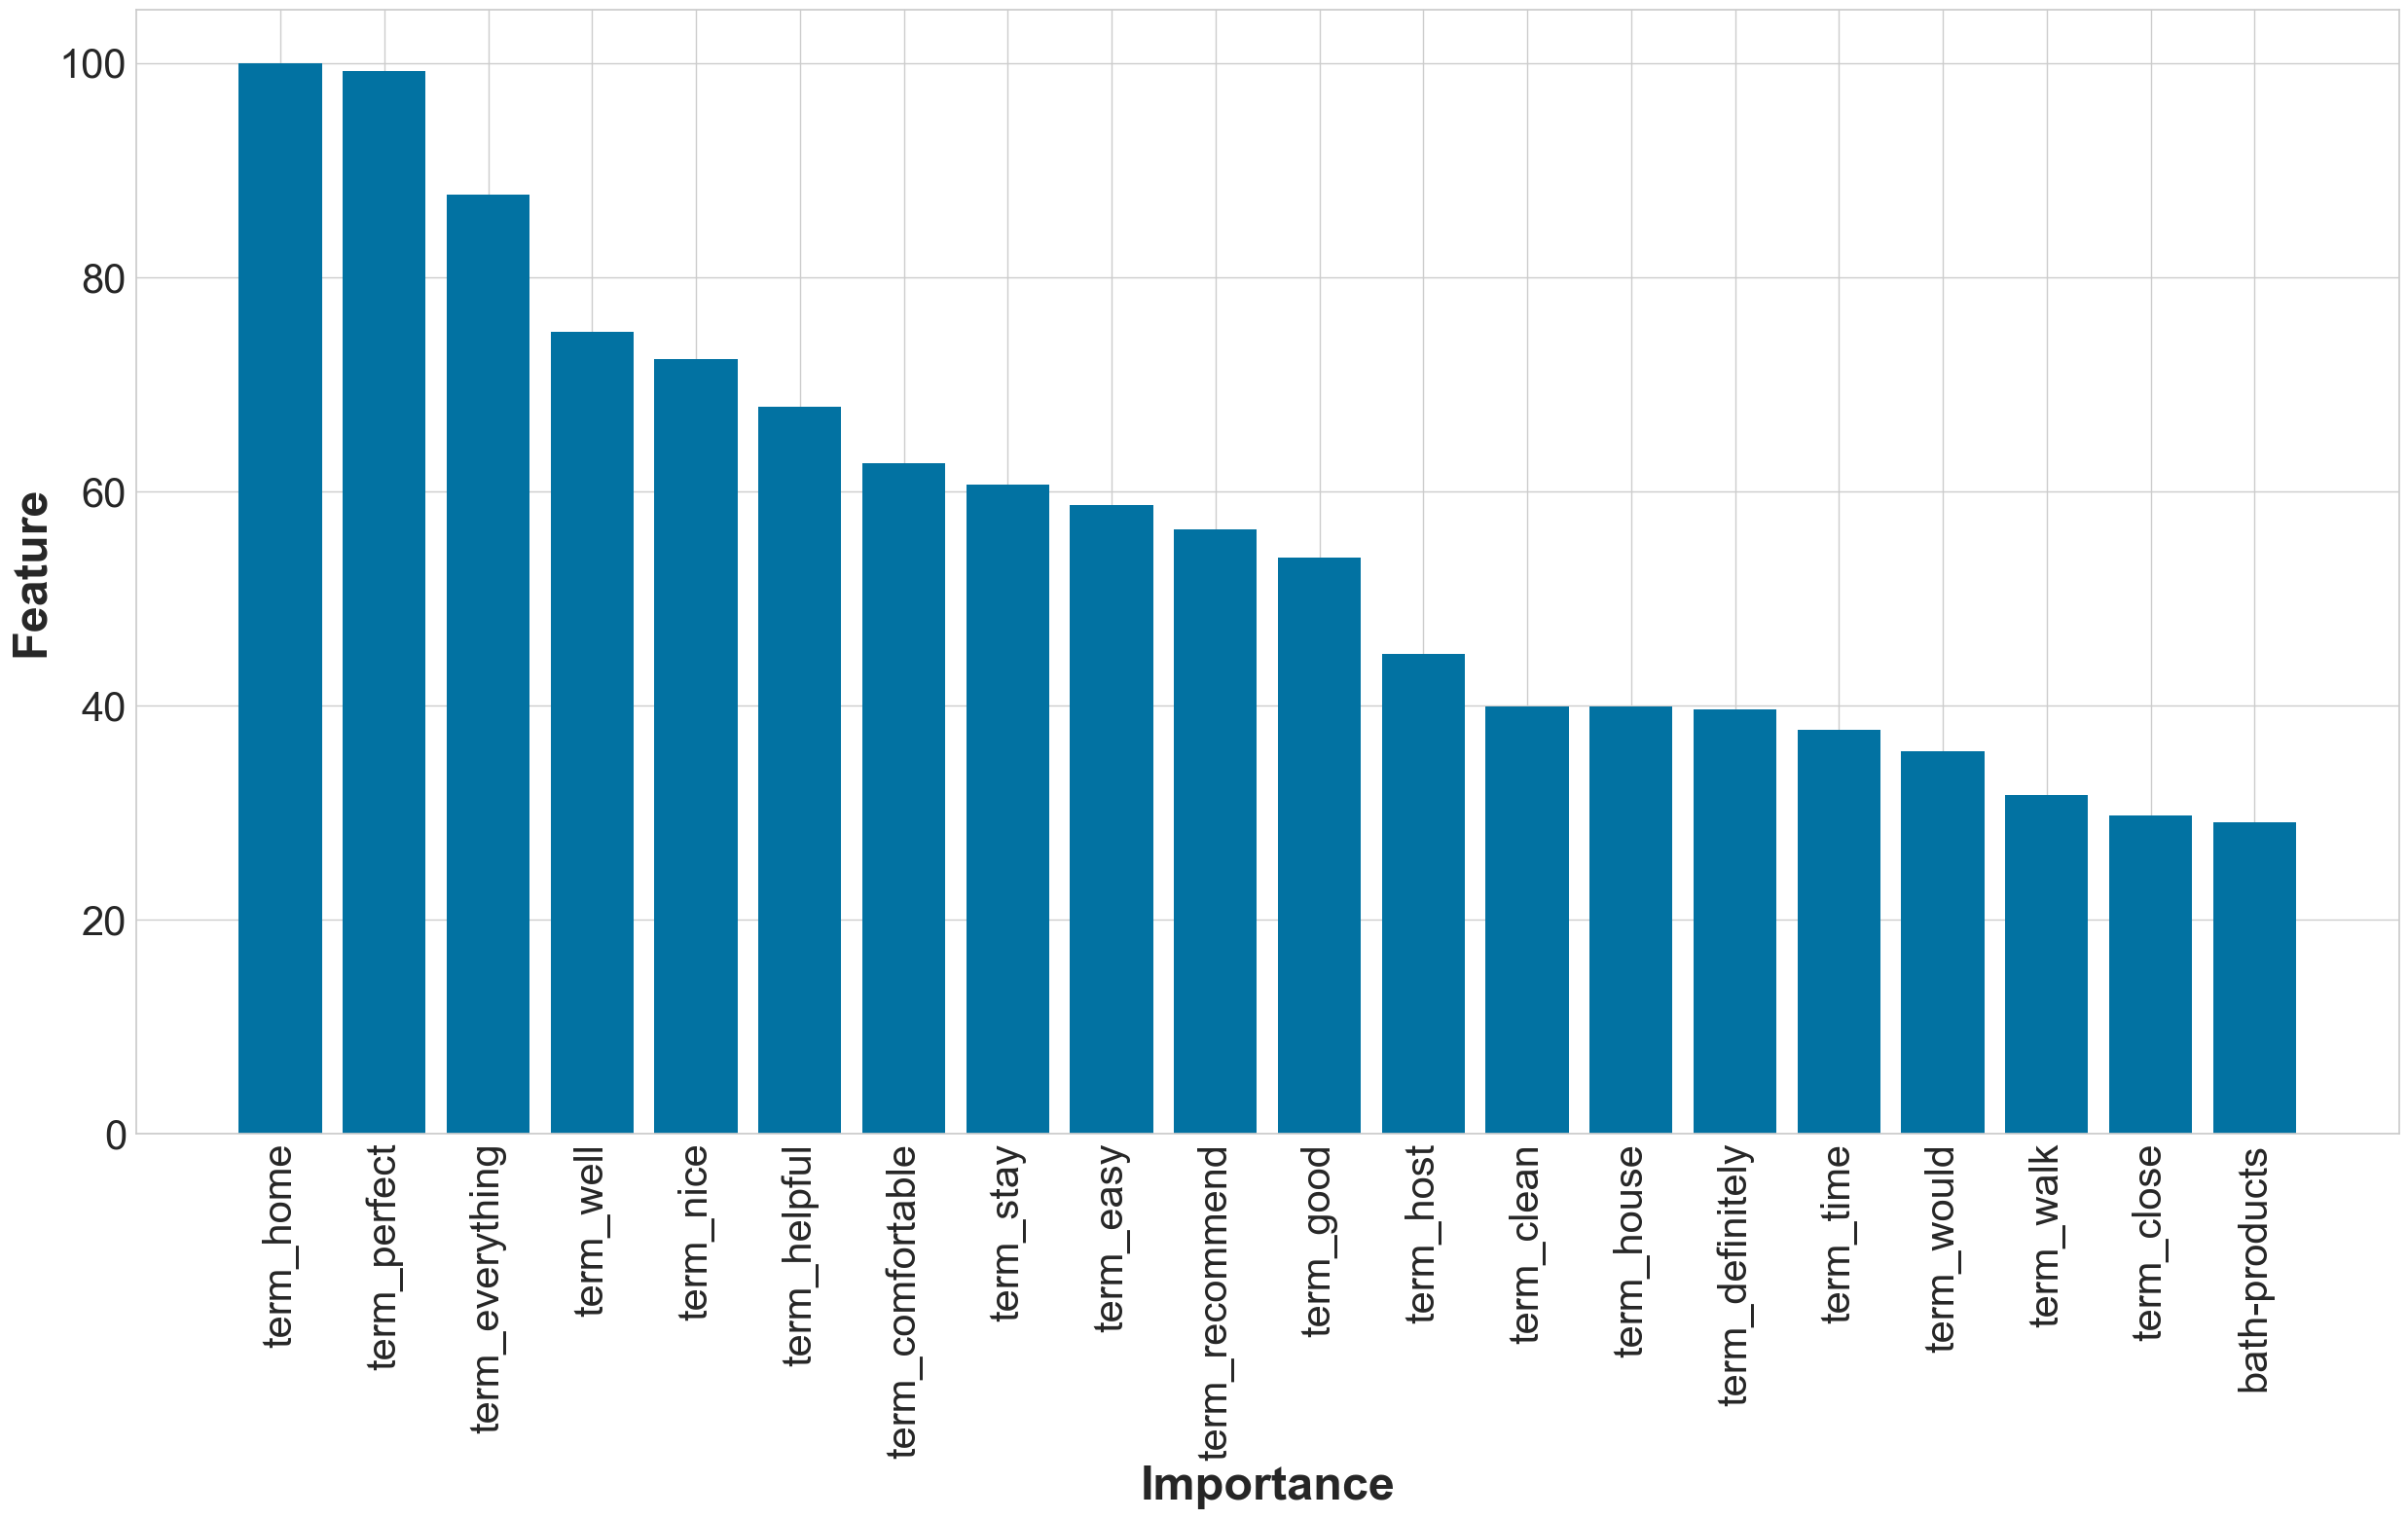

In [42]:
from matplotlib import pyplot
cols = X.columns
cols = np.asarray(cols)

plt.figure(figsize=(30,15))
feature_importance = abs(logit.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
top_features = pd.DataFrame({'feature_imp': feature_importance, 
                             'features': cols}, columns=['feature_imp', 'features'])
top_features = top_features.sort_values(by='feature_imp', ascending=False).head(20)
plt.bar(top_features.features, top_features.feature_imp)
plt.xlabel('Importance', fontsize=35, fontweight='bold')
plt.ylabel('Feature', fontsize=35, fontweight='bold')
plt.xticks(fontsize=30, rotation = 90)
plt.yticks(fontsize=30)
plt.show()

plt.figure(figsize=(30,15))
feature_importance = abs(logit.coef_[1])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
top_features = pd.DataFrame({'feature_imp': feature_importance, 
                             'features': cols}, columns=['feature_imp', 'features'])
top_features = top_features.sort_values(by='feature_imp', ascending=False).head(20)
plt.bar(top_features.features, top_features.feature_imp)
plt.xlabel('Importance', fontsize=35, fontweight='bold')
plt.ylabel('Feature', fontsize=35, fontweight='bold')
plt.xticks(fontsize=30, rotation = 90)
plt.yticks(fontsize=30)
plt.show()

plt.figure(figsize=(30,15))
feature_importance = abs(logit.coef_[2])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
top_features = pd.DataFrame({'feature_imp': feature_importance, 
                             'features': cols}, columns=['feature_imp', 'features'])
top_features = top_features.sort_values(by='feature_imp', ascending=False).head(20)
plt.bar(top_features.features, top_features.feature_imp)
plt.xlabel('Importance', fontsize=35, fontweight='bold')
plt.ylabel('Feature', fontsize=35, fontweight='bold')
plt.xticks(fontsize=30, rotation = 90)
plt.yticks(fontsize=30)
plt.show()

#### Comparison With Baseline Classifier

In [43]:
dmfr = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dmun = DummyClassifier(strategy='uniform').fit(X_train, y_train)

In [44]:
print("\n\nDUMMY CLASSIFIER - frequent")
print(dmfr.score(X_test, y_test))
y_pred = dmfr.predict(X_test)
print_metrics(y_test, y_pred)

print("\n\nDUMMY CLASSIFIER - Uniform")
print(dmun.score(X_test, y_test))
y_pred = dmun.predict(X_test)
print_metrics(y_test, y_pred)



DUMMY CLASSIFIER - frequent
0.31596091205211724
----------CONFUSION-MATRIX----------
[[  0 211   0]
 [  0 194   0]
 [  0 209   0]]
----------CLASSIFICATION-REPORT----------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       211
           1       0.32      1.00      0.48       194
           2       0.00      0.00      0.00       209

    accuracy                           0.32       614
   macro avg       0.11      0.33      0.16       614
weighted avg       0.10      0.32      0.15       614



DUMMY CLASSIFIER - Uniform
0.34527687296416937
----------CONFUSION-MATRIX----------
[[70 64 77]
 [64 63 67]
 [78 68 63]]
----------CLASSIFICATION-REPORT----------
              precision    recall  f1-score   support

           0       0.33      0.33      0.33       211
           1       0.32      0.32      0.32       194
           2       0.30      0.30      0.30       209

    accuracy                           0.32       614
   macr

#### Density Plot for Term 'Home' for each Review Bin

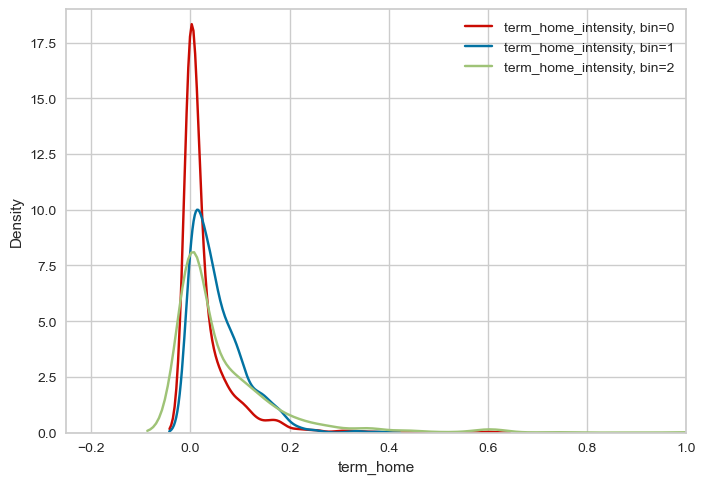

In [45]:
test = pd.concat([X, y], axis=1)
g = sns.kdeplot(test.loc[test['rating_bin_ep'] == 0, 'term_home'], color="r", label='term_home_intensity, bin=0')
g.set(ylim=(0, 19))
g.set(xlim=(-0.25, 1))
plt.legend()

h = sns.kdeplot(test.loc[test['rating_bin_ep'] == 1,'term_home'], color="b", label='term_home_intensity, bin=1')
h.set(ylim=(0, 19))
h.set(xlim=(-0.25, 1))
plt.legend()

i = sns.kdeplot(test.loc[test['rating_bin_ep'] == 2, 'term_home'], color="g", label='term_home_intensity, bin=2')
i.set(ylim=(0, 19))
i.set(xlim=(-0.25, 1))
plt.legend()

plt.show()

#### Density Plots for Number of Comments against each Review Bin

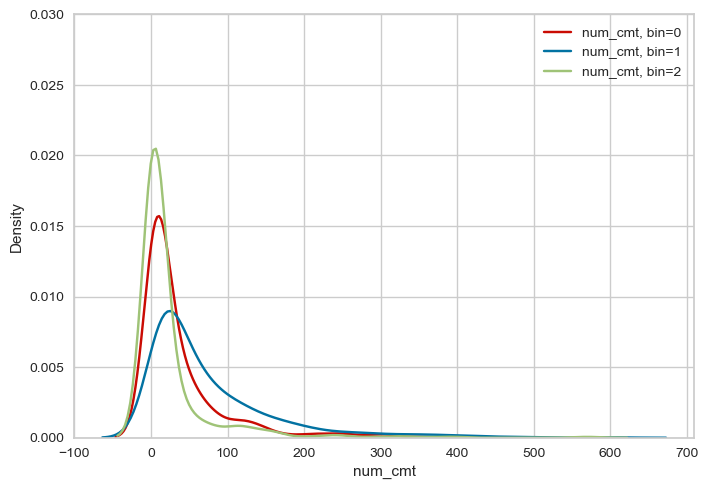

In [46]:
test = pd.concat([X, y], axis=1)

g = sns.kdeplot(test.loc[test['rating_bin_ep'] == 0, 'num_cmt'], color="r", label='num_cmt, bin=0')
g.set(ylim=(0, 0.03))
plt.legend()

h = sns.kdeplot(test.loc[test['rating_bin_ep'] == 1,'num_cmt'], color="b", label='num_cmt, bin=1')
h.set(ylim=(0, 0.03))
plt.legend()

i = sns.kdeplot(test.loc[test['rating_bin_ep'] == 2, 'num_cmt'], color="g", label='num_cmt, bin=2')
i.set(ylim=(0, 0.03))
plt.legend()

plt.show()

#### Number of Records in each Review Bin for the type of Host (Superhost)

In [47]:
test.host_is_superhost.value_counts()

0    1762
1     694
Name: host_is_superhost, dtype: int64

In [48]:
test1 = test.groupby(['host_is_superhost', 'rating_bin_ep']).size()

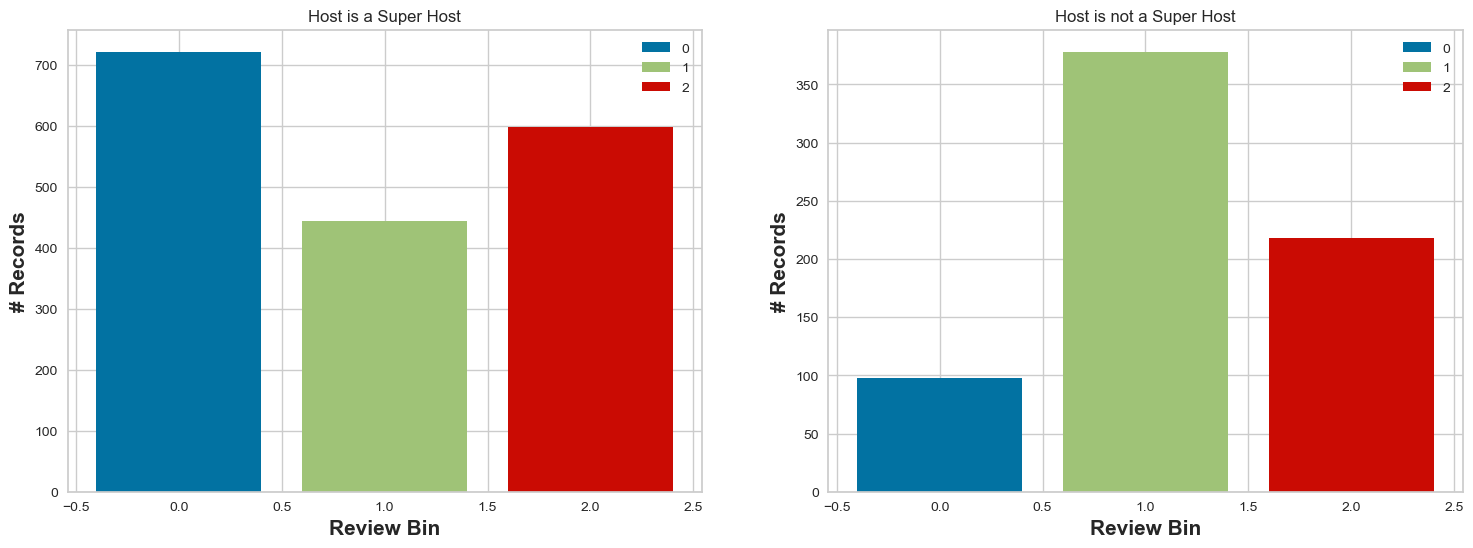

In [49]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
for j in (0,1,2):
    plt.bar(j, test1[0][j], label = j)
plt.title("Host is a Super Host")    
plt.legend()
plt.xlabel('Review Bin', fontweight ='bold', fontsize = 15)
plt.ylabel('# Records', fontweight ='bold', fontsize = 15)
plt.subplot(1, 2, 2)
for j in (0,1,2):
    plt.bar(j, test1[1][j], label = j)
plt.title("Host is not a Super Host")
plt.legend()
plt.xlabel('Review Bin', fontweight ='bold', fontsize = 15)
plt.ylabel('# Records', fontweight ='bold', fontsize = 15)
plt.show()

#### Neighbourhood Type Analysis

In [50]:
test.neighbourhood_cleansed.value_counts()

1    1654
0     341
2     327
3     134
Name: neighbourhood_cleansed, dtype: int64

In [51]:
test2 = test.groupby(['neighbourhood_cleansed', 'rating_bin_ep']).size()

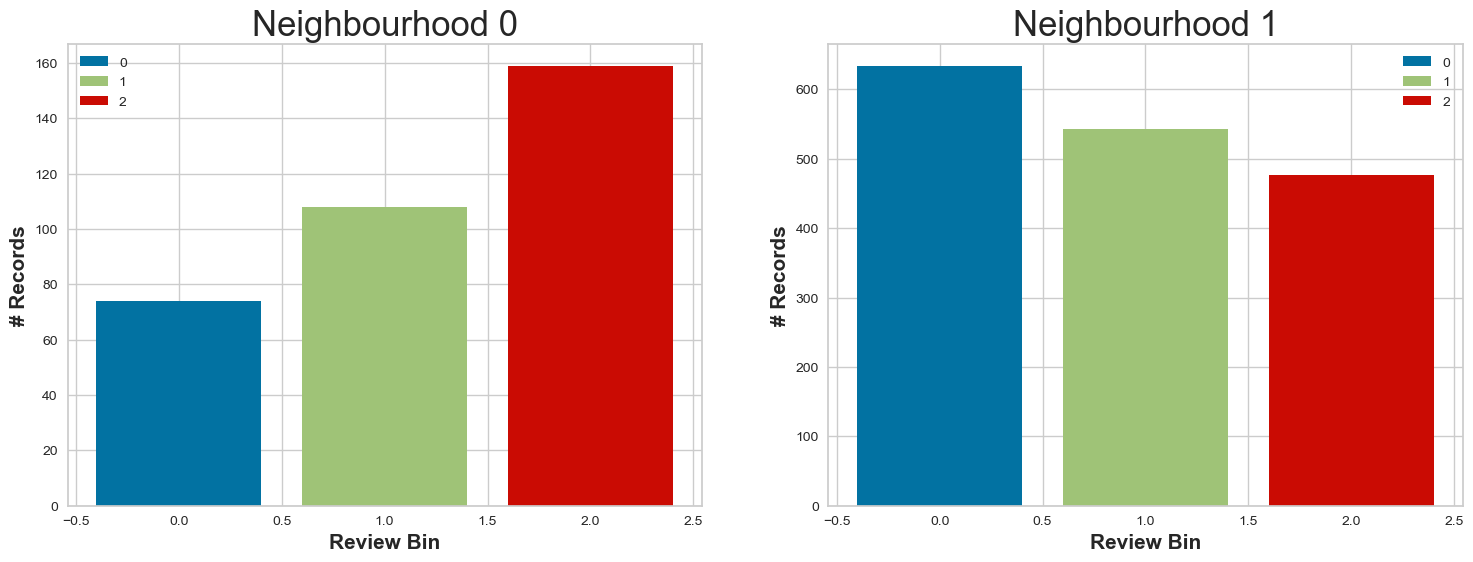

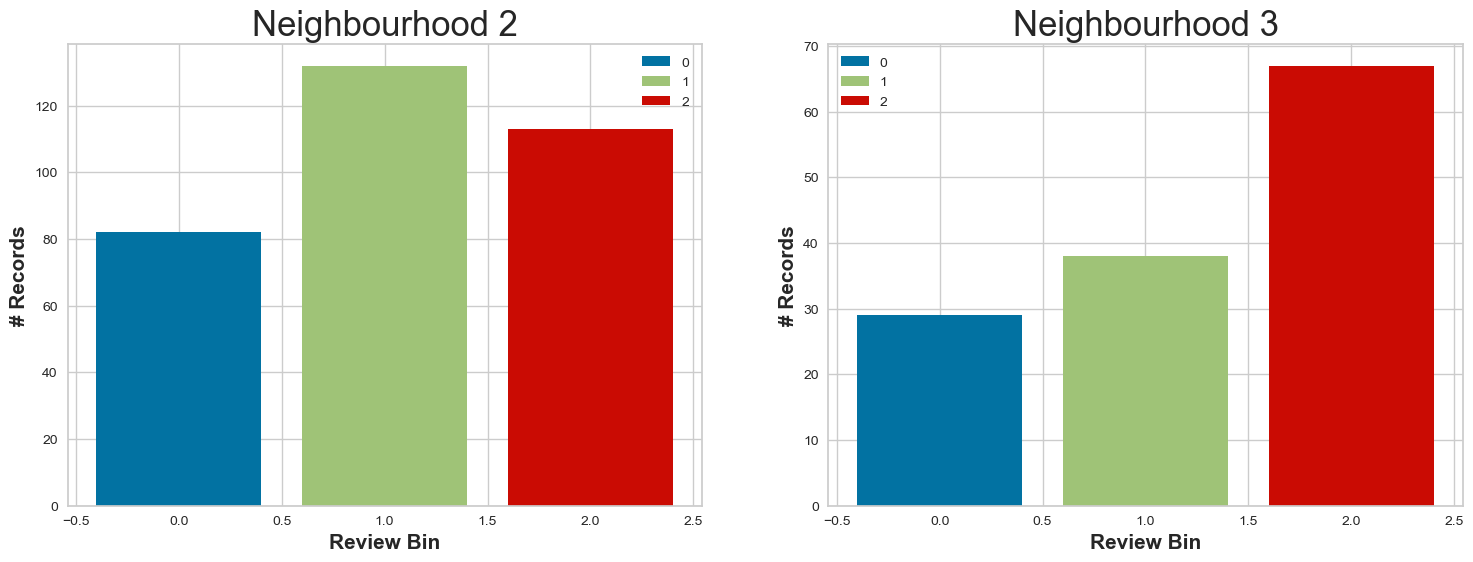

In [52]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
for j in (0,1,2):
    plt.bar(j, test2[0][j], label = j)
plt.title("Neighbourhood 0",fontsize=25)    
plt.legend()
plt.xlabel('Review Bin', fontweight ='bold', fontsize = 15)
plt.ylabel('# Records', fontweight ='bold', fontsize = 15)
plt.subplot(1, 2, 2)
for j in (0,1,2):
    plt.bar(j, test2[1][j], label = j)
plt.title("Neighbourhood 1",fontsize=25)
plt.legend()
plt.xlabel('Review Bin', fontweight ='bold', fontsize = 15)
plt.ylabel('# Records', fontweight ='bold', fontsize = 15)
plt.show()

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
for j in (0,1,2):
    plt.bar(j, test2[2][j], label = j)
plt.title("Neighbourhood 2",fontsize=25)
plt.legend()
plt.xlabel('Review Bin', fontweight ='bold', fontsize = 15)
plt.ylabel('# Records', fontweight ='bold', fontsize = 15)
plt.subplot(1, 2, 2)
for j in (0,1,2):
    plt.bar(j, test2[3][j], label = j)
plt.title("Neighbourhood 3",fontsize=25)
plt.legend()
plt.xlabel('Review Bin', fontweight ='bold', fontsize = 15)
plt.ylabel('# Records', fontweight ='bold', fontsize = 15)
plt.show()

#### Polynomial Degree and Error Plots

 Logistic Regression
 For Degree =  2
 For C =  0.001
 Confusion Matrix - 
 [[104  40  37]
 [ 37  84  26]
 [ 29  44  91]]
 Train accuracy score:  0.6817718940936863
 Test accuracy score:  0.5670731707317073
 F1 Score =  0.6857142857142857
 Classification Report
               precision    recall  f1-score   support

           0       0.61      0.57      0.59       181
           1       0.50      0.57      0.53       147
           2       0.59      0.55      0.57       164

    accuracy                           0.57       492
   macro avg       0.57      0.57      0.57       492
weighted avg       0.57      0.57      0.57       492



 Logistic Regression
 For Degree =  2
 For C =  0.1
 Confusion Matrix - 
 [[105  37  39]
 [ 39  82  26]
 [ 29  43  92]]
 Train accuracy score:  0.6838085539714868
 Test accuracy score:  0.5670731707317073
 F1 Score =  0.6833333333333333
 Classification Report
               precision    recall  f1-score   support

           0       0.61      0.58     

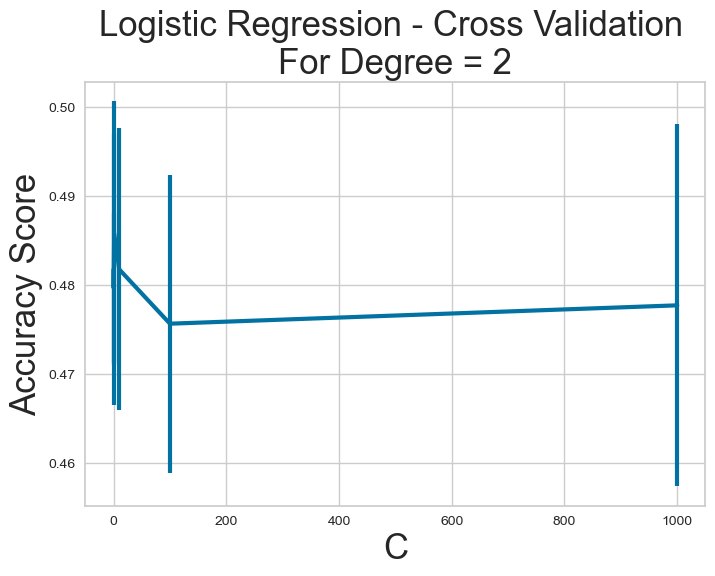

In [53]:
c_range = [0.001, 0.1, 1, 10, 100, 1000]
degree_range = [2]

for i in degree_range:
    trans = PolynomialFeatures(degree = i)
    x_poly = trans.fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state=(1))
    mean_error = []
    std_error = []
    for c in c_range:
        log_reg = LogisticRegression(C = c, random_state=0, solver='newton-cg',multi_class='multinomial')
        log_reg.fit(x_train, y_train)
        y_pred = log_reg.predict(x_test)
        
        cnf_mtx = metrics.confusion_matrix(y_test, y_pred)
        f1_score = (2*cnf_mtx[1][1])/((2*cnf_mtx[1][1]) + cnf_mtx[0][1] + cnf_mtx[1][0])
        
        scores = cross_val_score(log_reg, x_test, y_test, cv=5, scoring='accuracy')
        mean_error.append(np.array(scores).mean())
        std_error.append(np.array(scores).std())
        
        
        print(" Logistic Regression")
        print(" For Degree = ", i)
        print(" For C = ", c)
        print(" Confusion Matrix - \n", cnf_mtx)
        print(' Train accuracy score: ', log_reg.score(x_train, y_train))
        print(' Test accuracy score: ', log_reg.score(x_test, y_test))
        print(" F1 Score = ", f1_score)
        print(" Classification Report\n", classification_report(y_test, y_pred))
        print("\n")
    
    plt.errorbar(c_range, mean_error, yerr = std_error, linewidth=3)
    plt.xlabel('C', fontsize=25)
    plt.ylabel('Accuracy Score', fontsize=25)
    title_cv = f"Logistic Regression - Cross Validation \nFor Degree = {i}"
    plt.title(title_cv, fontsize=25)
    plt.show()

### k-NN Classifier

NN =  1
Train accuracy score: 1.0
Test accuracy score: 0.4654471544715447
NN =  3
Train accuracy score: 0.7225050916496945
Test accuracy score: 0.4715447154471545
NN =  5
Train accuracy score: 0.6654786150712831
Test accuracy score: 0.47560975609756095
NN =  7
Train accuracy score: 0.6293279022403259
Test accuracy score: 0.4491869918699187
NN =  9
Train accuracy score: 0.604887983706721
Test accuracy score: 0.44715447154471544
NN =  11
Train accuracy score: 0.5936863543788188
Test accuracy score: 0.46747967479674796
NN =  13
Train accuracy score: 0.5896130346232179
Test accuracy score: 0.4735772357723577
NN =  15
Train accuracy score: 0.5804480651731161
Test accuracy score: 0.4491869918699187
NN =  17
Train accuracy score: 0.5697556008146639
Test accuracy score: 0.4634146341463415
NN =  19
Train accuracy score: 0.5656822810590632
Test accuracy score: 0.46747967479674796


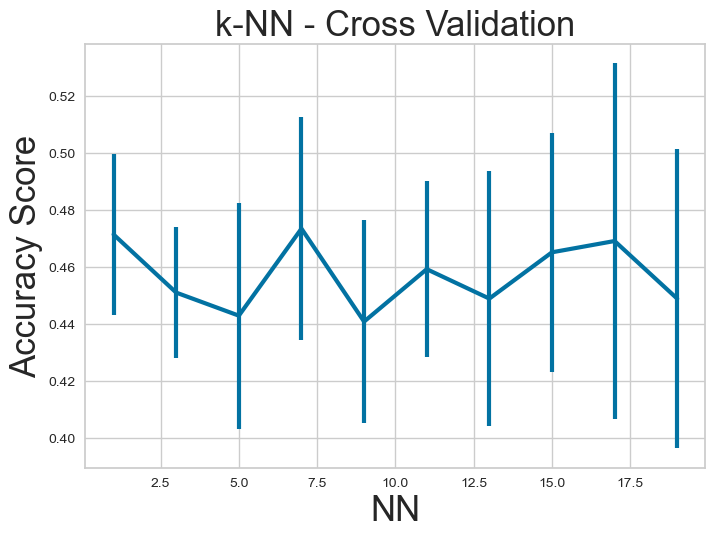

In [54]:
nn_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
x_train_nn, x_test_nn, y_train_nn, y_test_nn = train_test_split(X, y, test_size = 0.2, random_state=(1))
merr = []
serr = []

for nn in nn_range:
    knn_model = KNeighborsClassifier(n_neighbors=nn, weights='uniform')
    knn_model.fit(x_train_nn, y_train_nn)
    y_pred_nn = knn_model.predict(x_test_nn)
    print("NN = ", nn)
    print('Train accuracy score:',knn_model.score(x_train_nn, y_train_nn))
    print('Test accuracy score:',knn_model.score(x_test_nn, y_test_nn))
    
    scores_knn = cross_val_score(knn_model, x_test_nn, y_test_nn, cv=5, scoring='accuracy')
    merr.append(np.array(scores_knn).mean())
    serr.append(np.array(scores_knn).std())

plt.errorbar(nn_range, merr, yerr = serr, linewidth=3)
plt.xlabel('NN', fontsize=25)
plt.ylabel('Accuracy Score', fontsize=25)
title_cv = f"k-NN - Cross Validation"
plt.title(title_cv, fontsize=25)
plt.show()

#### ROC-AUC Curve

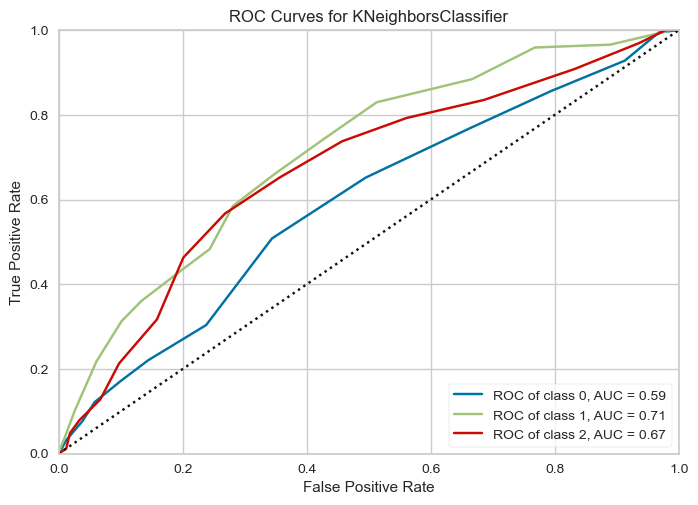

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [55]:
visualizer = ROCAUC(knn_model, classes=["0", "1", "2"], macro=False, micro=False)

visualizer.fit(x_train_nn, y_train_nn)
visualizer.score(x_test_nn, y_test_nn)        
visualizer.show() 

## Review Scores Checkin
### Logistic Regression
#### Defining the Input and Target Variables

In [56]:
X = listings[
                ['host_response_time', 'host_response_rate', 'host_acceptance_rate',
                 'bedrooms', 'beds','neighbourhood_cleansed',
                 'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
                 'host_identity_verified', 'room_type',
                 'accommodates','price', 'minimum_nights', 'maximum_nights',
                 'bath-products','electric-system',
                 'food-services','house-furniture','house-rules',
                 'kitchen-appliances','parking','recreation','safety',
                 'host_email','host_work_email'] + list(reviews.columns[2:])
]

In [57]:
y = listings[['review_scores_checkin']]
y = (y/y.max())*100

y = y.assign(
    rating_bin_ep = pd.qcut(
        y['review_scores_checkin'],
        q=2,
        duplicates='drop',
        labels=[0,1]
    )
)

#### Min Max of Each Bin

In [58]:
y.groupby('rating_bin_ep').min()

review_scores_checkin
rating_bin_ep                       
0                               20.0
1                               99.2

In [59]:
y.groupby('rating_bin_ep').max()

review_scores_checkin
rating_bin_ep                       
0                               99.0
1                              100.0

#### Splitting Data in 75-25 Ratio

In [60]:
y = y['rating_bin_ep']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### Number of Records in Each Bin

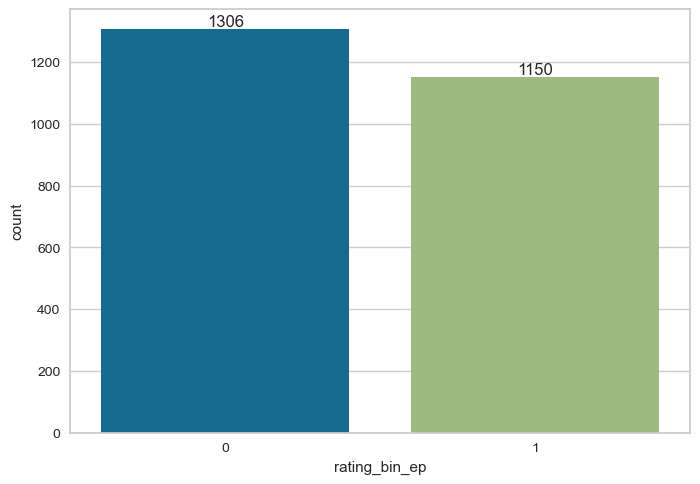

In [61]:
cnt_plt = sns.countplot(y)
cnt_plt.bar_label(cnt_plt.containers[0])
plt.show()

#### Logistic Regression - Varied C Range, using 'newton-cg' solver and multi_class='multinomial'

C =  0.001
Train accuracy score: 0.6427795874049945
Test accuracy score: 0.5863192182410424
Mean Squared Error:  0.41368078175895767
C =  0.1
Train accuracy score: 0.6786102062975027
Test accuracy score: 0.6237785016286646
Mean Squared Error:  0.3762214983713355
C =  1
Train accuracy score: 0.6986970684039088
Test accuracy score: 0.6579804560260586
Mean Squared Error:  0.34201954397394135
C =  10
Train accuracy score: 0.6997828447339848
Test accuracy score: 0.6693811074918566
Mean Squared Error:  0.3306188925081433
C =  100
Train accuracy score: 0.7035830618892508
Test accuracy score: 0.6710097719869706
Mean Squared Error:  0.3289902280130293
C =  1000
Train accuracy score: 0.7035830618892508
Test accuracy score: 0.6710097719869706
Mean Squared Error:  0.3289902280130293


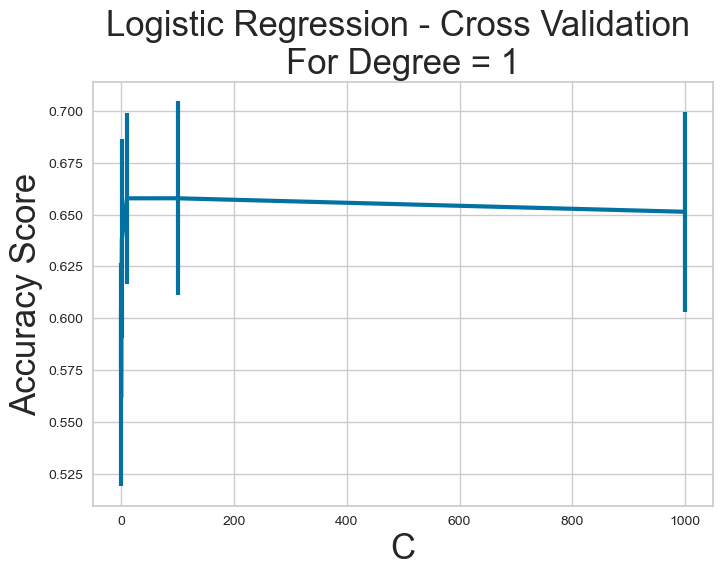

In [62]:
c_range = [0.001, 0.1, 1, 10, 100, 1000]
mean_error = []
std_error = []
for c in sorted(c_range):
    logit = LogisticRegression(C=c, random_state=0, solver='newton-cg',multi_class='multinomial')
    logit.fit(X_train, y_train)
    y_pred = logit.predict(X_test)
    print("C = ",c)
    print('Train accuracy score:',logit.score(X_train, y_train))
    print('Test accuracy score:',logit.score(X_test, y_test))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    scores = cross_val_score(logit, X_test, y_test, cv=5, scoring='accuracy')
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())
plt.errorbar(c_range, mean_error, yerr = std_error, linewidth=3)
plt.xlabel('C', fontsize=25)
plt.ylabel('Accuracy Score', fontsize=25)
title_cv = "Logistic Regression - Cross Validation \nFor Degree = 1"
plt.title(title_cv, fontsize=25)
plt.show()

#### Feature Importance

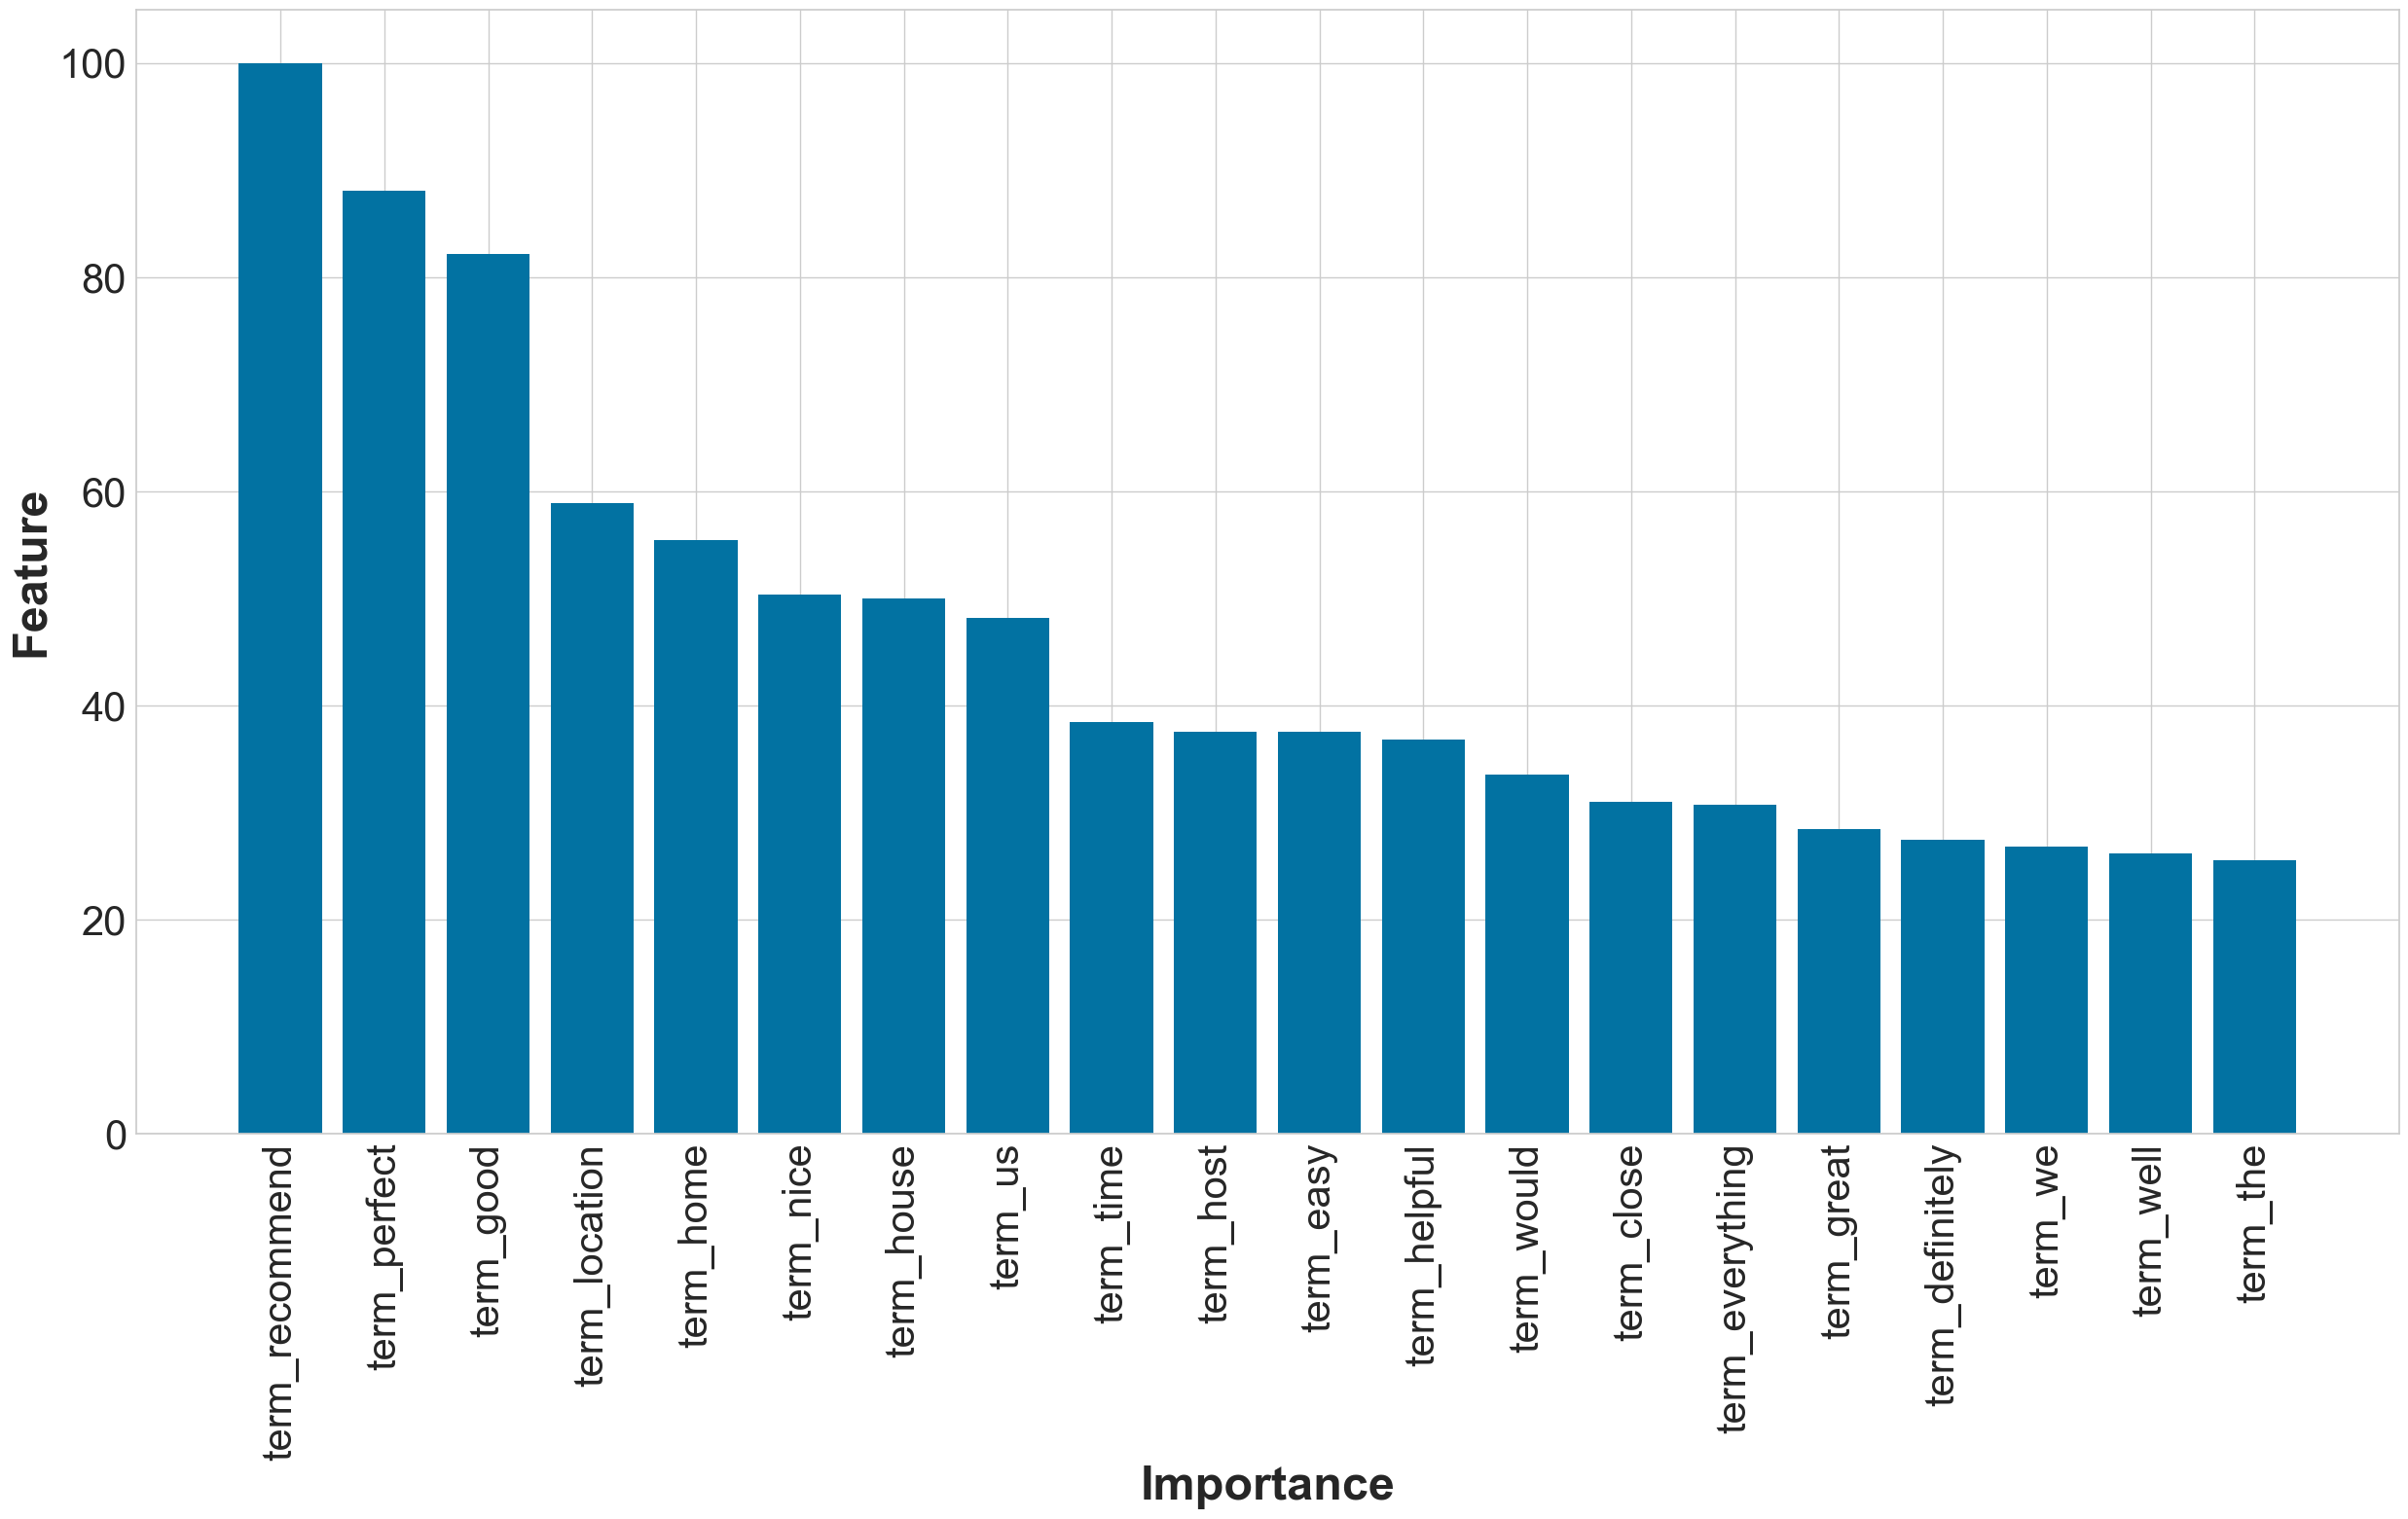

In [63]:
cols = X.columns
cols = np.asarray(cols)

plt.figure(figsize=(30,15))
feature_importance = abs(logit.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
top_features = pd.DataFrame({'feature_imp': feature_importance, 
                             'features': cols}, columns=['feature_imp', 'features'])
top_features = top_features.sort_values(by='feature_imp', ascending=False).head(20)
plt.bar(top_features.features, top_features.feature_imp)
plt.xlabel('Importance', fontsize=35, fontweight='bold')
plt.ylabel('Feature', fontsize=35, fontweight='bold')
plt.xticks(fontsize=30, rotation = 90)
plt.yticks(fontsize=30)
plt.show()

#### Polynomial Degree and Error Plots

 Logistic Regression
 For Degree =  2
 For C =  0.001
 Confusion Matrix - 
 [[193  70]
 [ 84 145]]
 Train accuracy score:  0.7754582484725051
 Test accuracy score:  0.6869918699186992
 F1 Score =  0.6531531531531531
 Classification Report
               precision    recall  f1-score   support

           0       0.70      0.73      0.71       263
           1       0.67      0.63      0.65       229

    accuracy                           0.69       492
   macro avg       0.69      0.68      0.68       492
weighted avg       0.69      0.69      0.69       492



 Logistic Regression
 For Degree =  2
 For C =  0.1
 Confusion Matrix - 
 [[191  72]
 [ 84 145]]
 Train accuracy score:  0.7713849287169042
 Test accuracy score:  0.6829268292682927
 F1 Score =  0.6502242152466368
 Classification Report
               precision    recall  f1-score   support

           0       0.69      0.73      0.71       263
           1       0.67      0.63      0.65       229

    accuracy                 

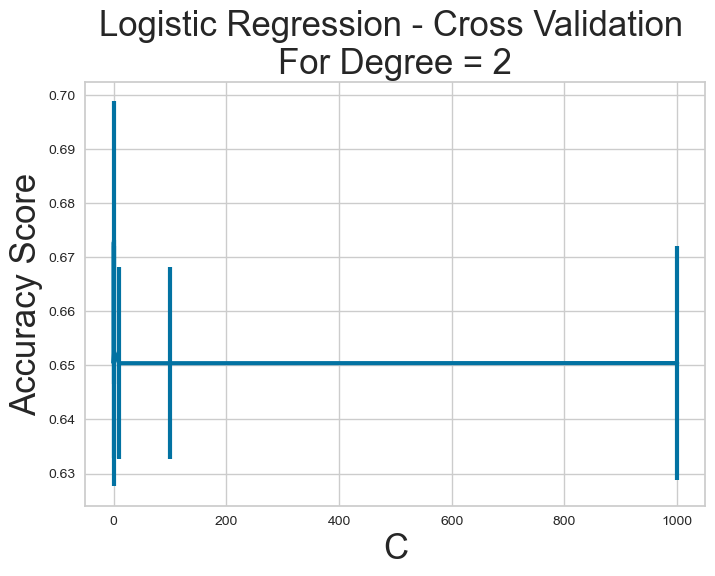

In [64]:
c_range = [0.001, 0.1, 1, 10, 100, 1000]
degree_range = [2]

for i in degree_range:
    trans = PolynomialFeatures(degree = i)
    x_poly = trans.fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state=(1))
    mean_error = []
    std_error = []
    for c in c_range:
        log_reg = LogisticRegression(C = c, random_state=0, solver='newton-cg',multi_class='multinomial')
        log_reg.fit(x_train, y_train)
        y_pred = log_reg.predict(x_test)
        
        cnf_mtx = metrics.confusion_matrix(y_test, y_pred)
        f1_score = (2*cnf_mtx[1][1])/((2*cnf_mtx[1][1]) + cnf_mtx[0][1] + cnf_mtx[1][0])
        
        scores = cross_val_score(log_reg, x_test, y_test, cv=5, scoring='accuracy')
        mean_error.append(np.array(scores).mean())
        std_error.append(np.array(scores).std())
        
        
        print(" Logistic Regression")
        print(" For Degree = ", i)
        print(" For C = ", c)
        print(" Confusion Matrix - \n", cnf_mtx)
        print(' Train accuracy score: ', log_reg.score(x_train, y_train))
        print(' Test accuracy score: ', log_reg.score(x_test, y_test))
        print(" F1 Score = ", f1_score)
        print(" Classification Report\n", classification_report(y_test, y_pred))
        print("\n")
    
    plt.errorbar(c_range, mean_error, yerr = std_error, linewidth=3)
    plt.xlabel('C', fontsize=25)
    plt.ylabel('Accuracy Score', fontsize=25)
    title_cv = f"Logistic Regression - Cross Validation \nFor Degree = {i}"
    plt.title(title_cv, fontsize=25)
    plt.show()

### k-NN Classifier

NN =  1
Train accuracy score: 1.0
Test accuracy score: 0.6036585365853658
NN =  3
Train accuracy score: 0.794806517311609
Test accuracy score: 0.6260162601626016
NN =  5
Train accuracy score: 0.7433808553971487
Test accuracy score: 0.6097560975609756
NN =  7
Train accuracy score: 0.7184317718940937
Test accuracy score: 0.6178861788617886
NN =  9
Train accuracy score: 0.7077393075356415
Test accuracy score: 0.6077235772357723
NN =  11
Train accuracy score: 0.6904276985743381
Test accuracy score: 0.5914634146341463
NN =  13
Train accuracy score: 0.6817718940936863
Test accuracy score: 0.5914634146341463
NN =  15
Train accuracy score: 0.6731160896130346
Test accuracy score: 0.6158536585365854
NN =  17
Train accuracy score: 0.6664969450101833
Test accuracy score: 0.6300813008130082
NN =  19
Train accuracy score: 0.6664969450101833
Test accuracy score: 0.6138211382113821


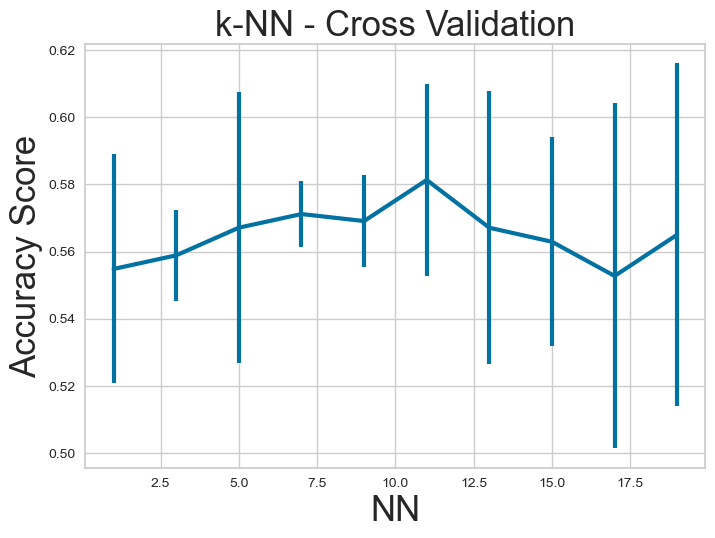

In [65]:
nn_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
x_train_nn, x_test_nn, y_train_nn, y_test_nn = train_test_split(X, y, test_size = 0.2, random_state=(1))
merr = []
serr = []

for nn in nn_range:
    knn_model = KNeighborsClassifier(n_neighbors=nn, weights='uniform')
    knn_model.fit(x_train_nn, y_train_nn)
    y_pred_nn = knn_model.predict(x_test_nn)
    print("NN = ", nn)
    print('Train accuracy score:',knn_model.score(x_train_nn, y_train_nn))
    print('Test accuracy score:',knn_model.score(x_test_nn, y_test_nn))
    
    scores_knn = cross_val_score(knn_model, x_test_nn, y_test_nn, cv=5, scoring='accuracy')
    merr.append(np.array(scores_knn).mean())
    serr.append(np.array(scores_knn).std())

plt.errorbar(nn_range, merr, yerr = serr, linewidth=3)
plt.xlabel('NN', fontsize=25)
plt.ylabel('Accuracy Score', fontsize=25)
title_cv = f"k-NN - Cross Validation"
plt.title(title_cv, fontsize=25)
plt.show()

## Review Scores Cleanliness
### Logistic Regression
#### Defining the Input and Target Variables

In [66]:
X = listings[
                ['host_response_time', 'host_response_rate', 'host_acceptance_rate',
                 'bedrooms', 'beds','neighbourhood_cleansed',
                 'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
                 'host_identity_verified', 'room_type',
                 'accommodates','price', 'minimum_nights', 'maximum_nights',
                 'bath-products','electric-system',
                 'food-services','house-furniture','house-rules',
                 'kitchen-appliances','parking','recreation','safety',
                 'host_email','host_work_email'] + list(reviews.columns[2:])
]

In [67]:
y = listings[['review_scores_cleanliness']]
y = (y/y.max())*100

y = y.assign(
    rating_bin_ep = pd.qcut(
        y['review_scores_cleanliness'],
        q=3,
        duplicates='drop',
        labels=[0,1,2]
    )
)

#### Min Max of Each Bin

In [68]:
y.groupby('rating_bin_ep').min()

review_scores_cleanliness
rating_bin_ep                           
0                                   20.0
1                                   94.4
2                                   98.8

In [69]:
y.groupby('rating_bin_ep').max()

review_scores_cleanliness
rating_bin_ep                           
0                                   94.2
1                                   98.6
2                                  100.0

#### Splitting Data in 75-25 Ratio

In [70]:
y = y['rating_bin_ep']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### Number of Records in Each Bin

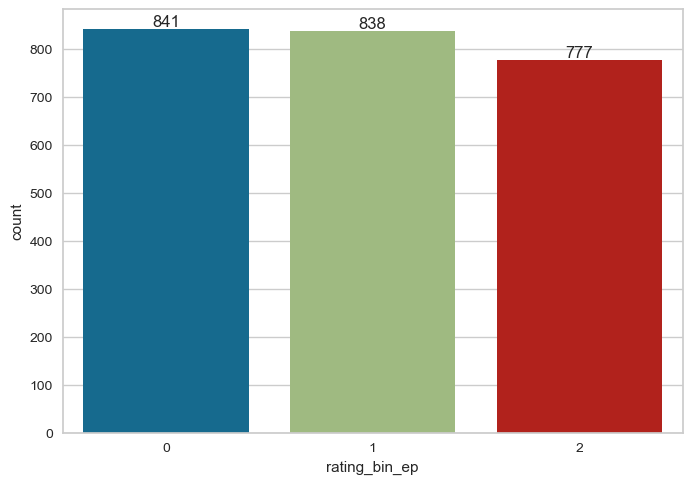

In [71]:
cnt_plt = sns.countplot(y)
cnt_plt.bar_label(cnt_plt.containers[0])
plt.show()

#### Logistic Regression - Varied C Range, using 'newton-cg' solver and multi_class='multinomial'

C =  0.001
Train accuracy score: 0.4826275787187839
Test accuracy score: 0.4723127035830619
Mean Squared Error:  1.1042345276872965
C =  0.1
Train accuracy score: 0.5331161780673181
Test accuracy score: 0.5
Mean Squared Error:  0.9690553745928339
C =  1
Train accuracy score: 0.5689467969598263
Test accuracy score: 0.5342019543973942
Mean Squared Error:  0.8615635179153095
C =  10
Train accuracy score: 0.5749185667752443
Test accuracy score: 0.5342019543973942
Mean Squared Error:  0.8469055374592834
C =  100
Train accuracy score: 0.5749185667752443
Test accuracy score: 0.5407166123778502
Mean Squared Error:  0.8306188925081434
C =  1000
Train accuracy score: 0.5732899022801303
Test accuracy score: 0.5423452768729642
Mean Squared Error:  0.8289902280130294


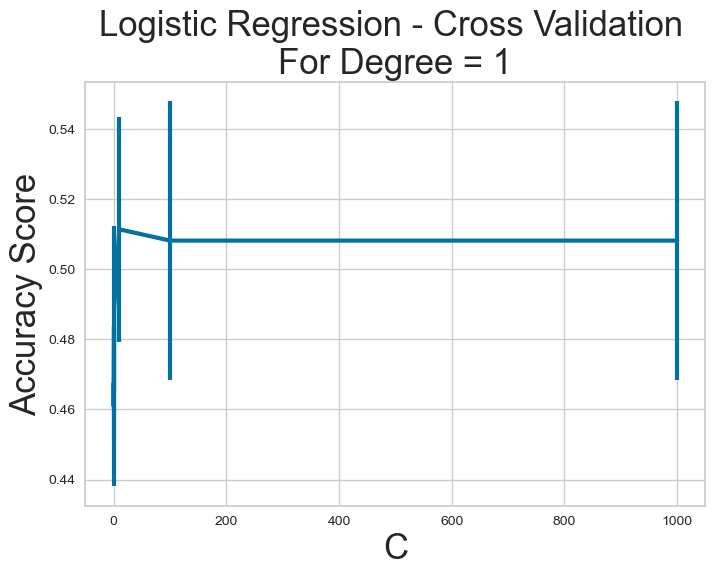

In [72]:
c_range = [0.001, 0.1, 1, 10, 100, 1000]
mean_error = []
std_error = []
for c in sorted(c_range):
    logit = LogisticRegression(C=c, random_state=0, solver='newton-cg',multi_class='multinomial')
    logit.fit(X_train, y_train)
    y_pred = logit.predict(X_test)
    print("C = ",c)
    print('Train accuracy score:',logit.score(X_train, y_train))
    print('Test accuracy score:',logit.score(X_test, y_test))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    scores = cross_val_score(logit, X_test, y_test, cv=5, scoring='accuracy')
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())
plt.errorbar(c_range, mean_error, yerr = std_error, linewidth=3)
plt.xlabel('C', fontsize=25)
plt.ylabel('Accuracy Score', fontsize=25)
title_cv = "Logistic Regression - Cross Validation \nFor Degree = 1"
plt.title(title_cv, fontsize=25)
plt.show()

#### Feature Importance

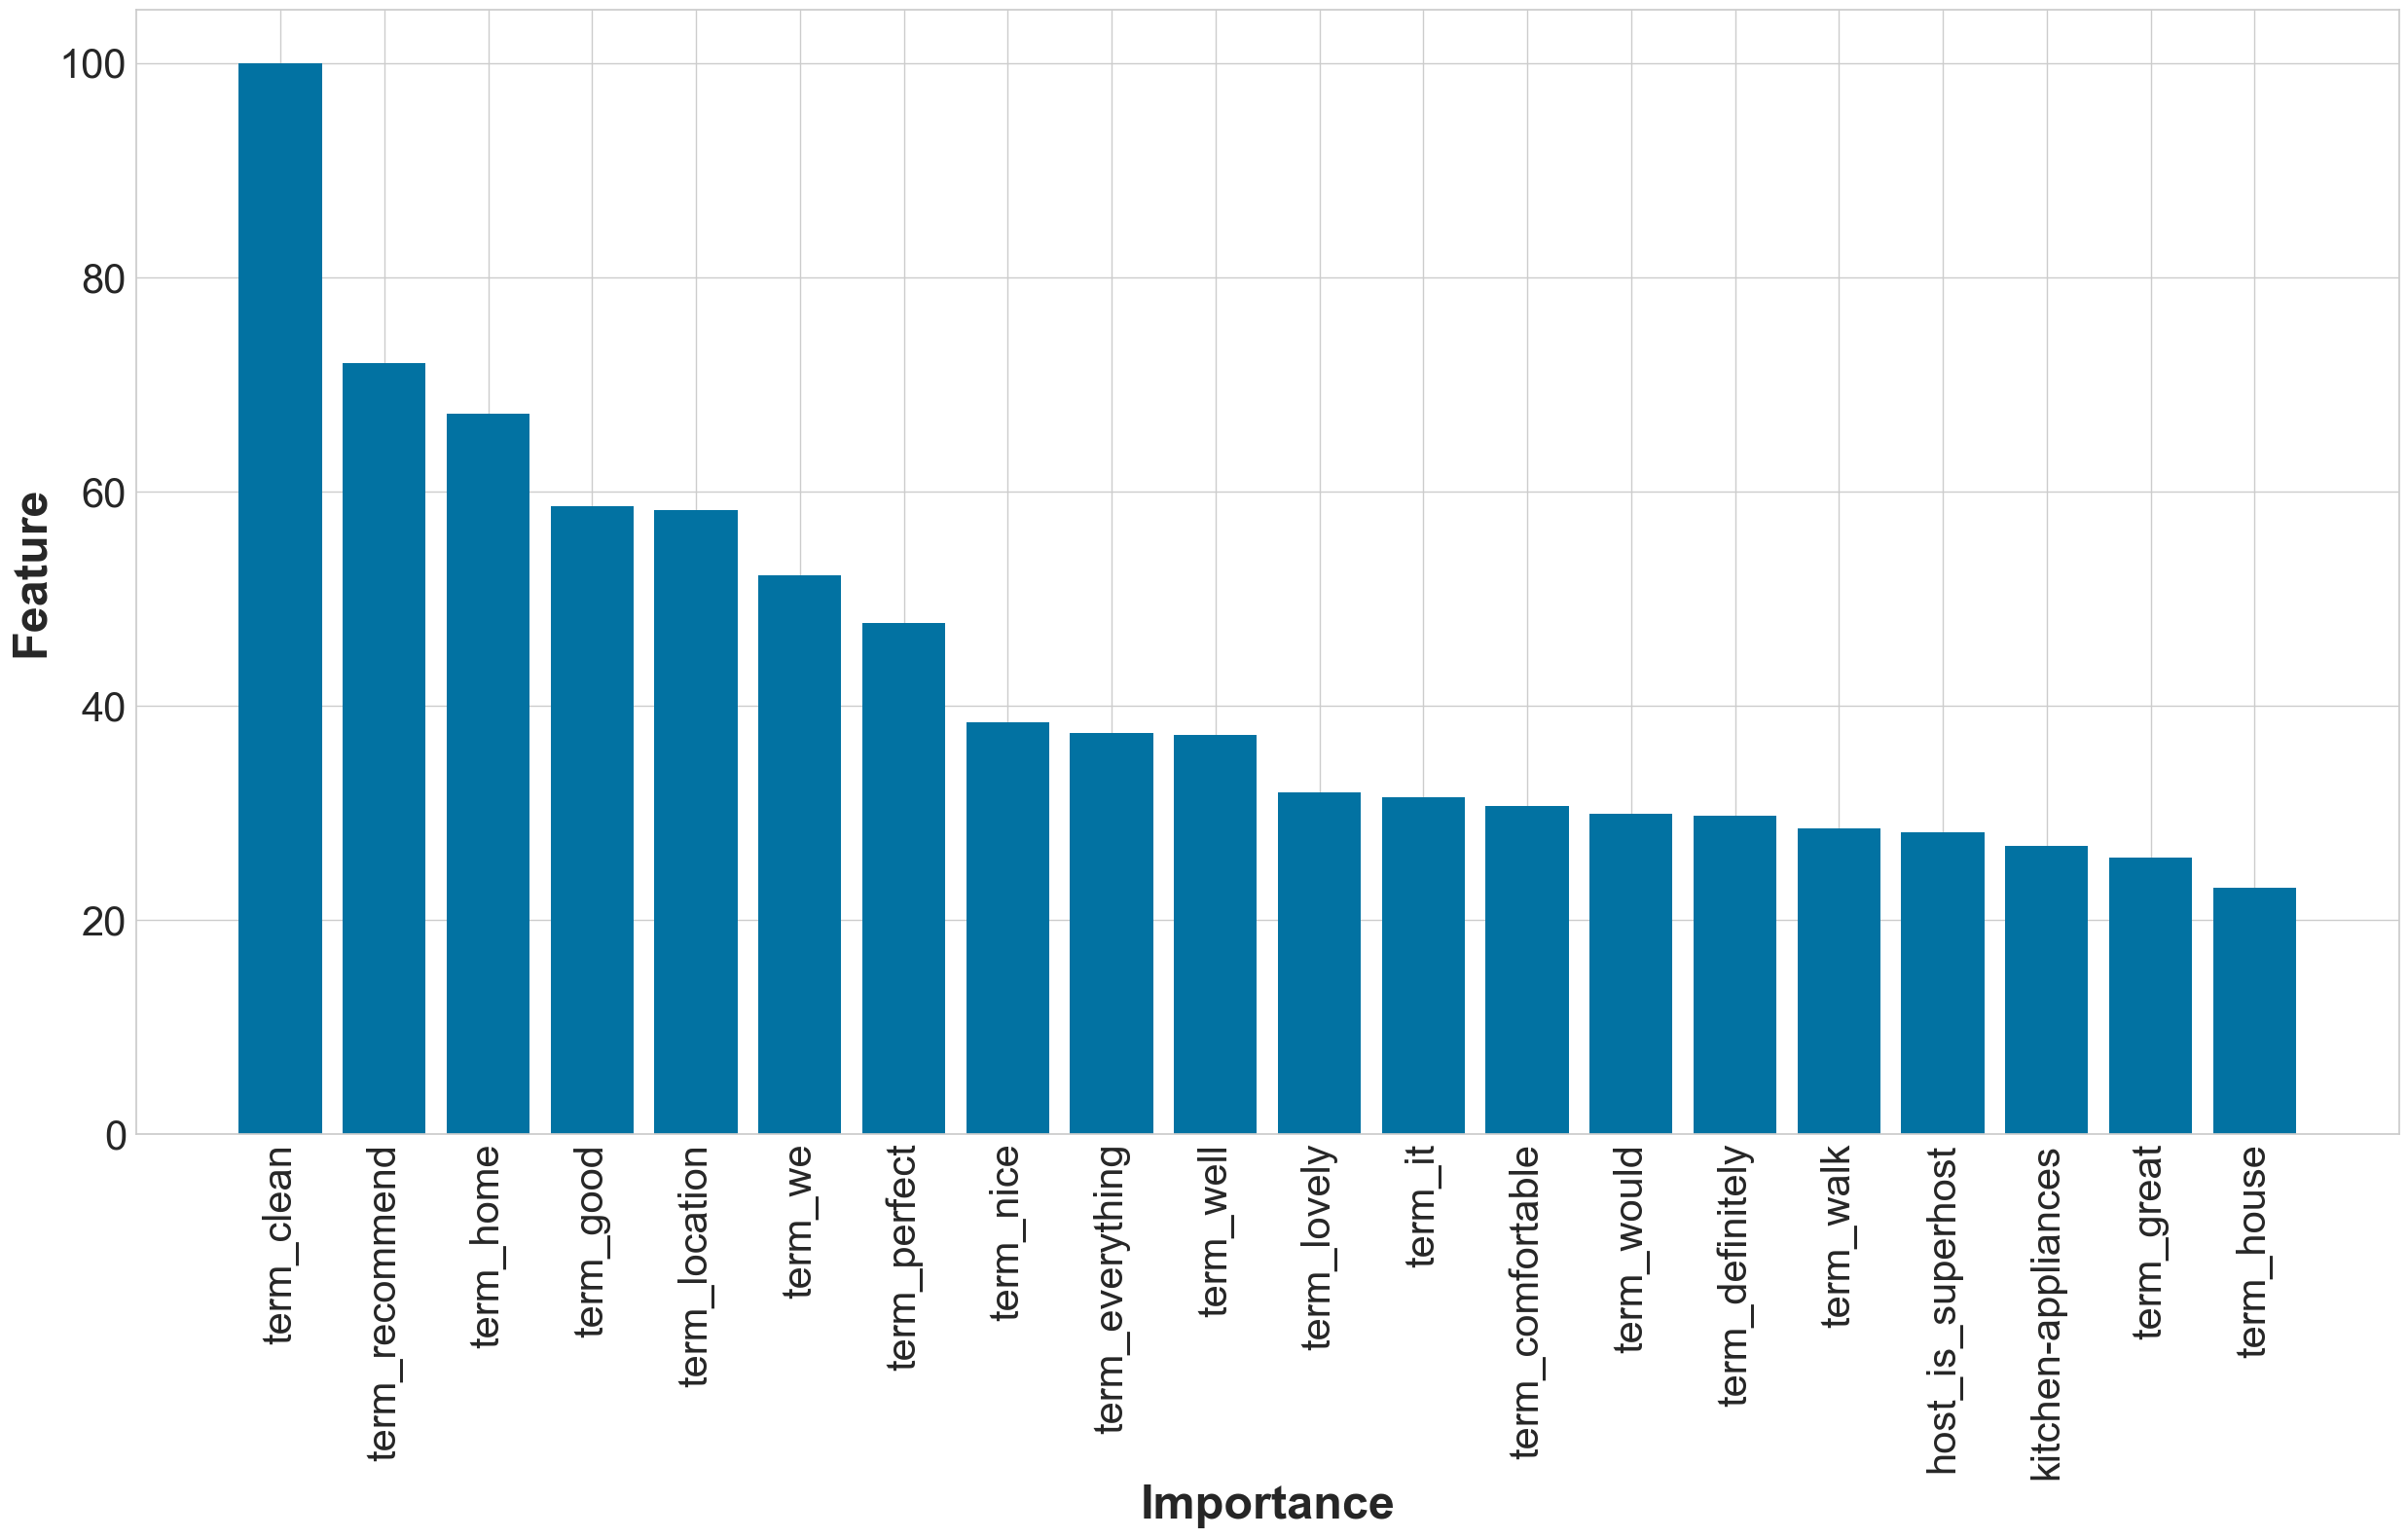

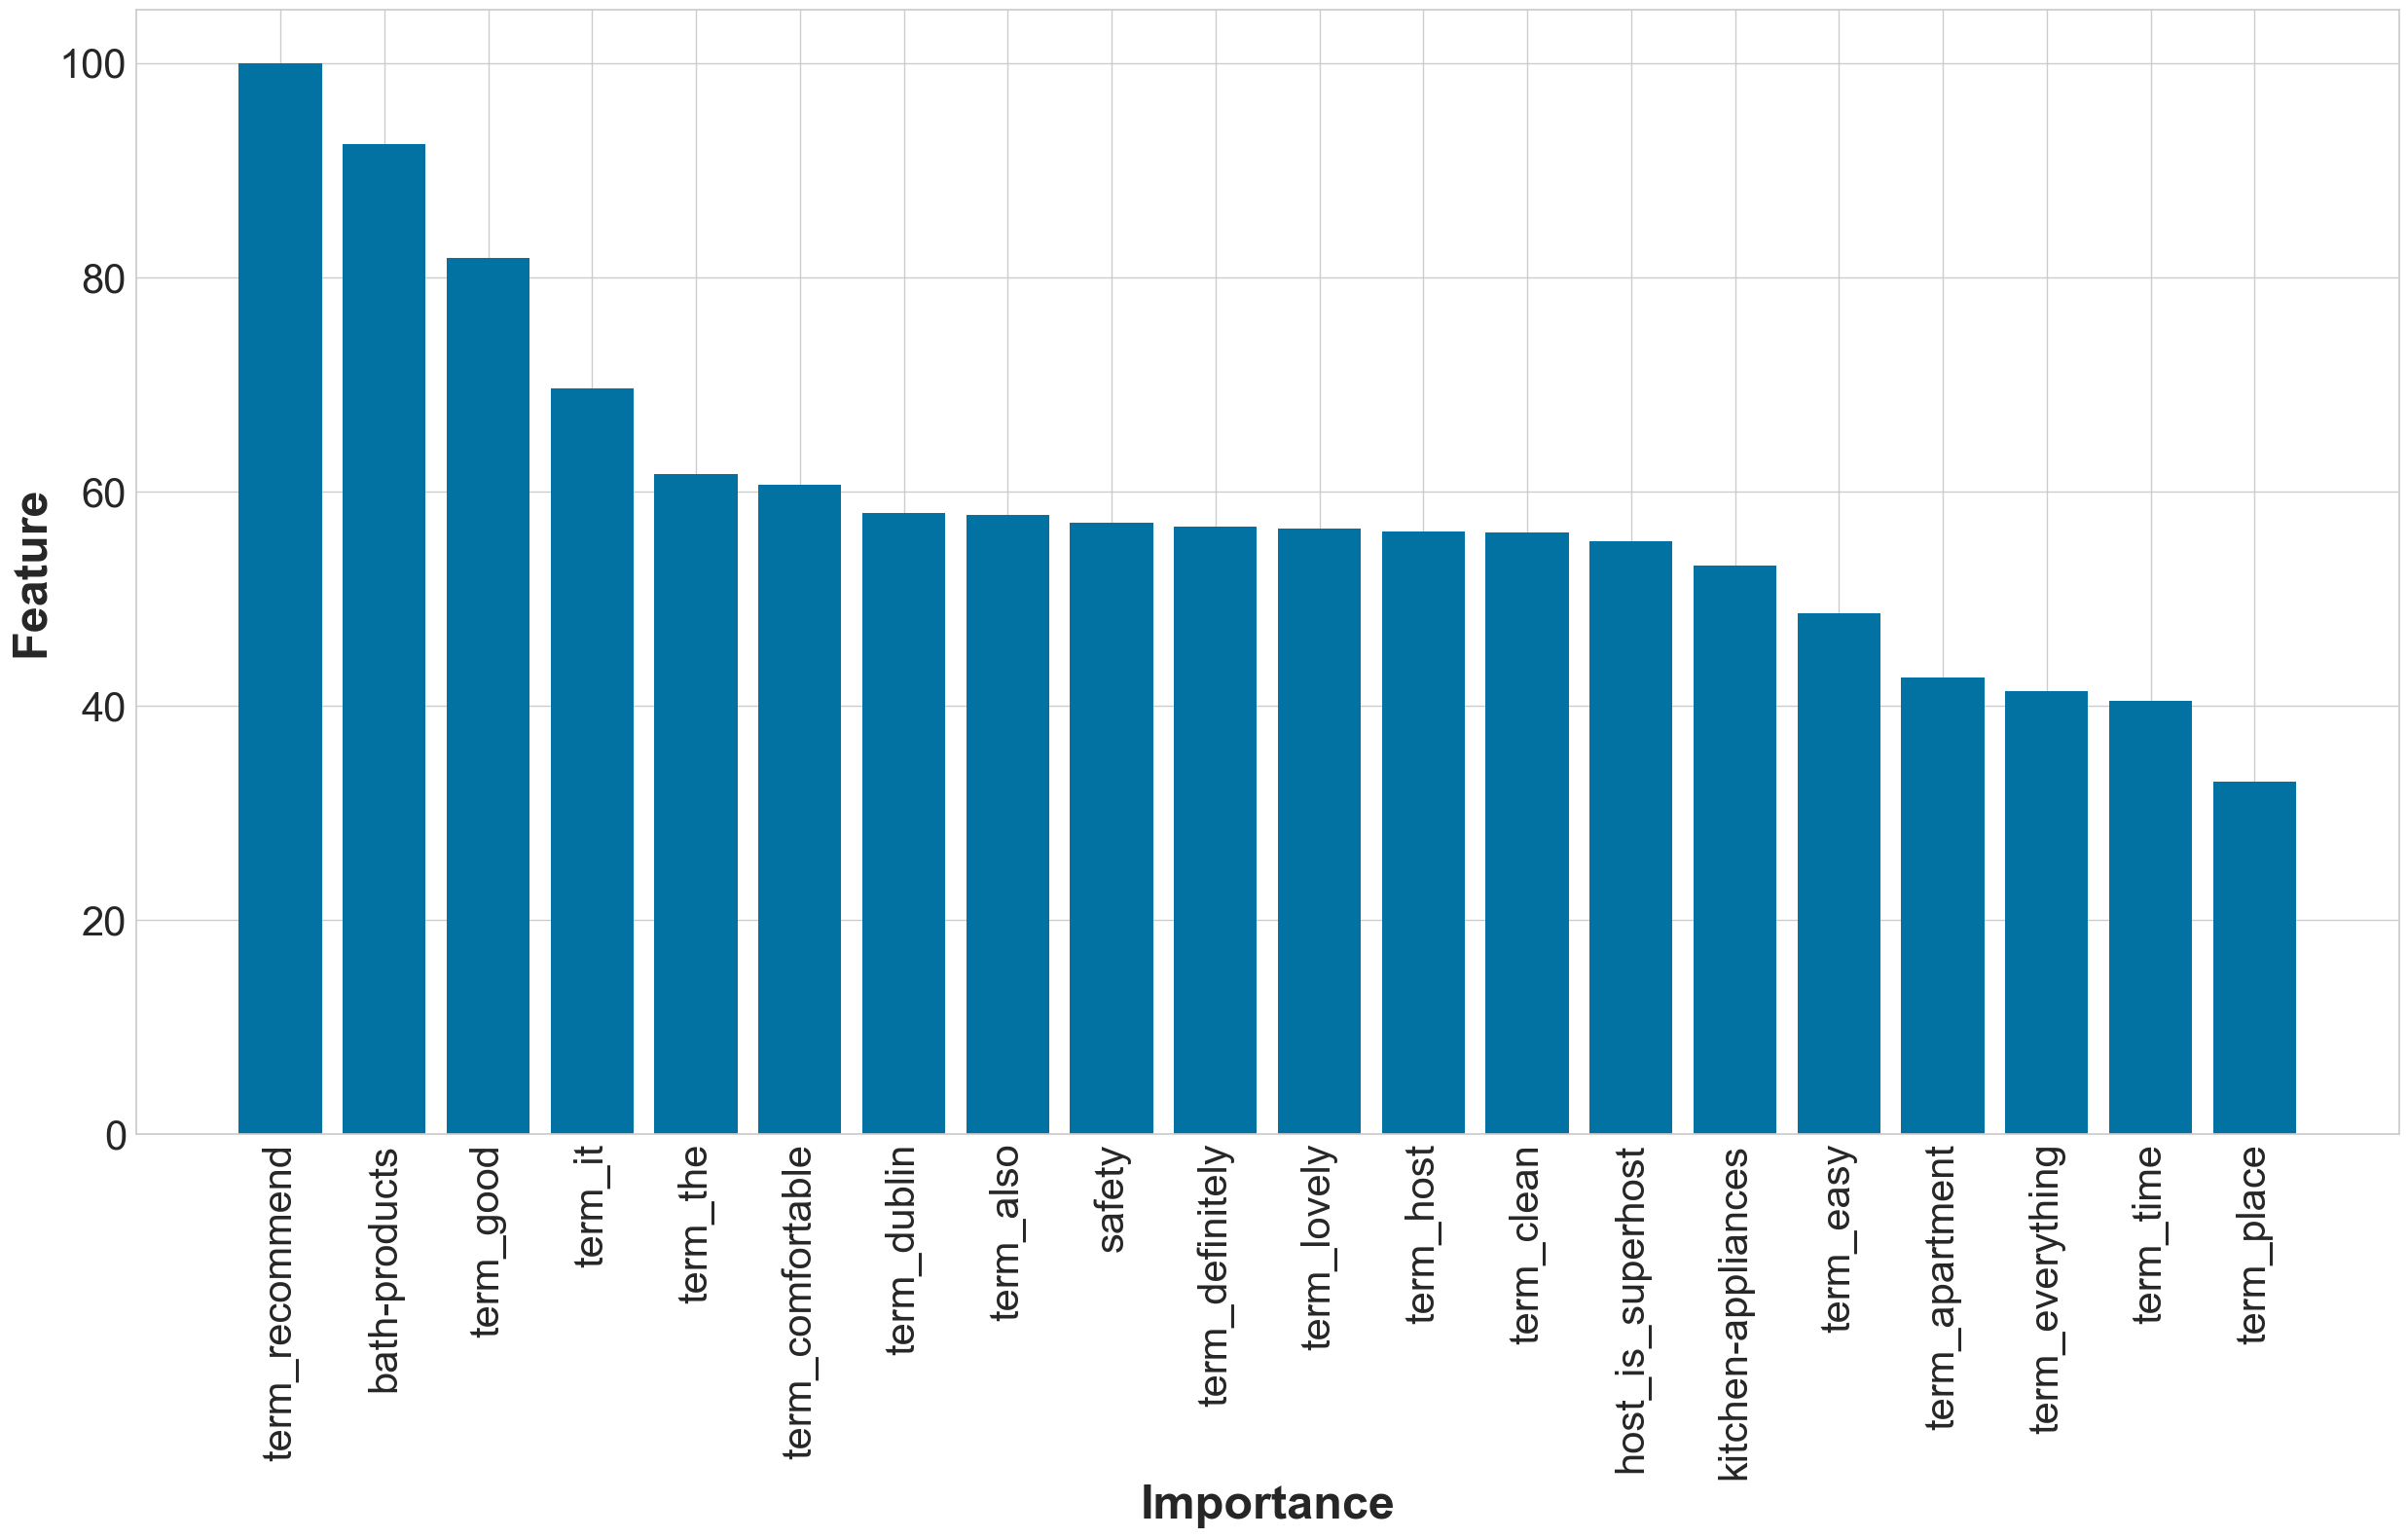

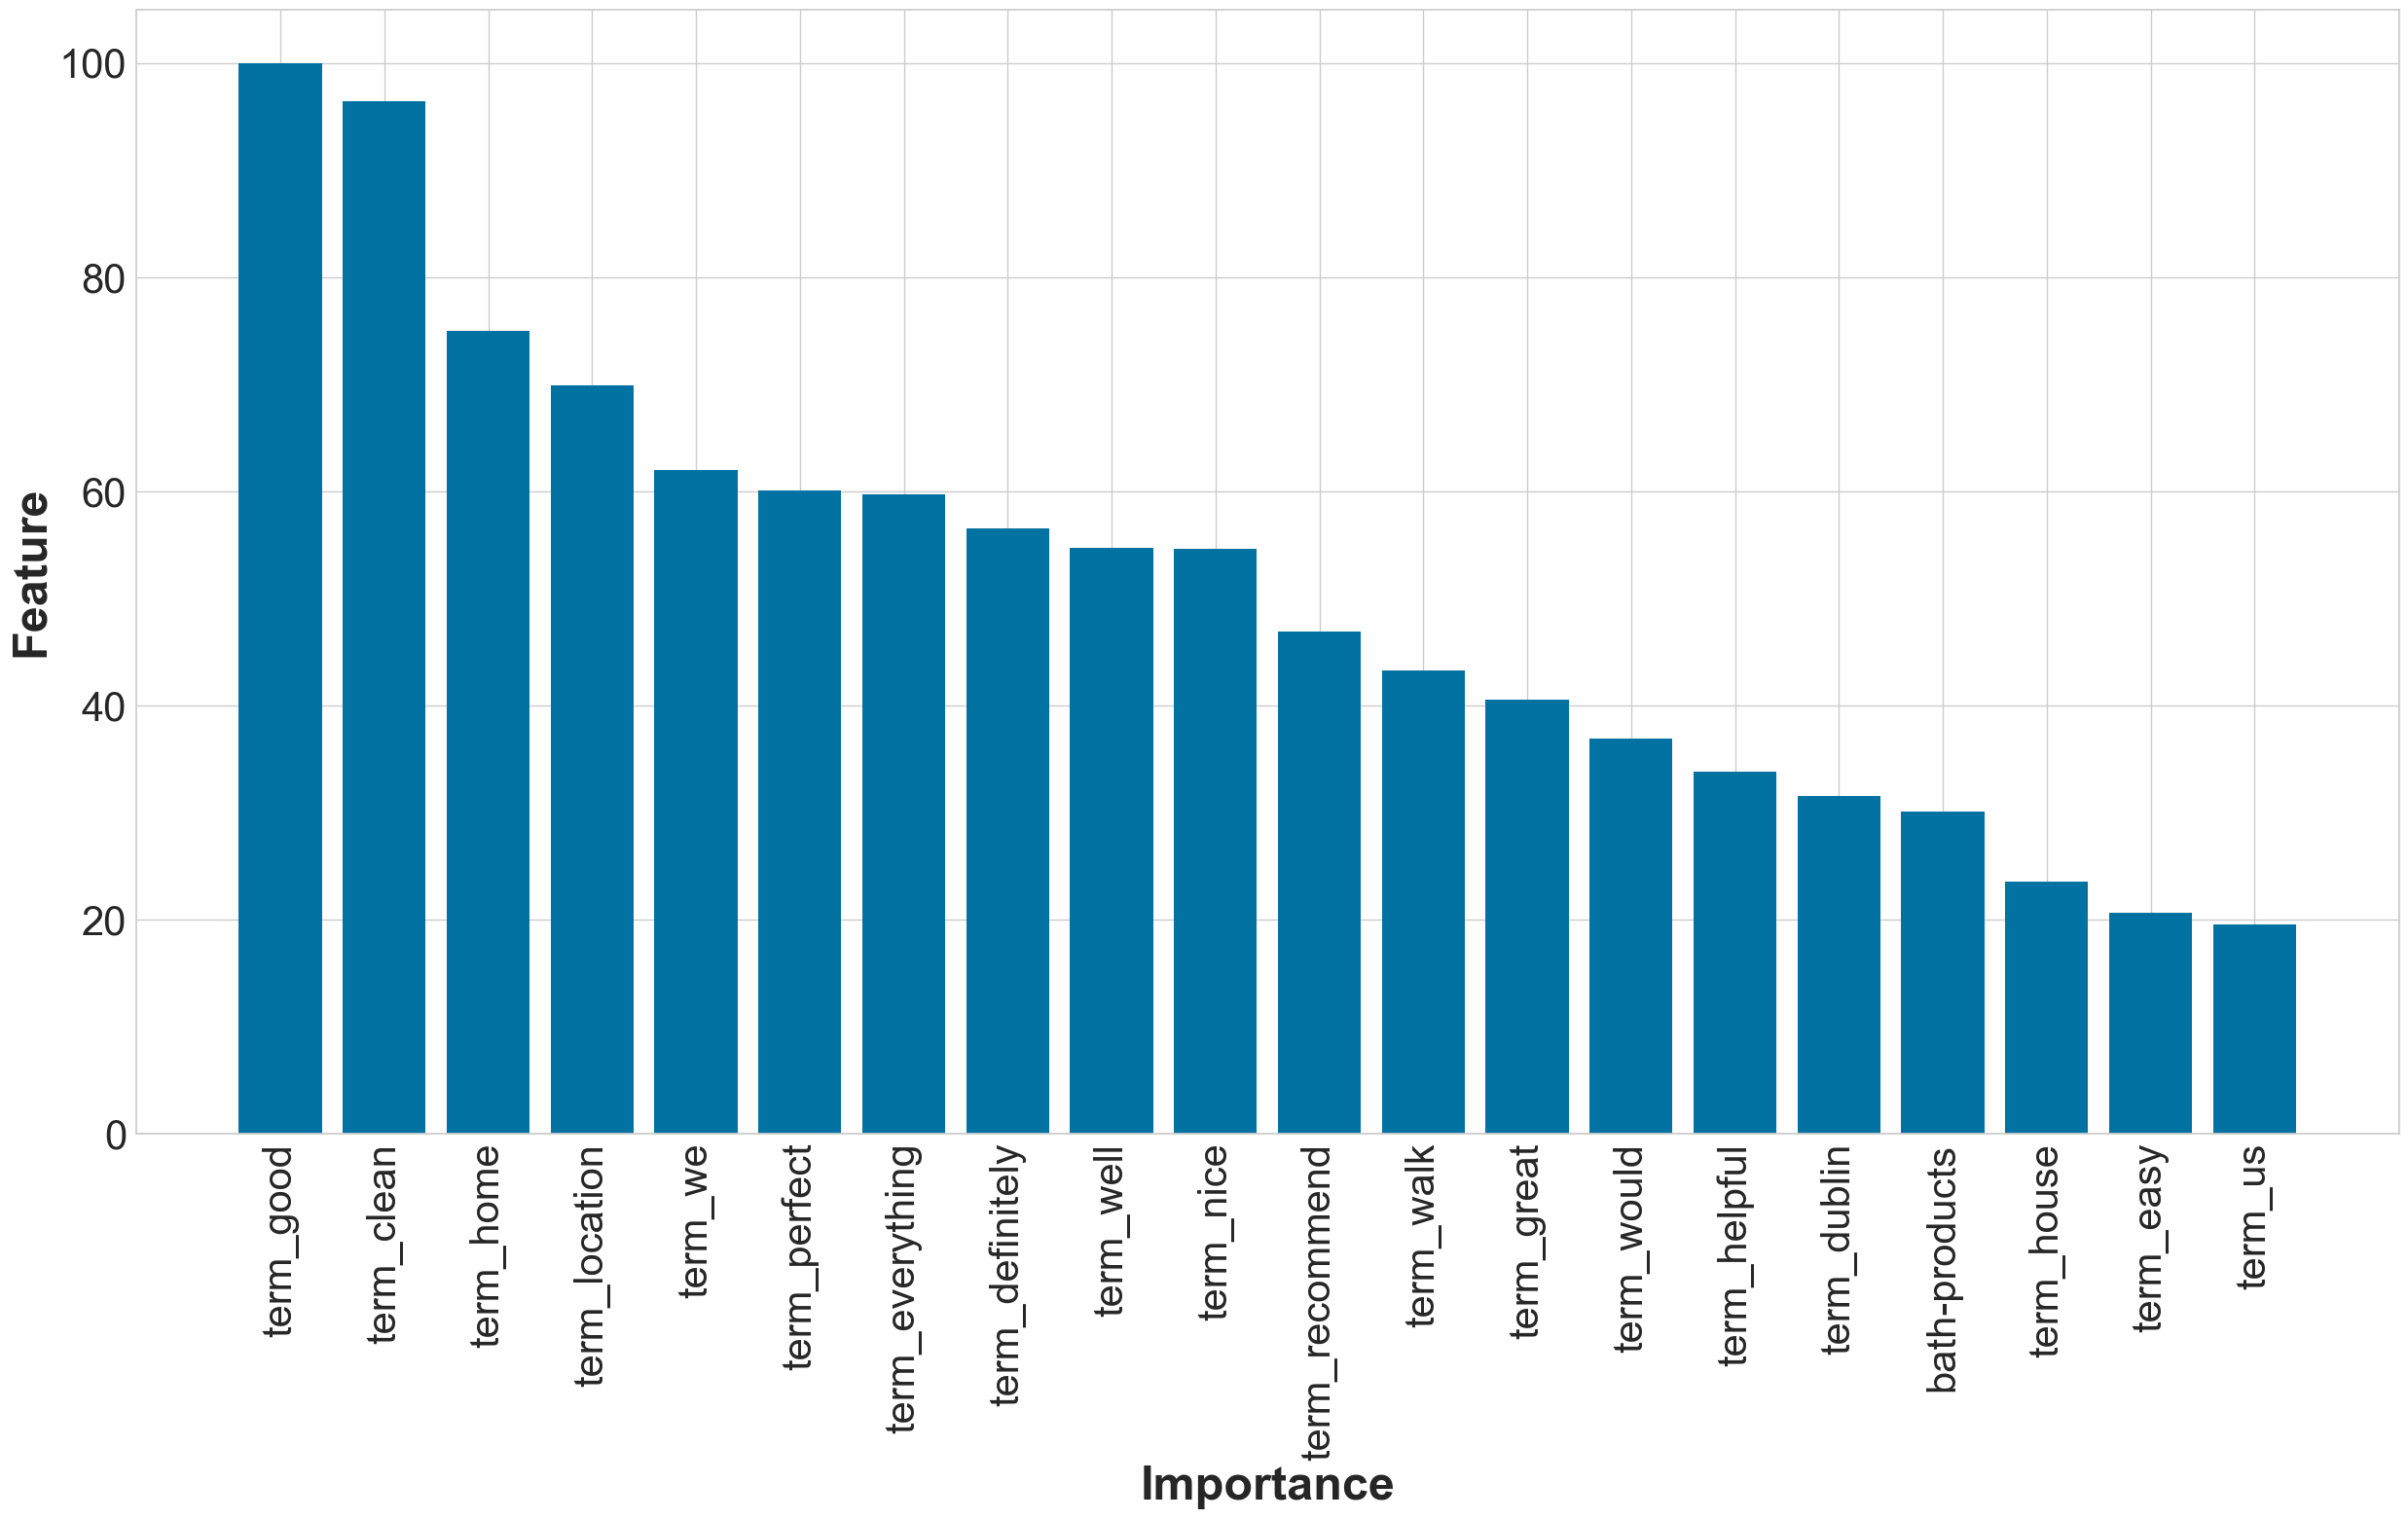

In [73]:
cols = X.columns
cols = np.asarray(cols)

plt.figure(figsize=(30,15))
feature_importance = abs(logit.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
top_features = pd.DataFrame({'feature_imp': feature_importance, 
                             'features': cols}, columns=['feature_imp', 'features'])
top_features = top_features.sort_values(by='feature_imp', ascending=False).head(20)
plt.bar(top_features.features, top_features.feature_imp)
plt.xlabel('Importance', fontsize=35, fontweight='bold')
plt.ylabel('Feature', fontsize=35, fontweight='bold')
plt.xticks(fontsize=30, rotation = 90)
plt.yticks(fontsize=30)
plt.show()

plt.figure(figsize=(30,15))
feature_importance = abs(logit.coef_[1])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
top_features = pd.DataFrame({'feature_imp': feature_importance, 
                             'features': cols}, columns=['feature_imp', 'features'])
top_features = top_features.sort_values(by='feature_imp', ascending=False).head(20)
plt.bar(top_features.features, top_features.feature_imp)
plt.xlabel('Importance', fontsize=35, fontweight='bold')
plt.ylabel('Feature', fontsize=35, fontweight='bold')
plt.xticks(fontsize=30, rotation = 90)
plt.yticks(fontsize=30)
plt.show()

plt.figure(figsize=(30,15))
feature_importance = abs(logit.coef_[2])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
top_features = pd.DataFrame({'feature_imp': feature_importance, 
                             'features': cols}, columns=['feature_imp', 'features'])
top_features = top_features.sort_values(by='feature_imp', ascending=False).head(20)
plt.bar(top_features.features, top_features.feature_imp)
plt.xlabel('Importance', fontsize=35, fontweight='bold')
plt.ylabel('Feature', fontsize=35, fontweight='bold')
plt.xticks(fontsize=30, rotation = 90)
plt.yticks(fontsize=30)
plt.show()

#### ROC-AUC Curve for all three categories

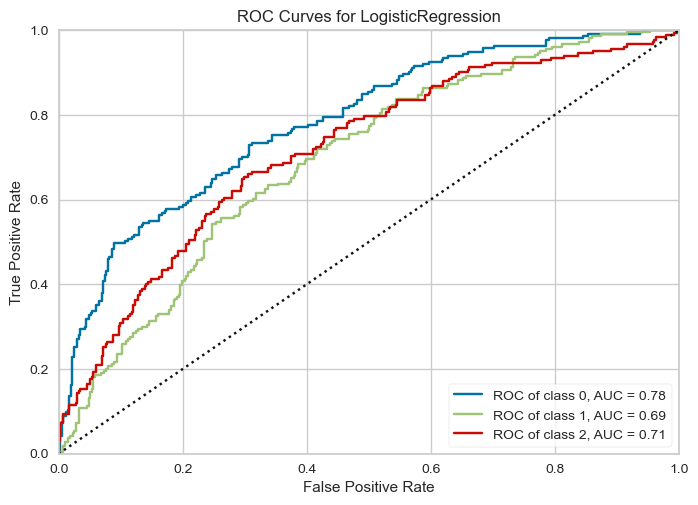

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [74]:
visualizer = ROCAUC(logit, classes=["0", "1", "2"], macro=False, micro=False)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)        
visualizer.show() 

#### Polynomial Degree and Error Plots

 Logistic Regression
 For Degree =  2
 For C =  0.001
 Confusion Matrix - 
 [[120  29  26]
 [ 42  76  50]
 [ 44  42  63]]
 Train accuracy score:  0.6583503054989817
 Test accuracy score:  0.5264227642276422
 F1 Score =  0.6816143497757847
 Classification Report
               precision    recall  f1-score   support

           0       0.58      0.69      0.63       175
           1       0.52      0.45      0.48       168
           2       0.45      0.42      0.44       149

    accuracy                           0.53       492
   macro avg       0.52      0.52      0.52       492
weighted avg       0.52      0.53      0.52       492



 Logistic Regression
 For Degree =  2
 For C =  0.1
 Confusion Matrix - 
 [[120  29  26]
 [ 42  76  50]
 [ 44  42  63]]
 Train accuracy score:  0.6568228105906314
 Test accuracy score:  0.5264227642276422
 F1 Score =  0.6816143497757847
 Classification Report
               precision    recall  f1-score   support

           0       0.58      0.69     

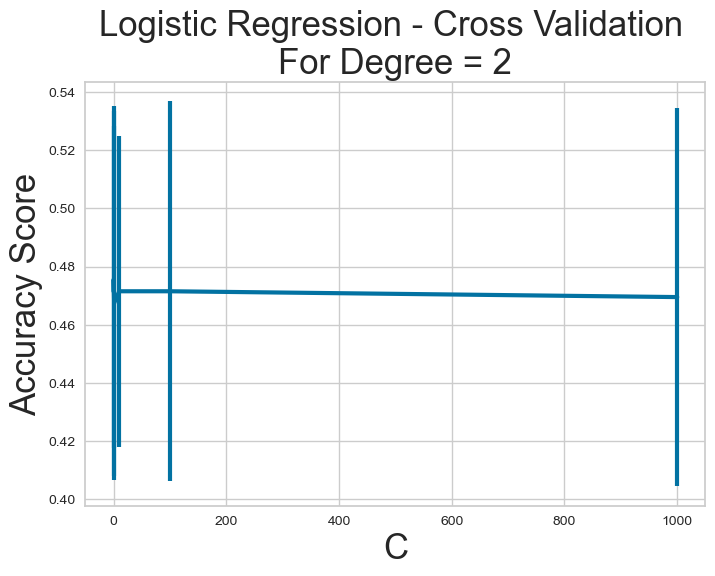

In [75]:
c_range = [0.001, 0.1, 1, 10, 100, 1000]
degree_range = [2]

for i in degree_range:
    trans = PolynomialFeatures(degree = i)
    x_poly = trans.fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state=(1))
    mean_error = []
    std_error = []
    for c in c_range:
        log_reg = LogisticRegression(C = c, random_state=0, solver='newton-cg',multi_class='multinomial')
        log_reg.fit(x_train, y_train)
        y_pred = log_reg.predict(x_test)
        
        cnf_mtx = metrics.confusion_matrix(y_test, y_pred)
        f1_score = (2*cnf_mtx[1][1])/((2*cnf_mtx[1][1]) + cnf_mtx[0][1] + cnf_mtx[1][0])
        
        scores = cross_val_score(log_reg, x_test, y_test, cv=5, scoring='accuracy')
        mean_error.append(np.array(scores).mean())
        std_error.append(np.array(scores).std())
        
        
        print(" Logistic Regression")
        print(" For Degree = ", i)
        print(" For C = ", c)
        print(" Confusion Matrix - \n", cnf_mtx)
        print(' Train accuracy score: ', log_reg.score(x_train, y_train))
        print(' Test accuracy score: ', log_reg.score(x_test, y_test))
        print(" F1 Score = ", f1_score)
        print(" Classification Report\n", classification_report(y_test, y_pred))
        print("\n")
    
    plt.errorbar(c_range, mean_error, yerr = std_error, linewidth=3)
    plt.xlabel('C', fontsize=25)
    plt.ylabel('Accuracy Score', fontsize=25)
    title_cv = f"Logistic Regression - Cross Validation \nFor Degree = {i}"
    plt.title(title_cv, fontsize=25)
    plt.show()

#### k-NN Classifier

NN =  1
Train accuracy score: 1.0
Test accuracy score: 0.4451219512195122
NN =  3
Train accuracy score: 0.6832993890020367
Test accuracy score: 0.4410569105691057
NN =  5
Train accuracy score: 0.6221995926680245
Test accuracy score: 0.45934959349593496
NN =  7
Train accuracy score: 0.5962321792260692
Test accuracy score: 0.45121951219512196
NN =  9
Train accuracy score: 0.5682281059063137
Test accuracy score: 0.42073170731707316
NN =  11
Train accuracy score: 0.5478615071283096
Test accuracy score: 0.42073170731707316
NN =  13
Train accuracy score: 0.5473523421588594
Test accuracy score: 0.41260162601626016
NN =  15
Train accuracy score: 0.5244399185336049
Test accuracy score: 0.4369918699186992
NN =  17
Train accuracy score: 0.5229124236252546
Test accuracy score: 0.4349593495934959
NN =  19
Train accuracy score: 0.5341140529531568
Test accuracy score: 0.40853658536585363


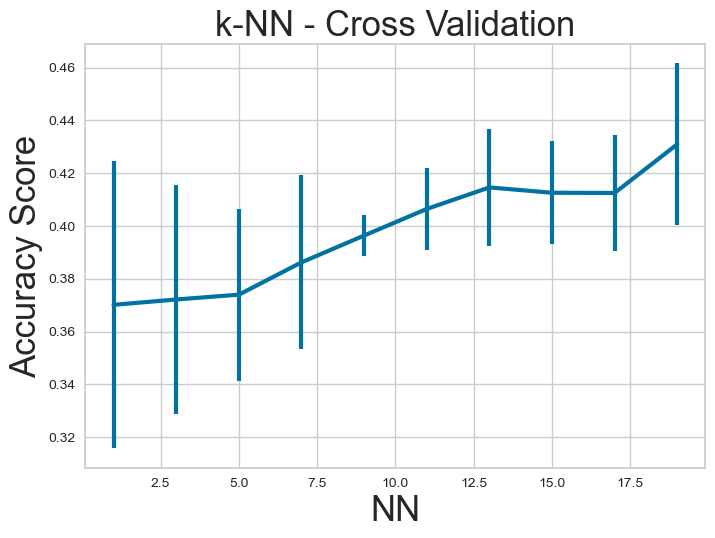

In [76]:
nn_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
x_train_nn, x_test_nn, y_train_nn, y_test_nn = train_test_split(X, y, test_size = 0.2, random_state=(1))
merr = []
serr = []

for nn in nn_range:
    knn_model = KNeighborsClassifier(n_neighbors=nn, weights='uniform')
    knn_model.fit(x_train_nn, y_train_nn)
    y_pred_nn = knn_model.predict(x_test_nn)
    print("NN = ", nn)
    print('Train accuracy score:',knn_model.score(x_train_nn, y_train_nn))
    print('Test accuracy score:',knn_model.score(x_test_nn, y_test_nn))
    
    scores_knn = cross_val_score(knn_model, x_test_nn, y_test_nn, cv=5, scoring='accuracy')
    merr.append(np.array(scores_knn).mean())
    serr.append(np.array(scores_knn).std())

plt.errorbar(nn_range, merr, yerr = serr, linewidth=3)
plt.xlabel('NN', fontsize=25)
plt.ylabel('Accuracy Score', fontsize=25)
title_cv = f"k-NN - Cross Validation"
plt.title(title_cv, fontsize=25)
plt.show()

#### ROC-AUC Curve

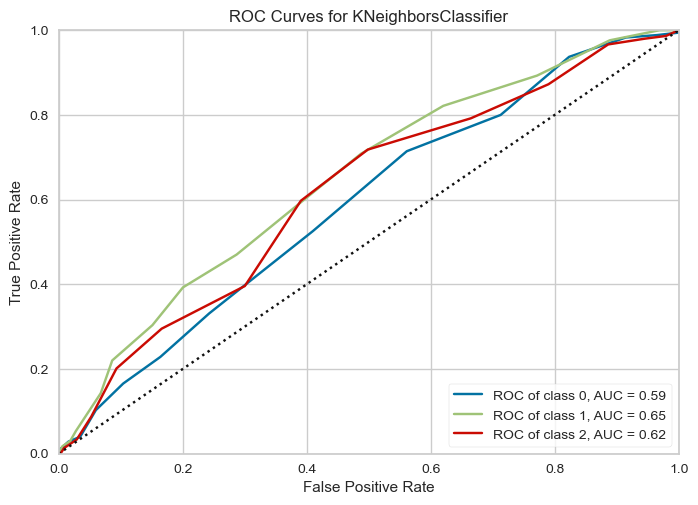

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [77]:
visualizer = ROCAUC(knn_model, classes=["0", "1", "2"], macro=False, micro=False)

visualizer.fit(x_train_nn, y_train_nn)
visualizer.score(x_test_nn, y_test_nn)        
visualizer.show() 

## Review Scores Communication
### Logistic Regression
#### Defining the Input and Target Variables

In [78]:
X = listings[
                ['host_response_time', 'host_response_rate', 'host_acceptance_rate',
                 'bedrooms', 'beds','neighbourhood_cleansed',
                 'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
                 'host_identity_verified', 'room_type',
                 'accommodates','price', 'minimum_nights', 'maximum_nights',
                 'bath-products','electric-system',
                 'food-services','house-furniture','house-rules',
                 'kitchen-appliances','parking','recreation','safety',
                 'host_email','host_work_email'] + list(reviews.columns[2:])
]

In [79]:
y = listings[['review_scores_communication']]
y = (y/y.max())*100

y = y.assign(
    rating_bin_ep = pd.qcut(
        y['review_scores_communication'],
        q=2,
        duplicates='drop',
        labels=[0,1]
    )
)

#### Min Max of Each Bin

In [80]:
y.groupby('rating_bin_ep').min()

review_scores_communication
rating_bin_ep                             
0                                     20.0
1                                     99.2

In [81]:
y.groupby('rating_bin_ep').max()

review_scores_communication
rating_bin_ep                             
0                                     99.0
1                                    100.0

#### Splitting Data in 75-25 Ratio

In [82]:
y = y['rating_bin_ep']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### Number of Records in Each Bin

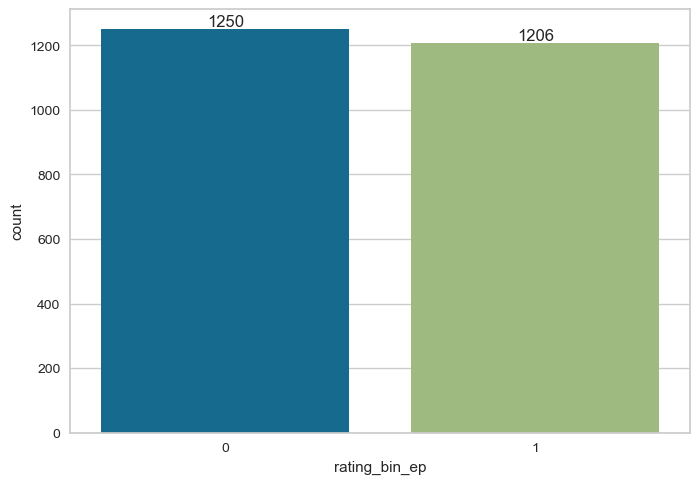

In [83]:
cnt_plt = sns.countplot(y)
cnt_plt.bar_label(cnt_plt.containers[0])
plt.show()

#### Logistic Regression - Varied C Range, using 'newton-cg' solver and multi_class='multinomial'

C =  0.001
Train accuracy score: 0.6368078175895765
Test accuracy score: 0.6400651465798045
Mean Squared Error:  0.35993485342019543
C =  0.1
Train accuracy score: 0.6818675352877307
Test accuracy score: 0.6775244299674267
Mean Squared Error:  0.32247557003257327
C =  1
Train accuracy score: 0.6927252985884907
Test accuracy score: 0.6726384364820847
Mean Squared Error:  0.3273615635179153
C =  10
Train accuracy score: 0.6965255157437568
Test accuracy score: 0.6791530944625407
Mean Squared Error:  0.32084690553745926
C =  100
Train accuracy score: 0.6943539630836048
Test accuracy score: 0.6758957654723127
Mean Squared Error:  0.3241042345276873
C =  1000
Train accuracy score: 0.6948968512486428
Test accuracy score: 0.6758957654723127
Mean Squared Error:  0.3241042345276873


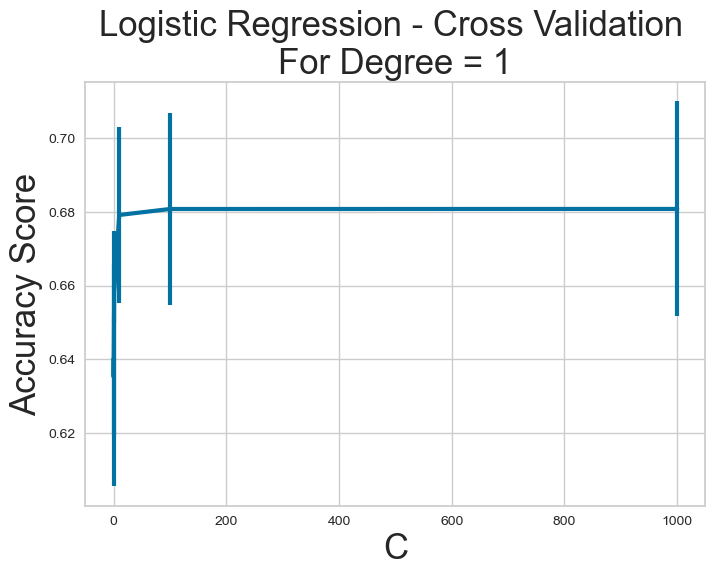

In [84]:
c_range = [0.001, 0.1, 1, 10, 100, 1000]
mean_error = []
std_error = []
for c in sorted(c_range):
    logit = LogisticRegression(C=c, random_state=0, solver='newton-cg',multi_class='multinomial')
    logit.fit(X_train, y_train)
    y_pred = logit.predict(X_test)
    print("C = ",c)
    print('Train accuracy score:',logit.score(X_train, y_train))
    print('Test accuracy score:',logit.score(X_test, y_test))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    scores = cross_val_score(logit, X_test, y_test, cv=5, scoring='accuracy')
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())
plt.errorbar(c_range, mean_error, yerr = std_error, linewidth=3)
plt.xlabel('C', fontsize=25)
plt.ylabel('Accuracy Score', fontsize=25)
title_cv = "Logistic Regression - Cross Validation \nFor Degree = 1"
plt.title(title_cv, fontsize=25)
plt.show()

#### Feature Importance

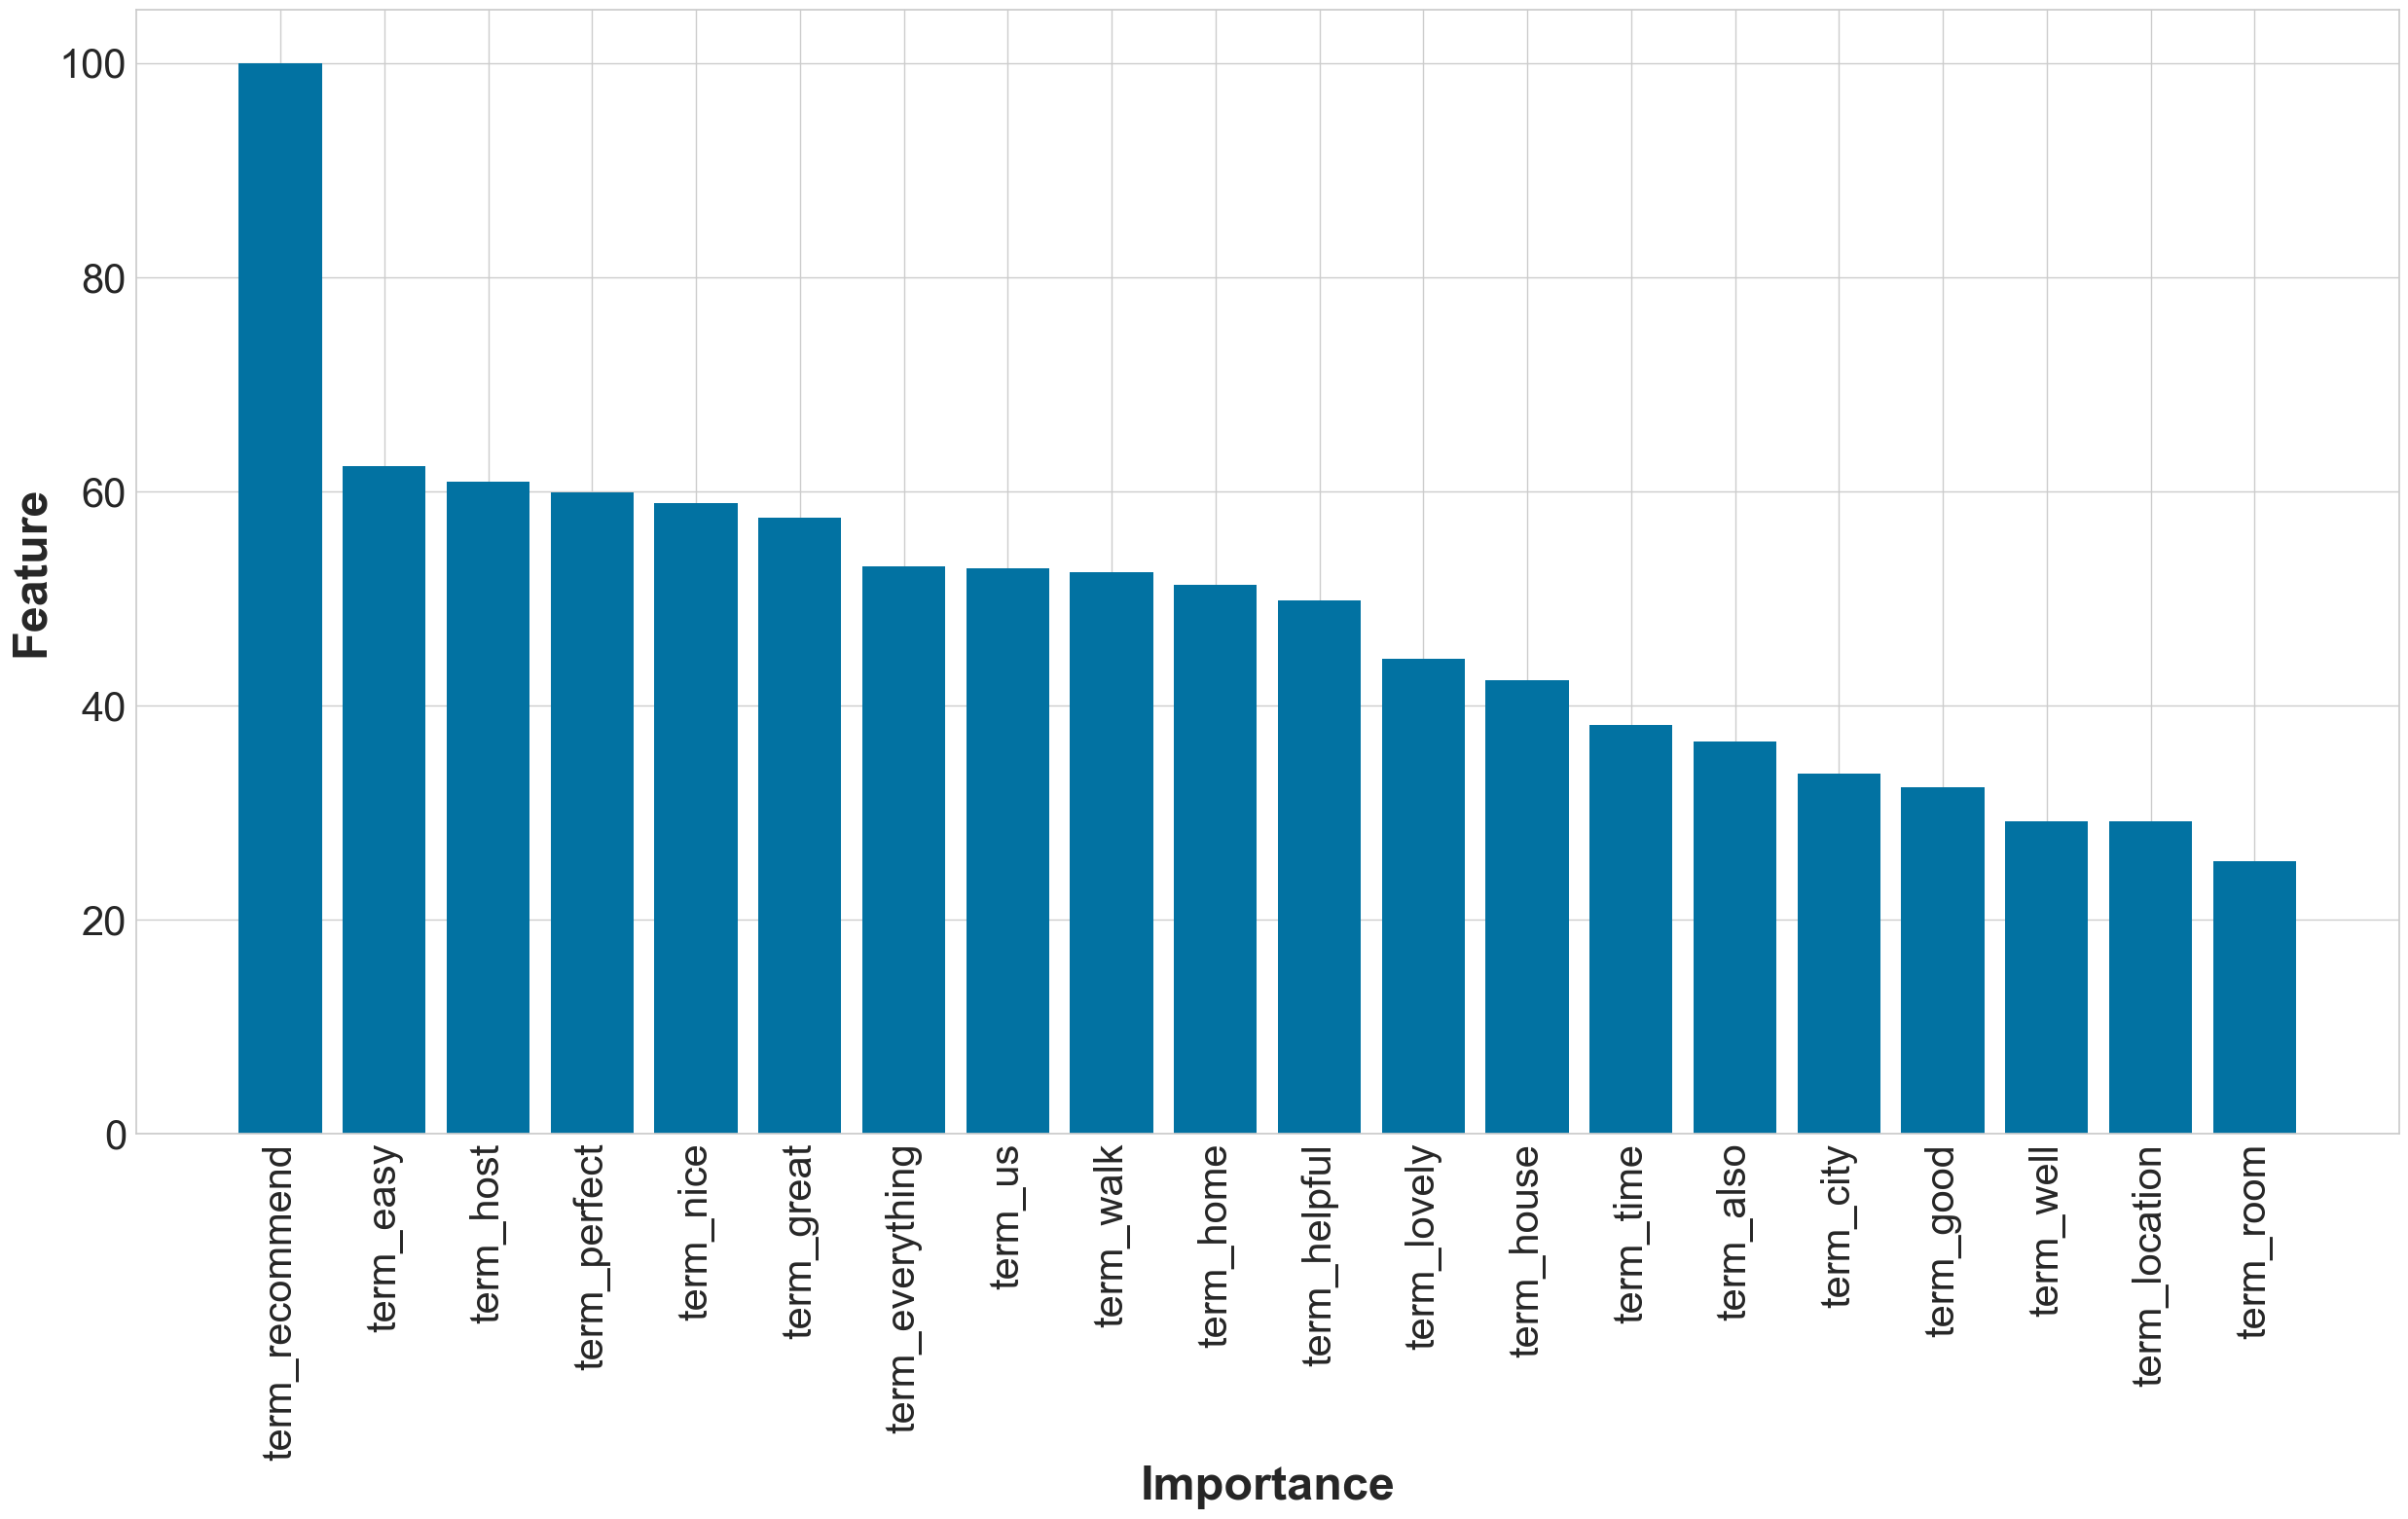

In [85]:
cols = X.columns
cols = np.asarray(cols)

plt.figure(figsize=(30,15))
feature_importance = abs(logit.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
top_features = pd.DataFrame({'feature_imp': feature_importance, 
                             'features': cols}, columns=['feature_imp', 'features'])
top_features = top_features.sort_values(by='feature_imp', ascending=False).head(20)
plt.bar(top_features.features, top_features.feature_imp)
plt.xlabel('Importance', fontsize=35, fontweight='bold')
plt.ylabel('Feature', fontsize=35, fontweight='bold')
plt.xticks(fontsize=30, rotation = 90)
plt.yticks(fontsize=30)
plt.show()

#### Polynomial Degree and Error Plots

 Logistic Regression
 For Degree =  2
 For C =  0.001
 Confusion Matrix - 
 [[191  67]
 [ 73 161]]
 Train accuracy score:  0.7724032586558045
 Test accuracy score:  0.7154471544715447
 F1 Score =  0.696969696969697
 Classification Report
               precision    recall  f1-score   support

           0       0.72      0.74      0.73       258
           1       0.71      0.69      0.70       234

    accuracy                           0.72       492
   macro avg       0.71      0.71      0.71       492
weighted avg       0.72      0.72      0.72       492



 Logistic Regression
 For Degree =  2
 For C =  0.1
 Confusion Matrix - 
 [[191  67]
 [ 70 164]]
 Train accuracy score:  0.7729124236252546
 Test accuracy score:  0.7215447154471545
 F1 Score =  0.7053763440860215
 Classification Report
               precision    recall  f1-score   support

           0       0.73      0.74      0.74       258
           1       0.71      0.70      0.71       234

    accuracy                  

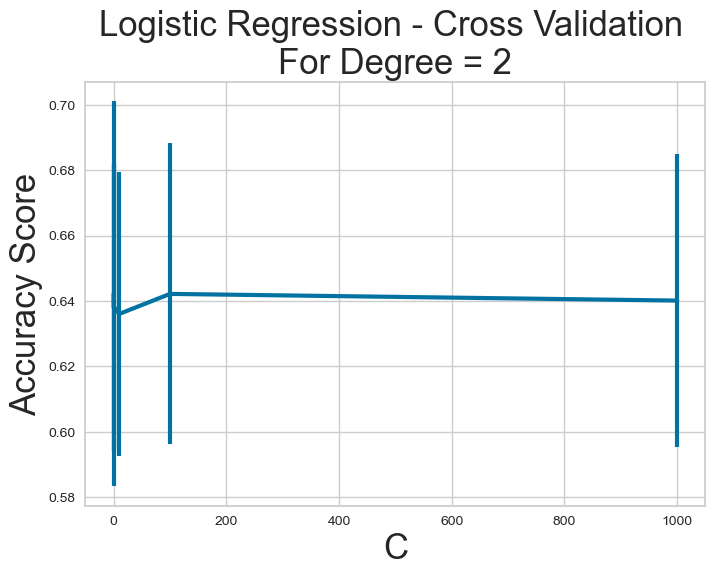

In [86]:
c_range = [0.001, 0.1, 1, 10, 100, 1000]
degree_range = [2]

for i in degree_range:
    trans = PolynomialFeatures(degree = i)
    x_poly = trans.fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state=(1))
    mean_error = []
    std_error = []
    for c in c_range:
        log_reg = LogisticRegression(C = c, random_state=0, solver='newton-cg',multi_class='multinomial')
        log_reg.fit(x_train, y_train)
        y_pred = log_reg.predict(x_test)
        
        cnf_mtx = metrics.confusion_matrix(y_test, y_pred)
        f1_score = (2*cnf_mtx[1][1])/((2*cnf_mtx[1][1]) + cnf_mtx[0][1] + cnf_mtx[1][0])
        
        scores = cross_val_score(log_reg, x_test, y_test, cv=5, scoring='accuracy')
        mean_error.append(np.array(scores).mean())
        std_error.append(np.array(scores).std())
        
        
        print(" Logistic Regression")
        print(" For Degree = ", i)
        print(" For C = ", c)
        print(" Confusion Matrix - \n", cnf_mtx)
        print(' Train accuracy score: ', log_reg.score(x_train, y_train))
        print(' Test accuracy score: ', log_reg.score(x_test, y_test))
        print(" F1 Score = ", f1_score)
        print(" Classification Report\n", classification_report(y_test, y_pred))
        print("\n")
    
    plt.errorbar(c_range, mean_error, yerr = std_error, linewidth=3)
    plt.xlabel('C', fontsize=25)
    plt.ylabel('Accuracy Score', fontsize=25)
    title_cv = f"Logistic Regression - Cross Validation \nFor Degree = {i}"
    plt.title(title_cv, fontsize=25)
    plt.show()

### k-NN Classifier

NN =  1
Train accuracy score: 1.0
Test accuracy score: 0.5975609756097561
NN =  3
Train accuracy score: 0.804989816700611
Test accuracy score: 0.6097560975609756
NN =  5
Train accuracy score: 0.7296334012219959
Test accuracy score: 0.6036585365853658
NN =  7
Train accuracy score: 0.7225050916496945
Test accuracy score: 0.6341463414634146
NN =  9
Train accuracy score: 0.7143584521384929
Test accuracy score: 0.6036585365853658
NN =  11
Train accuracy score: 0.695010183299389
Test accuracy score: 0.6138211382113821
NN =  13
Train accuracy score: 0.685336048879837
Test accuracy score: 0.6219512195121951
NN =  15
Train accuracy score: 0.6817718940936863
Test accuracy score: 0.6260162601626016
NN =  17
Train accuracy score: 0.6756619144602851
Test accuracy score: 0.6158536585365854
NN =  19
Train accuracy score: 0.6685336048879837
Test accuracy score: 0.6422764227642277


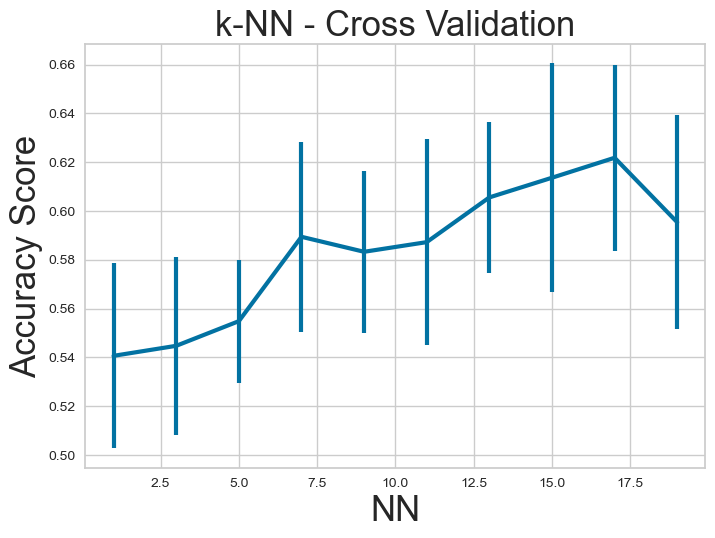

In [87]:
nn_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
x_train_nn, x_test_nn, y_train_nn, y_test_nn = train_test_split(X, y, test_size = 0.2, random_state=(1))
merr = []
serr = []

for nn in nn_range:
    knn_model = KNeighborsClassifier(n_neighbors=nn, weights='uniform')
    knn_model.fit(x_train_nn, y_train_nn)
    y_pred_nn = knn_model.predict(x_test_nn)
    print("NN = ", nn)
    print('Train accuracy score:',knn_model.score(x_train_nn, y_train_nn))
    print('Test accuracy score:',knn_model.score(x_test_nn, y_test_nn))
    
    scores_knn = cross_val_score(knn_model, x_test_nn, y_test_nn, cv=5, scoring='accuracy')
    merr.append(np.array(scores_knn).mean())
    serr.append(np.array(scores_knn).std())

plt.errorbar(nn_range, merr, yerr = serr, linewidth=3)
plt.xlabel('NN', fontsize=25)
plt.ylabel('Accuracy Score', fontsize=25)
title_cv = f"k-NN - Cross Validation"
plt.title(title_cv, fontsize=25)
plt.show()

## Review Scores Location
### Logistic Regression
#### Defining the Input and Target Variables

In [88]:
X = listings[
                ['host_response_time', 'host_response_rate', 'host_acceptance_rate',
                 'bedrooms', 'beds','neighbourhood_cleansed',
                 'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
                 'host_identity_verified', 'room_type',
                 'accommodates','price', 'minimum_nights', 'maximum_nights',
                 'bath-products','electric-system',
                 'food-services','house-furniture','house-rules',
                 'kitchen-appliances','parking','recreation','safety',
                 'host_email','host_work_email'] + list(reviews.columns[2:])
]

In [89]:
y = listings[['review_scores_location']]
y = (y/y.max())*100

y = y.assign(
    rating_bin_ep = pd.qcut(
        y['review_scores_location'],
        q=3,
        duplicates='drop',
        labels=[0,1,2]
    )
)

#### Min Max of Each Bin

In [90]:
y.groupby('rating_bin_ep').min()

review_scores_location
rating_bin_ep                        
0                                20.0
1                                94.8
2                                98.4

In [91]:
y.groupby('rating_bin_ep').max()

review_scores_location
rating_bin_ep                        
0                                94.6
1                                98.2
2                               100.0

#### Splitting Data in 75-25 Ratio

In [92]:
y = y['rating_bin_ep']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### Number of Records in Each Bin

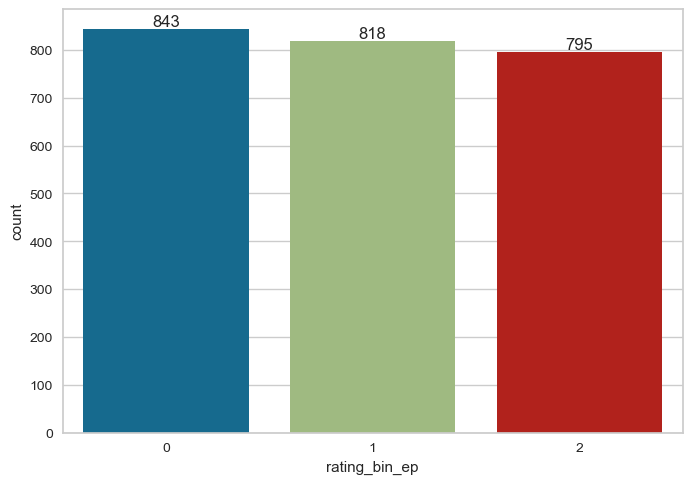

In [93]:
cnt_plt = sns.countplot(y)
cnt_plt.bar_label(cnt_plt.containers[0])
plt.show()

#### Logistic Regression - Varied C Range, using 'newton-cg' solver and multi_class='multinomial'

C =  0.001
Train accuracy score: 0.4581976112920738
Test accuracy score: 0.4185667752442997
Mean Squared Error:  1.1921824104234529
C =  0.1
Train accuracy score: 0.5206297502714441
Test accuracy score: 0.4804560260586319
Mean Squared Error:  0.9543973941368078
C =  1
Train accuracy score: 0.5515743756786102
Test accuracy score: 0.5146579804560261
Mean Squared Error:  0.8664495114006515
C =  10
Train accuracy score: 0.5629750271444083
Test accuracy score: 0.503257328990228
Mean Squared Error:  0.9071661237785016
C =  100
Train accuracy score: 0.5678610206297503
Test accuracy score: 0.501628664495114
Mean Squared Error:  0.9087947882736156
C =  1000
Train accuracy score: 0.5678610206297503
Test accuracy score: 0.501628664495114
Mean Squared Error:  0.9087947882736156


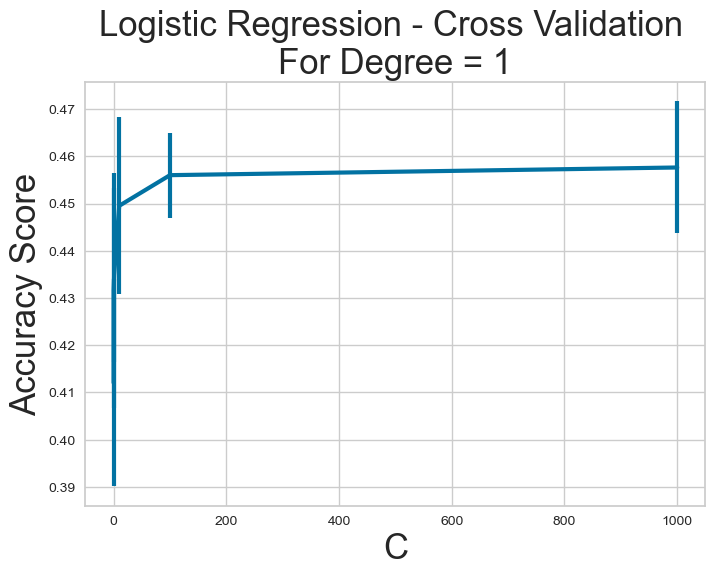

In [94]:
c_range = [0.001, 0.1, 1, 10, 100, 1000]
mean_error = []
std_error = []
for c in sorted(c_range):
    logit = LogisticRegression(C=c, random_state=0, solver='newton-cg',multi_class='multinomial')
    logit.fit(X_train, y_train)
    y_pred = logit.predict(X_test)
    print("C = ",c)
    print('Train accuracy score:',logit.score(X_train, y_train))
    print('Test accuracy score:',logit.score(X_test, y_test))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    scores = cross_val_score(logit, X_test, y_test, cv=5, scoring='accuracy')
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())
plt.errorbar(c_range, mean_error, yerr = std_error, linewidth=3)
plt.xlabel('C', fontsize=25)
plt.ylabel('Accuracy Score', fontsize=25)
title_cv = "Logistic Regression - Cross Validation \nFor Degree = 1"
plt.title(title_cv, fontsize=25)
plt.show()

#### Feature Importance

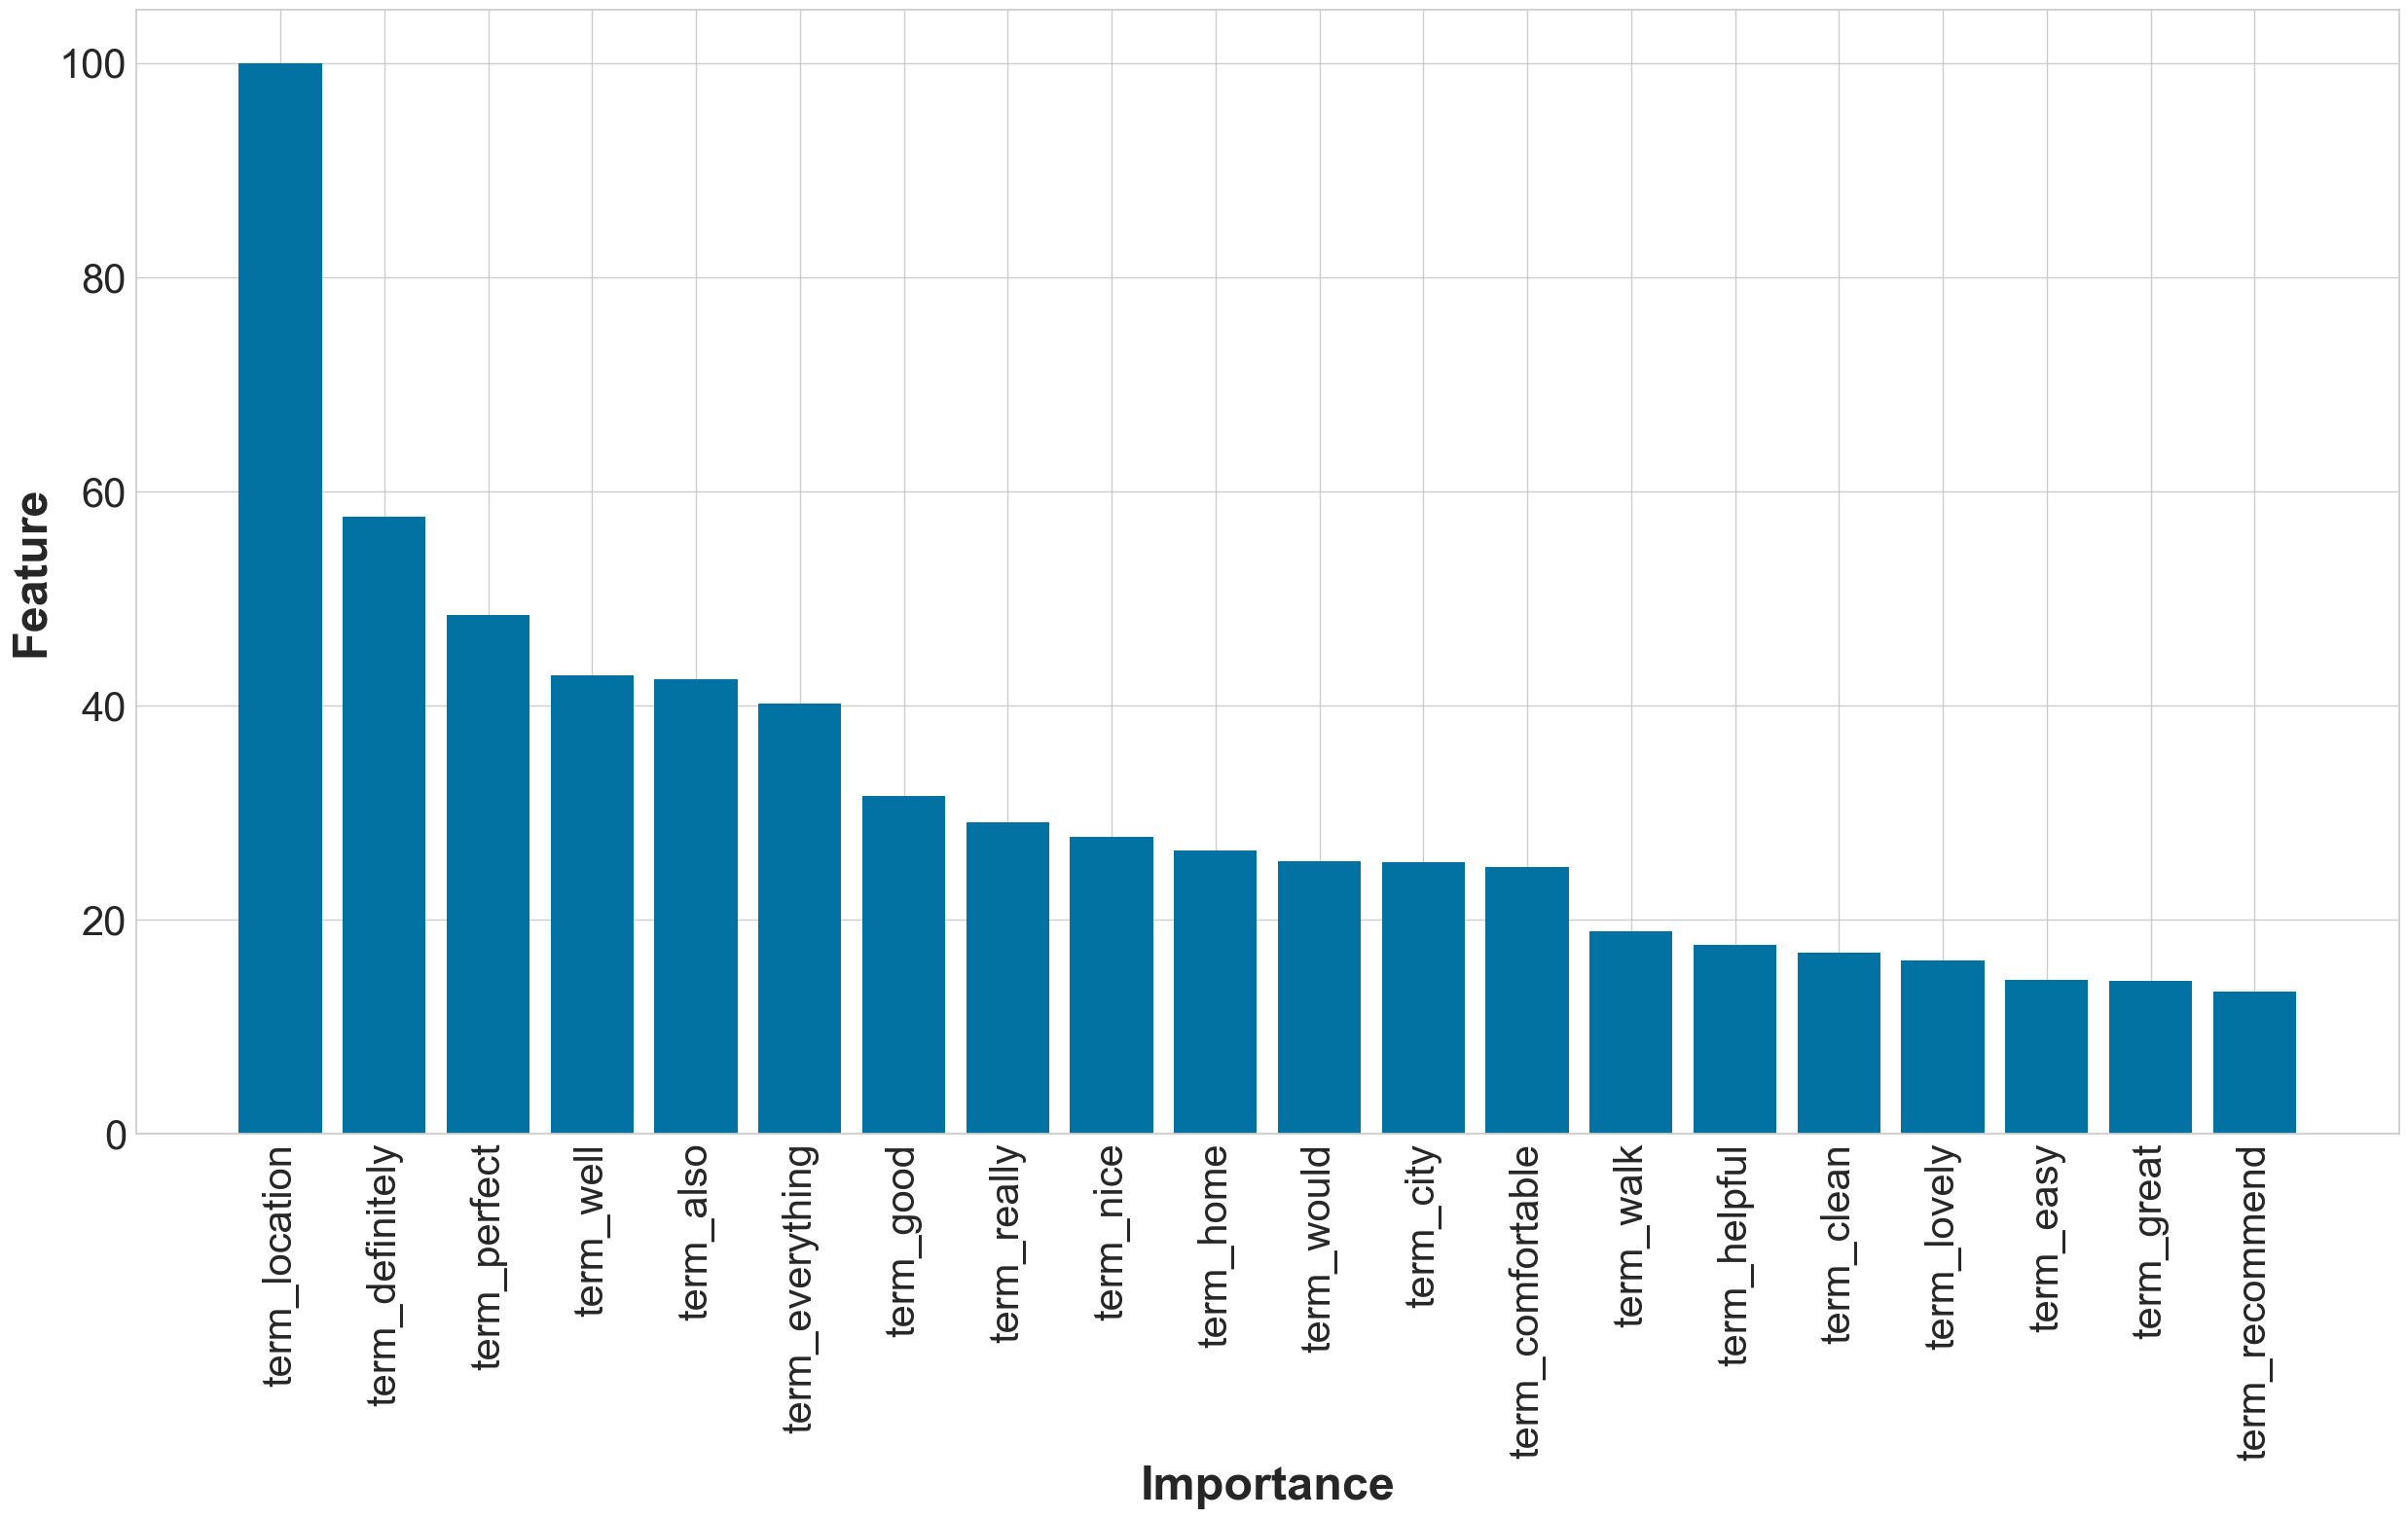

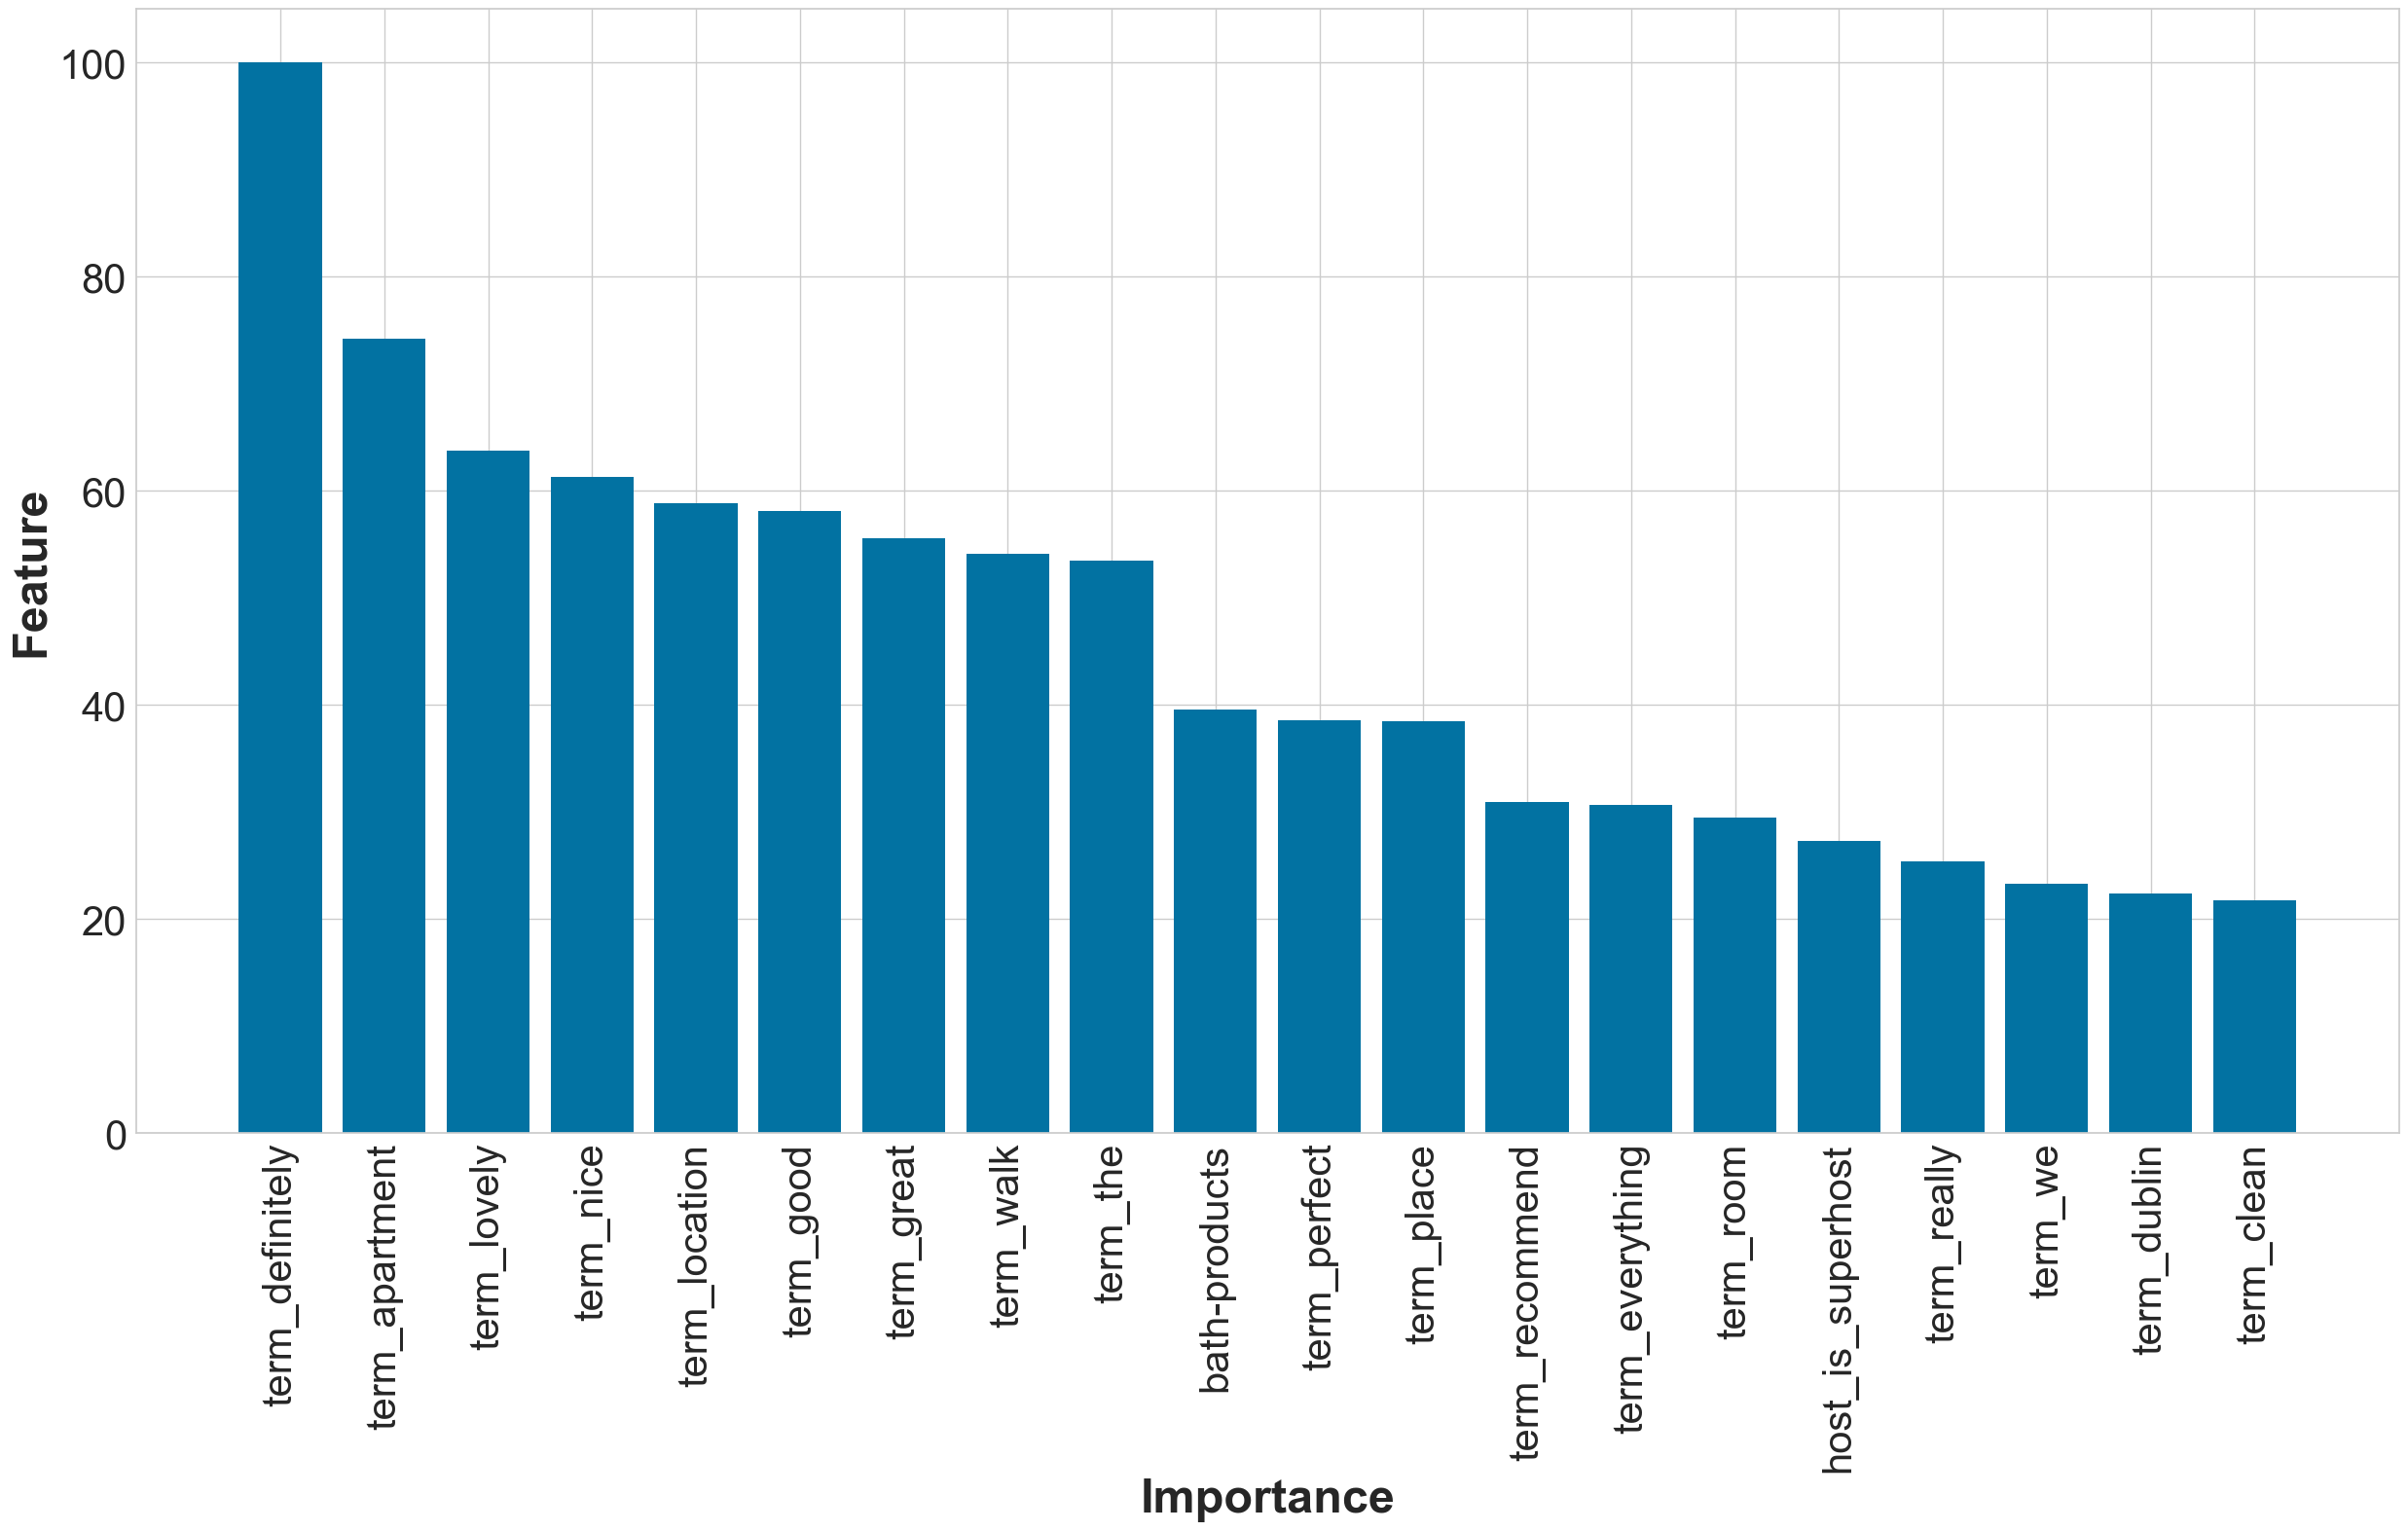

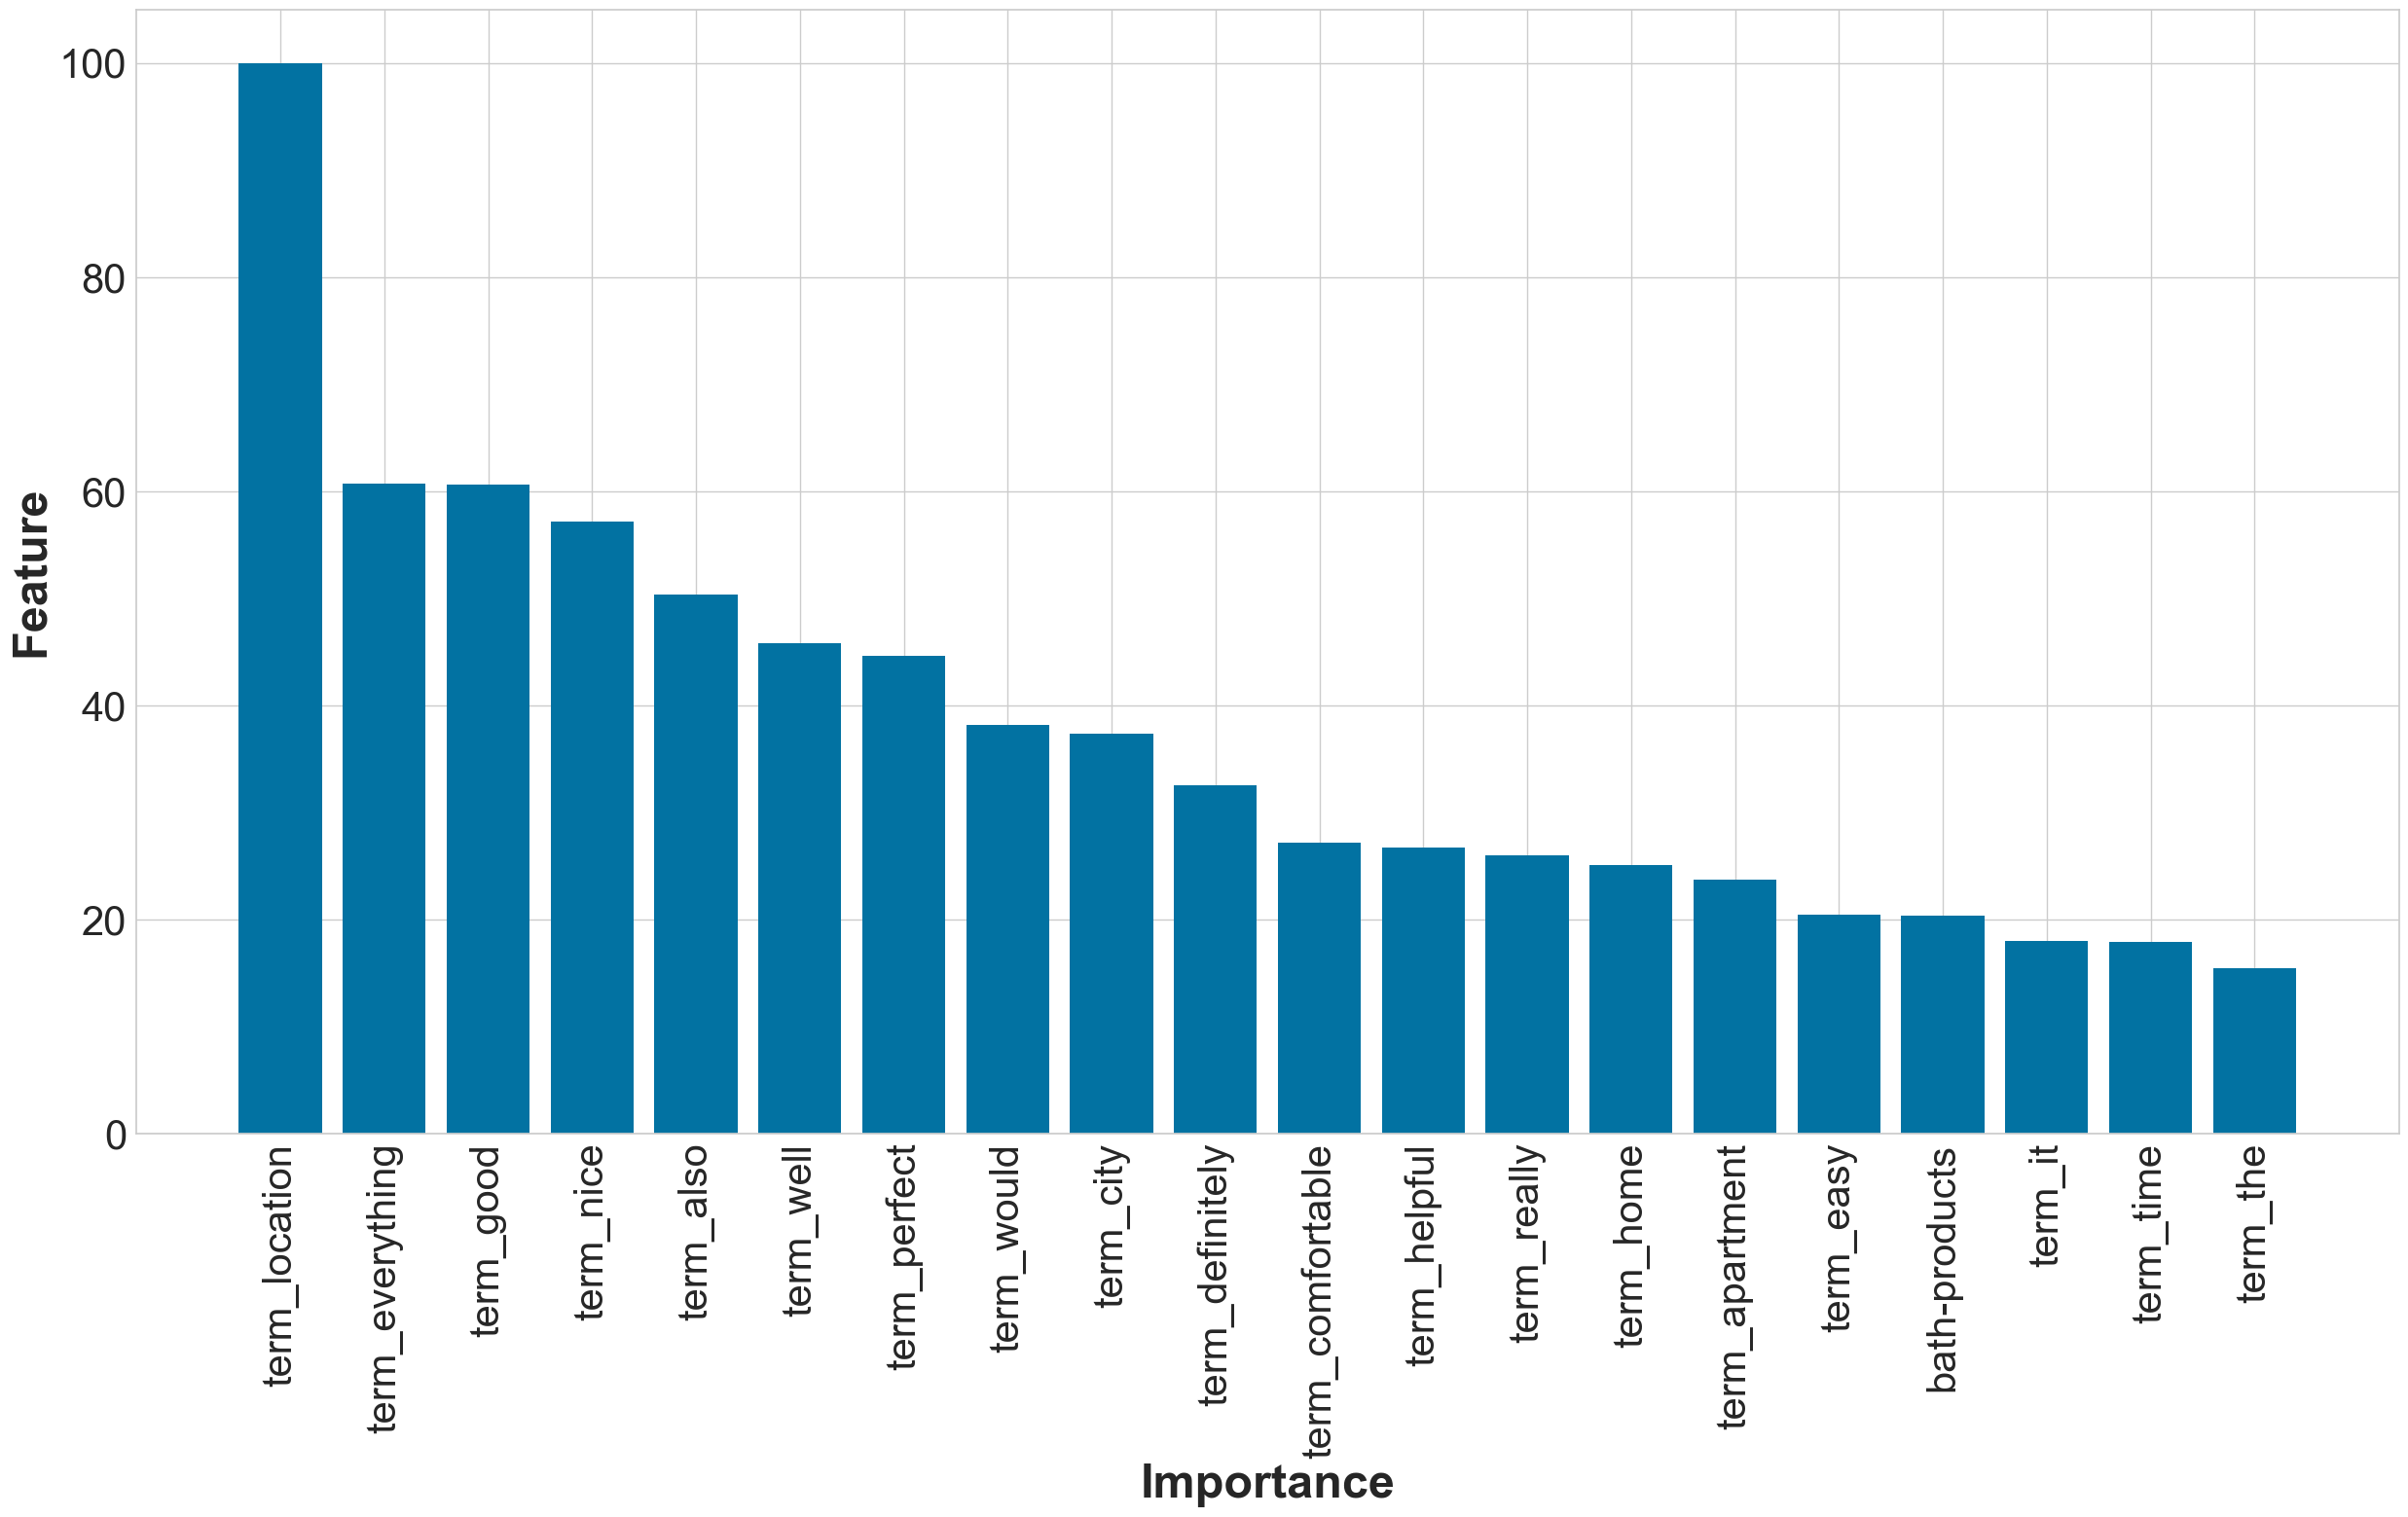

In [95]:
cols = X.columns
cols = np.asarray(cols)

plt.figure(figsize=(30,15))
feature_importance = abs(logit.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
top_features = pd.DataFrame({'feature_imp': feature_importance, 
                             'features': cols}, columns=['feature_imp', 'features'])
top_features = top_features.sort_values(by='feature_imp', ascending=False).head(20)
plt.bar(top_features.features, top_features.feature_imp)
plt.xlabel('Importance', fontsize=35, fontweight='bold')
plt.ylabel('Feature', fontsize=35, fontweight='bold')
plt.xticks(fontsize=30, rotation = 90)
plt.yticks(fontsize=30)
plt.show()

plt.figure(figsize=(30,15))
feature_importance = abs(logit.coef_[1])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
top_features = pd.DataFrame({'feature_imp': feature_importance, 
                             'features': cols}, columns=['feature_imp', 'features'])
top_features = top_features.sort_values(by='feature_imp', ascending=False).head(20)
plt.bar(top_features.features, top_features.feature_imp)
plt.xlabel('Importance', fontsize=35, fontweight='bold')
plt.ylabel('Feature', fontsize=35, fontweight='bold')
plt.xticks(fontsize=30, rotation = 90)
plt.yticks(fontsize=30)
plt.show()

plt.figure(figsize=(30,15))
feature_importance = abs(logit.coef_[2])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
top_features = pd.DataFrame({'feature_imp': feature_importance, 
                             'features': cols}, columns=['feature_imp', 'features'])
top_features = top_features.sort_values(by='feature_imp', ascending=False).head(20)
plt.bar(top_features.features, top_features.feature_imp)
plt.xlabel('Importance', fontsize=35, fontweight='bold')
plt.ylabel('Feature', fontsize=35, fontweight='bold')
plt.xticks(fontsize=30, rotation = 90)
plt.yticks(fontsize=30)
plt.show()

#### ROC-AUC Curve for all three categories

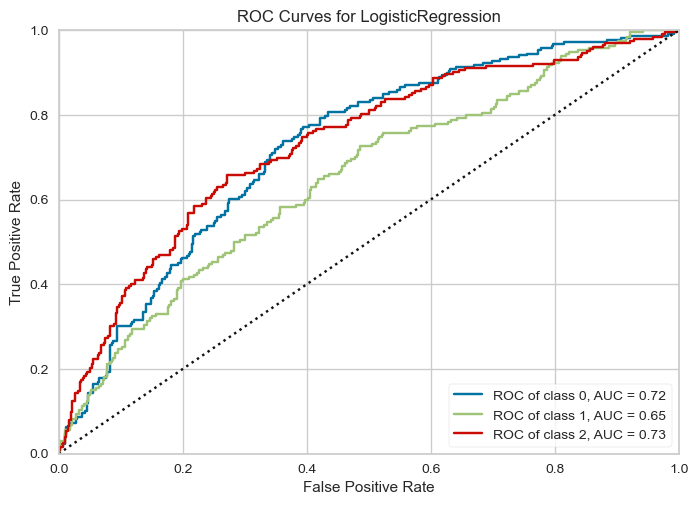

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [96]:
visualizer = ROCAUC(logit, classes=["0", "1", "2"], macro=False, micro=False)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)        
visualizer.show() 

#### Polynomial Degree and Error Plots

 Logistic Regression
 For Degree =  2
 For C =  0.001
 Confusion Matrix - 
 [[82 42 49]
 [56 74 47]
 [26 31 85]]
 Train accuracy score:  0.645112016293279
 Test accuracy score:  0.4898373983739837
 F1 Score =  0.6016260162601627
 Classification Report
               precision    recall  f1-score   support

           0       0.50      0.47      0.49       173
           1       0.50      0.42      0.46       177
           2       0.47      0.60      0.53       142

    accuracy                           0.49       492
   macro avg       0.49      0.50      0.49       492
weighted avg       0.49      0.49      0.49       492



 Logistic Regression
 For Degree =  2
 For C =  0.1
 Confusion Matrix - 
 [[84 42 47]
 [56 74 47]
 [27 32 83]]
 Train accuracy score:  0.6446028513238289
 Test accuracy score:  0.4898373983739837
 F1 Score =  0.6016260162601627
 Classification Report
               precision    recall  f1-score   support

           0       0.50      0.49      0.49       173
   

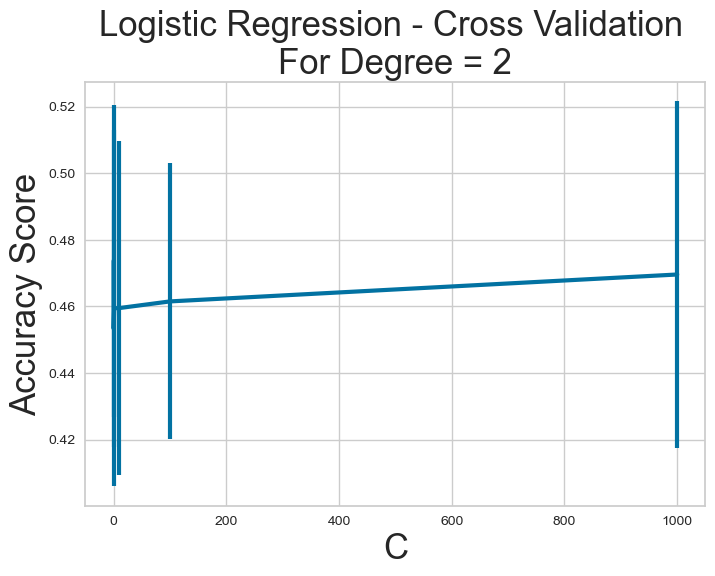

In [97]:
c_range = [0.001, 0.1, 1, 10, 100, 1000]
degree_range = [2]

for i in degree_range:
    trans = PolynomialFeatures(degree = i)
    x_poly = trans.fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state=(1))
    mean_error = []
    std_error = []
    for c in c_range:
        log_reg = LogisticRegression(C = c, random_state=0, solver='newton-cg',multi_class='multinomial')
        log_reg.fit(x_train, y_train)
        y_pred = log_reg.predict(x_test)
        
        cnf_mtx = metrics.confusion_matrix(y_test, y_pred)
        f1_score = (2*cnf_mtx[1][1])/((2*cnf_mtx[1][1]) + cnf_mtx[0][1] + cnf_mtx[1][0])
        
        scores = cross_val_score(log_reg, x_test, y_test, cv=5, scoring='accuracy')
        mean_error.append(np.array(scores).mean())
        std_error.append(np.array(scores).std())
        
        
        print(" Logistic Regression")
        print(" For Degree = ", i)
        print(" For C = ", c)
        print(" Confusion Matrix - \n", cnf_mtx)
        print(' Train accuracy score: ', log_reg.score(x_train, y_train))
        print(' Test accuracy score: ', log_reg.score(x_test, y_test))
        print(" F1 Score = ", f1_score)
        print(" Classification Report\n", classification_report(y_test, y_pred))
        print("\n")
    
    plt.errorbar(c_range, mean_error, yerr = std_error, linewidth=3)
    plt.xlabel('C', fontsize=25)
    plt.ylabel('Accuracy Score', fontsize=25)
    title_cv = f"Logistic Regression - Cross Validation \nFor Degree = {i}"
    plt.title(title_cv, fontsize=25)
    plt.show()

#### k-NN Classifier

NN =  1
Train accuracy score: 1.0
Test accuracy score: 0.42073170731707316
NN =  3
Train accuracy score: 0.6654786150712831
Test accuracy score: 0.4329268292682927
NN =  5
Train accuracy score: 0.6109979633401222
Test accuracy score: 0.42276422764227645
NN =  7
Train accuracy score: 0.5580448065173116
Test accuracy score: 0.42886178861788615
NN =  9
Train accuracy score: 0.5483706720977597
Test accuracy score: 0.43902439024390244
NN =  11
Train accuracy score: 0.5524439918533605
Test accuracy score: 0.45528455284552843
NN =  13
Train accuracy score: 0.5346232179226069
Test accuracy score: 0.45121951219512196
NN =  15
Train accuracy score: 0.5168024439918534
Test accuracy score: 0.4451219512195122
NN =  17
Train accuracy score: 0.5147657841140529
Test accuracy score: 0.4491869918699187
NN =  19
Train accuracy score: 0.5020366598778004
Test accuracy score: 0.4369918699186992


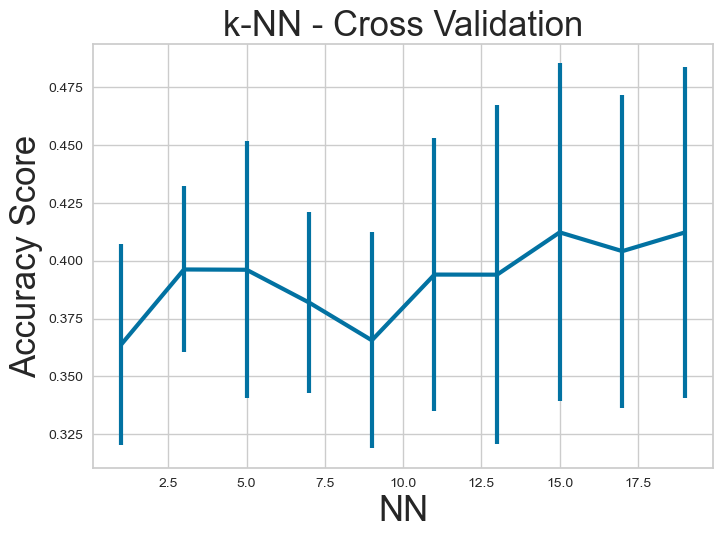

In [98]:
nn_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
x_train_nn, x_test_nn, y_train_nn, y_test_nn = train_test_split(X, y, test_size = 0.2, random_state=(1))
merr = []
serr = []

for nn in nn_range:
    knn_model = KNeighborsClassifier(n_neighbors=nn, weights='uniform')
    knn_model.fit(x_train_nn, y_train_nn)
    y_pred_nn = knn_model.predict(x_test_nn)
    print("NN = ", nn)
    print('Train accuracy score:',knn_model.score(x_train_nn, y_train_nn))
    print('Test accuracy score:',knn_model.score(x_test_nn, y_test_nn))
    
    scores_knn = cross_val_score(knn_model, x_test_nn, y_test_nn, cv=5, scoring='accuracy')
    merr.append(np.array(scores_knn).mean())
    serr.append(np.array(scores_knn).std())

plt.errorbar(nn_range, merr, yerr = serr, linewidth=3)
plt.xlabel('NN', fontsize=25)
plt.ylabel('Accuracy Score', fontsize=25)
title_cv = f"k-NN - Cross Validation"
plt.title(title_cv, fontsize=25)
plt.show()

#### ROC-AUC Curve

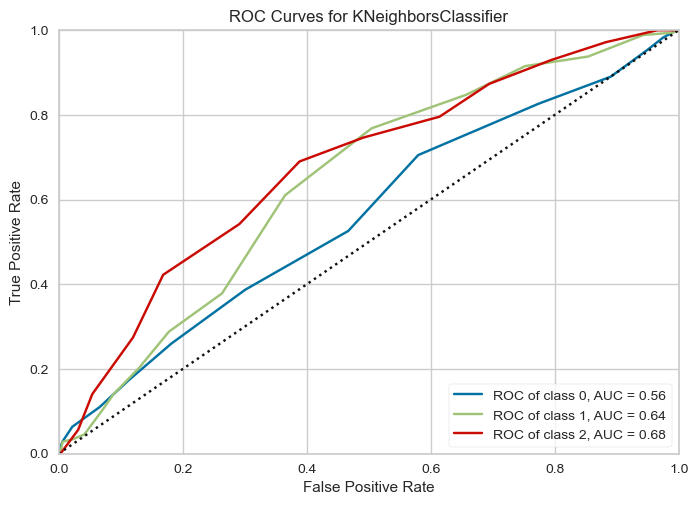

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [99]:
visualizer = ROCAUC(knn_model, classes=["0", "1", "2"], macro=False, micro=False)

visualizer.fit(x_train_nn, y_train_nn)
visualizer.score(x_test_nn, y_test_nn)        
visualizer.show() 

## Review Scores Rating
### Logistic Regression
#### Defining the Input and Target Variables

In [100]:
X = listings[
                ['host_response_time', 'host_response_rate', 'host_acceptance_rate',
                 'bedrooms', 'beds','neighbourhood_cleansed',
                 'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
                 'host_identity_verified', 'room_type',
                 'accommodates','price', 'minimum_nights', 'maximum_nights',
                 'bath-products','electric-system',
                 'food-services','house-furniture','house-rules',
                 'kitchen-appliances','parking','recreation','safety',
                 'host_email','host_work_email'] + list(reviews.columns[2:])
]

In [101]:
y = listings[['review_scores_rating']]
y = (y/y.max())*100

y = y.assign(
    rating_bin_ep = pd.qcut(
        y['review_scores_rating'],
        q=3,
        duplicates='drop',
        labels=[0,1,2]
    )
)

#### Min Max of Each Bin

In [102]:
y.groupby('rating_bin_ep').min()

review_scores_rating
rating_bin_ep                      
0                              20.0
1                              94.8
2                              98.8

In [103]:
y.groupby('rating_bin_ep').max()

review_scores_rating
rating_bin_ep                      
0                              94.6
1                              98.6
2                             100.0

#### Splitting Data in 75-25 Ratio

In [104]:
y = y['rating_bin_ep']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### Number of Records in Each Bin

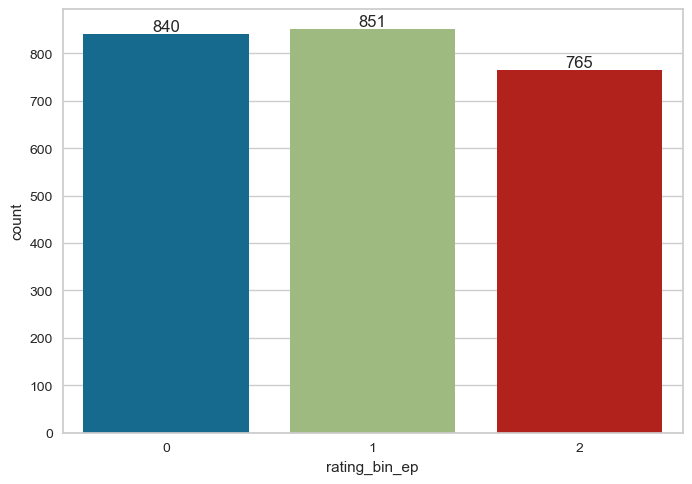

In [105]:
cnt_plt = sns.countplot(y)
cnt_plt.bar_label(cnt_plt.containers[0])
plt.show()

#### Logistic Regression - Varied C Range, using 'newton-cg' solver and multi_class='multinomial'

C =  0.001
Train accuracy score: 0.5211726384364821
Test accuracy score: 0.4527687296416938
Mean Squared Error:  1.1091205211726385
C =  0.1
Train accuracy score: 0.5792616720955484
Test accuracy score: 0.5390879478827362
Mean Squared Error:  0.8566775244299675
C =  1
Train accuracy score: 0.6036916395222585
Test accuracy score: 0.5749185667752443
Mean Squared Error:  0.752442996742671
C =  10
Train accuracy score: 0.6221498371335505
Test accuracy score: 0.5732899022801303
Mean Squared Error:  0.758957654723127
C =  100
Train accuracy score: 0.6210640608034745
Test accuracy score: 0.5667752442996743
Mean Squared Error:  0.7654723127035831
C =  1000
Train accuracy score: 0.6216069489685125
Test accuracy score: 0.5667752442996743
Mean Squared Error:  0.7654723127035831


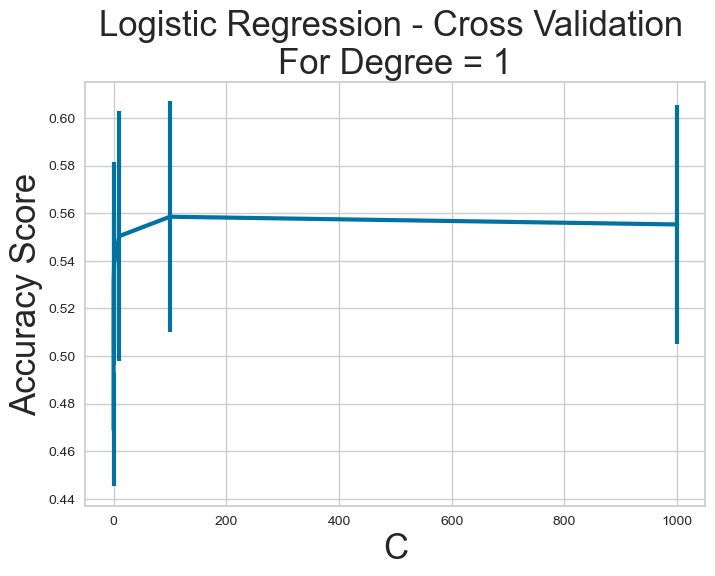

In [106]:
c_range = [0.001, 0.1, 1, 10, 100, 1000]
mean_error = []
std_error = []
for c in sorted(c_range):
    logit = LogisticRegression(C=c, random_state=0, solver='newton-cg',multi_class='multinomial')
    logit.fit(X_train, y_train)
    y_pred = logit.predict(X_test)
    print("C = ",c)
    print('Train accuracy score:',logit.score(X_train, y_train))
    print('Test accuracy score:',logit.score(X_test, y_test))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    scores = cross_val_score(logit, X_test, y_test, cv=5, scoring='accuracy')
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())
plt.errorbar(c_range, mean_error, yerr = std_error, linewidth=3)
plt.xlabel('C', fontsize=25)
plt.ylabel('Accuracy Score', fontsize=25)
title_cv = "Logistic Regression - Cross Validation \nFor Degree = 1"
plt.title(title_cv, fontsize=25)
plt.show()

#### Feature Importance

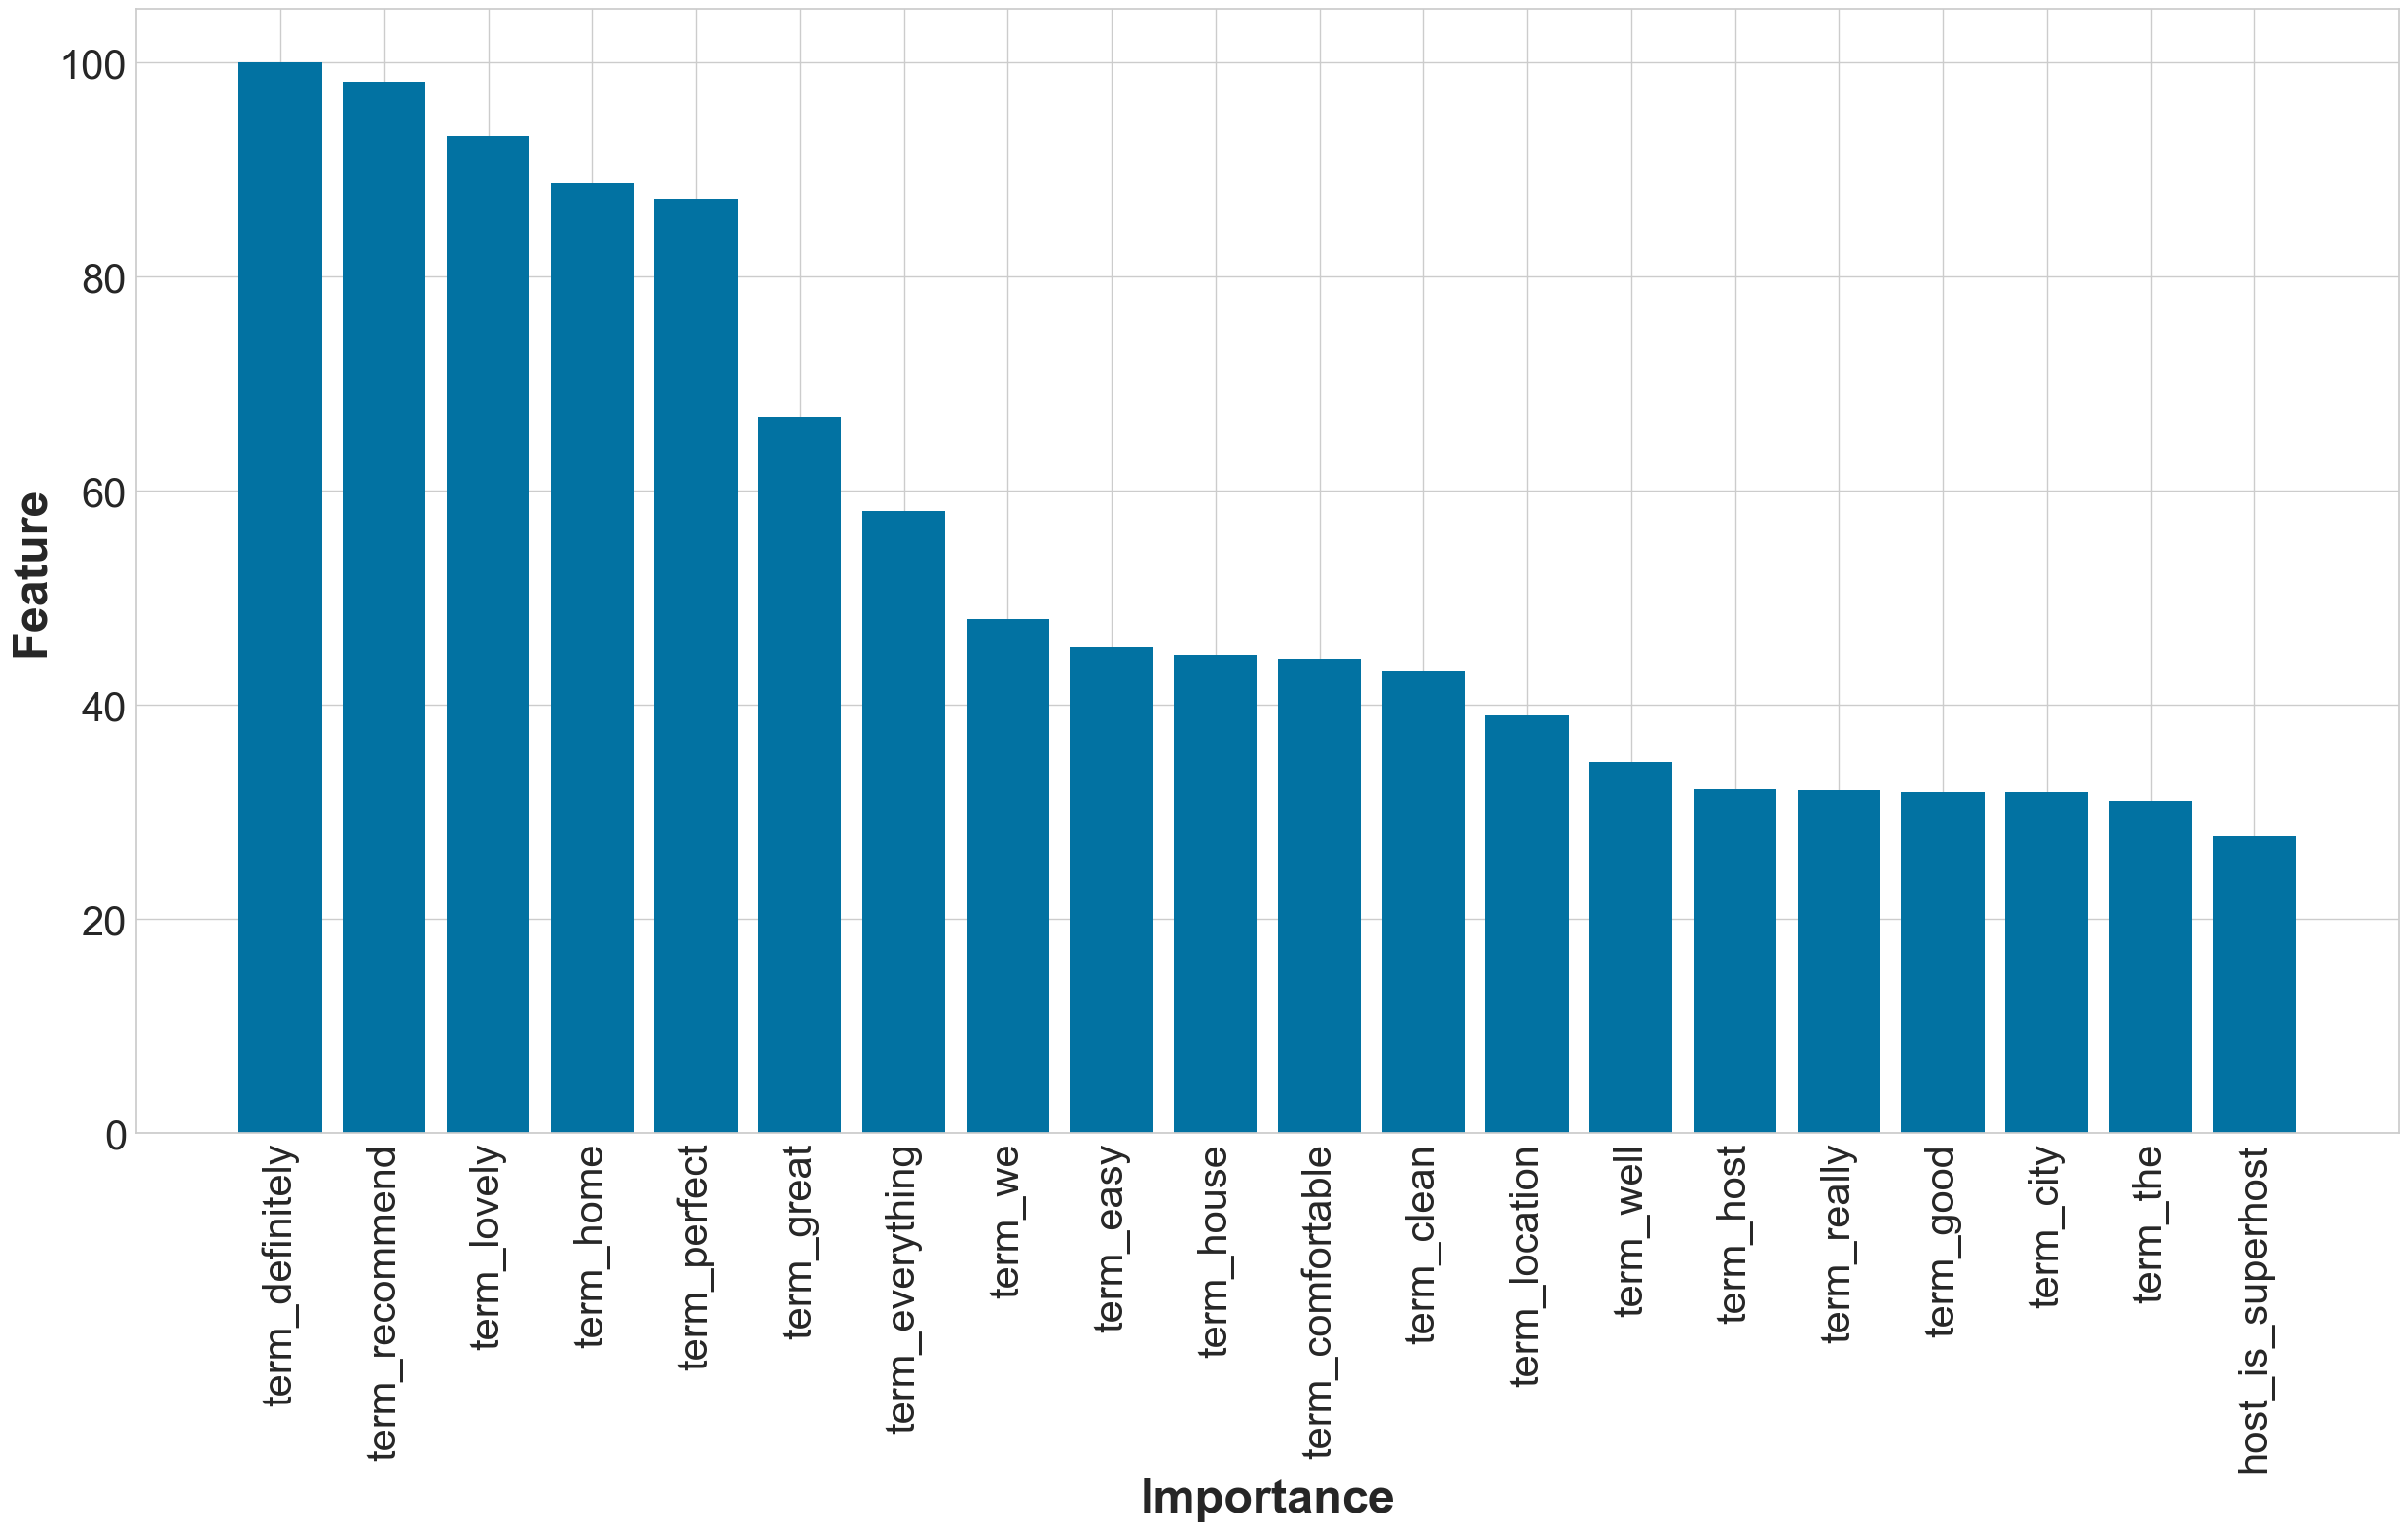

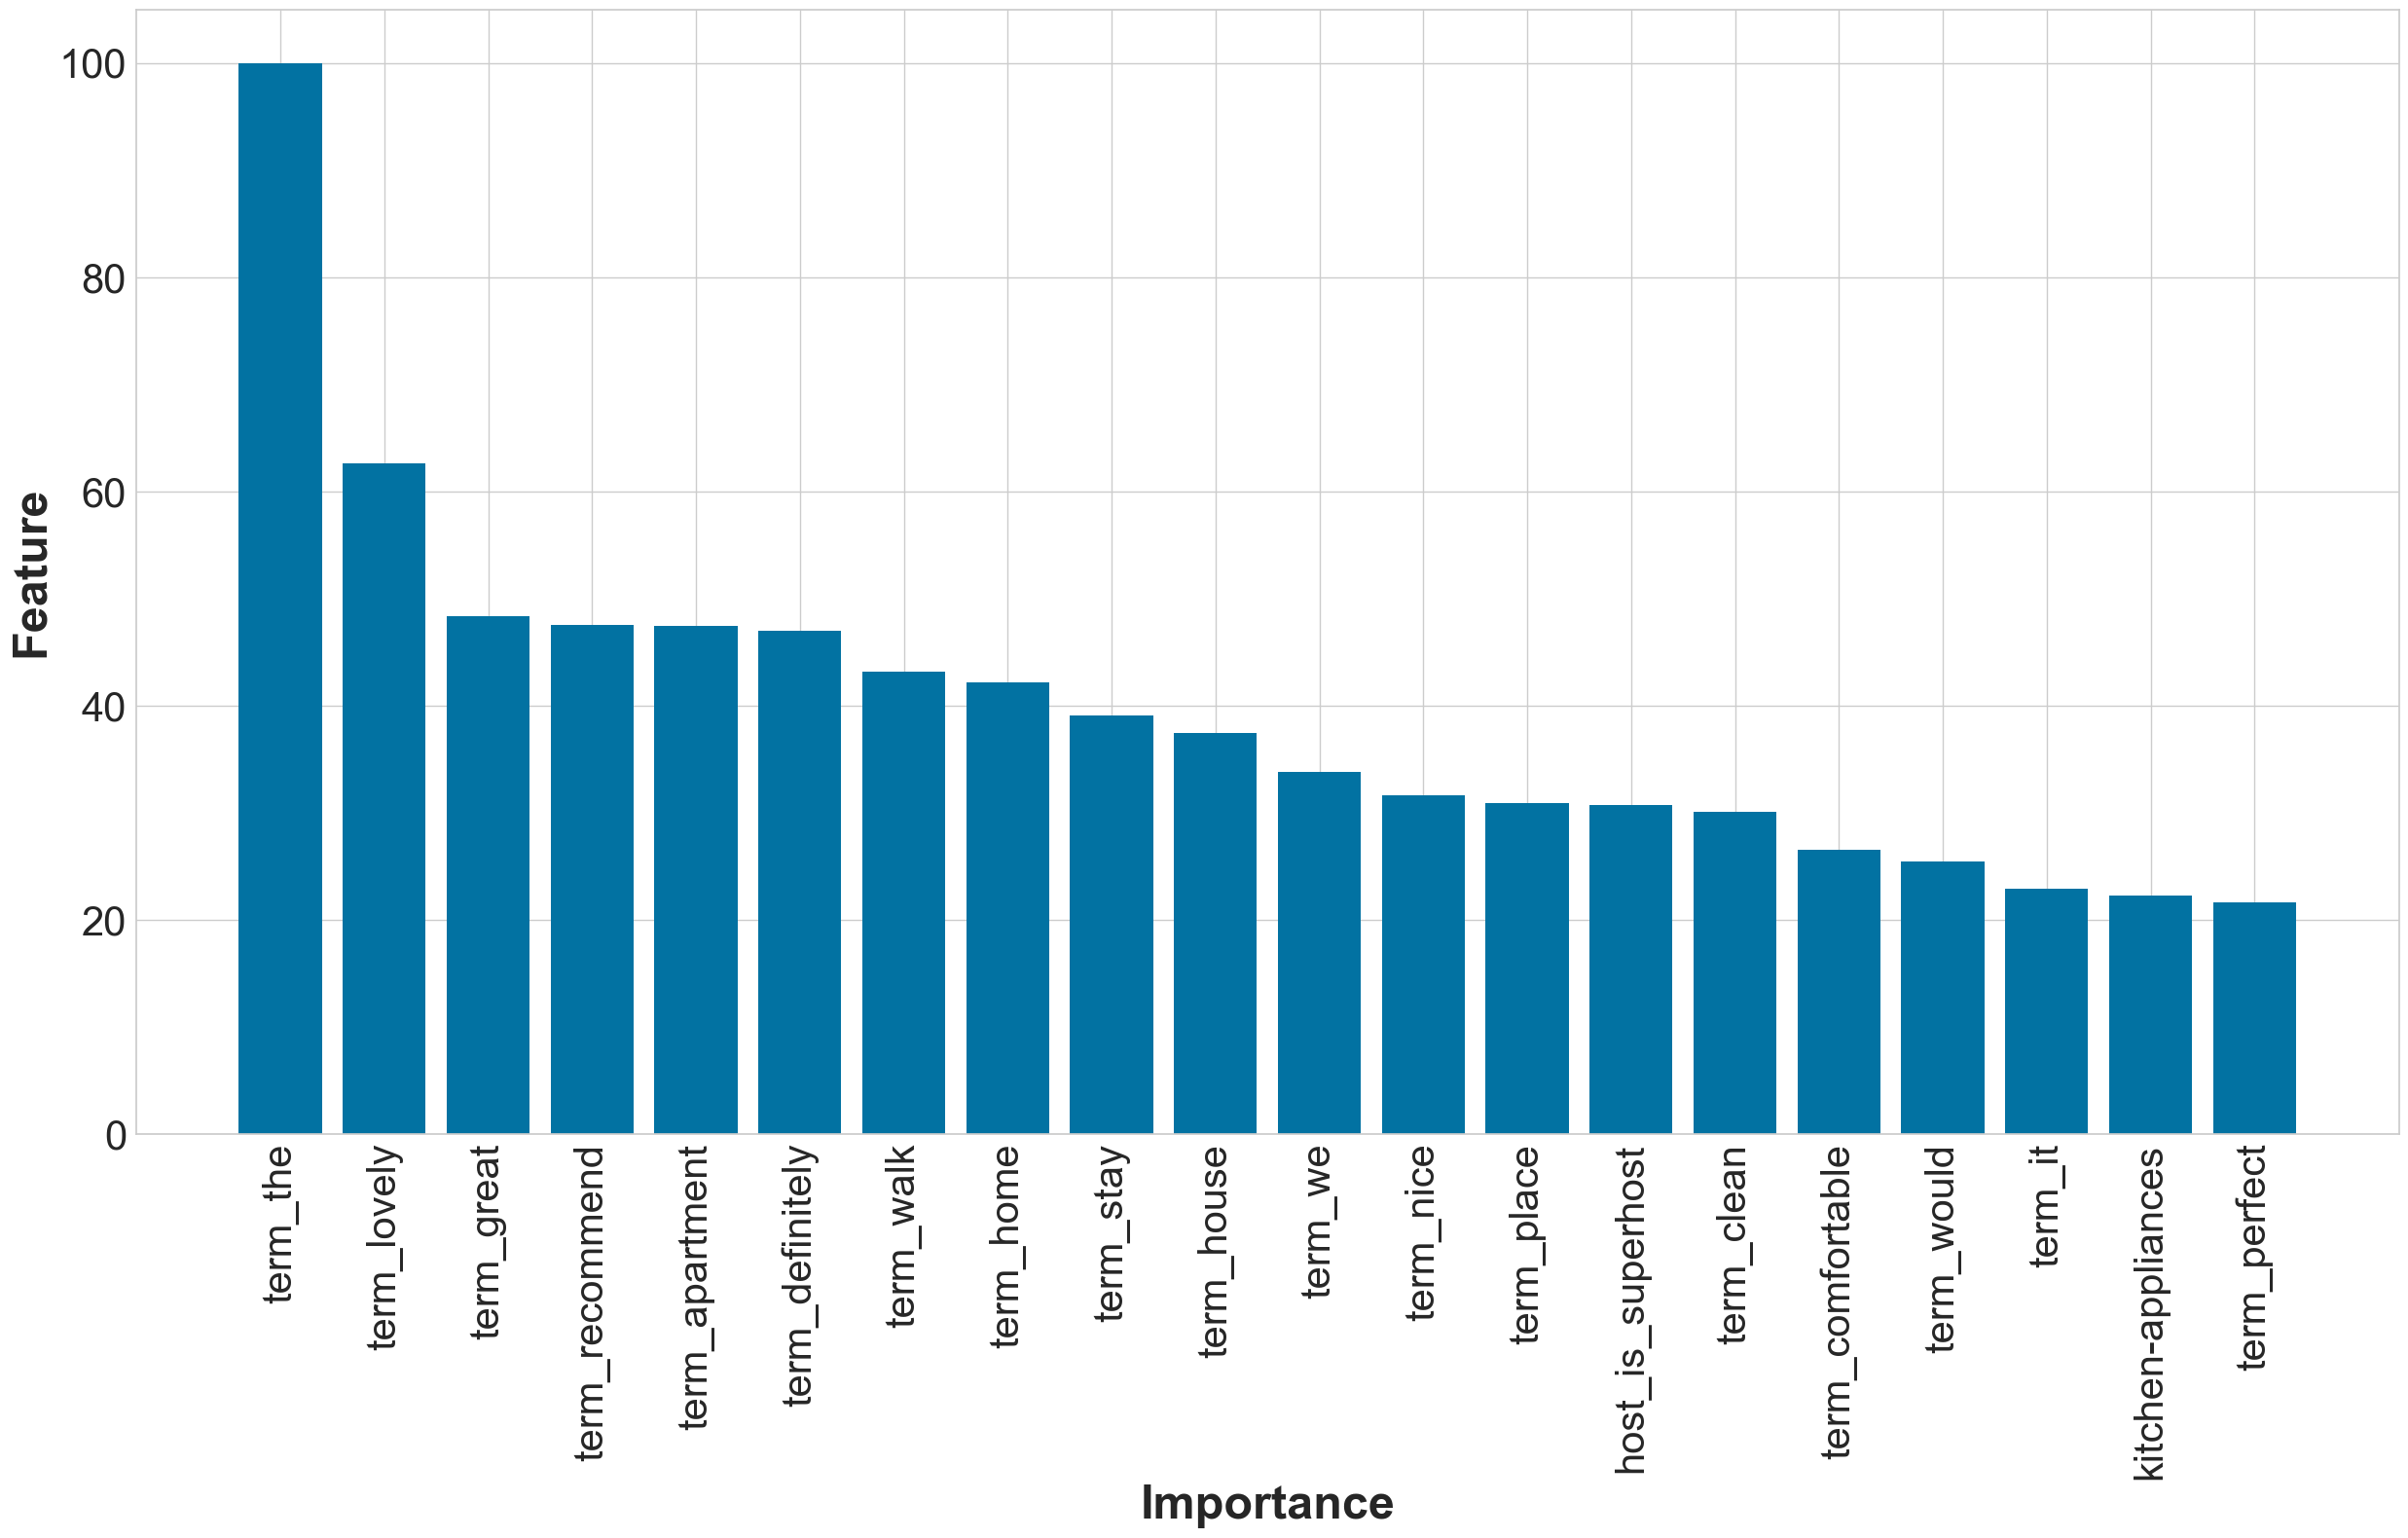

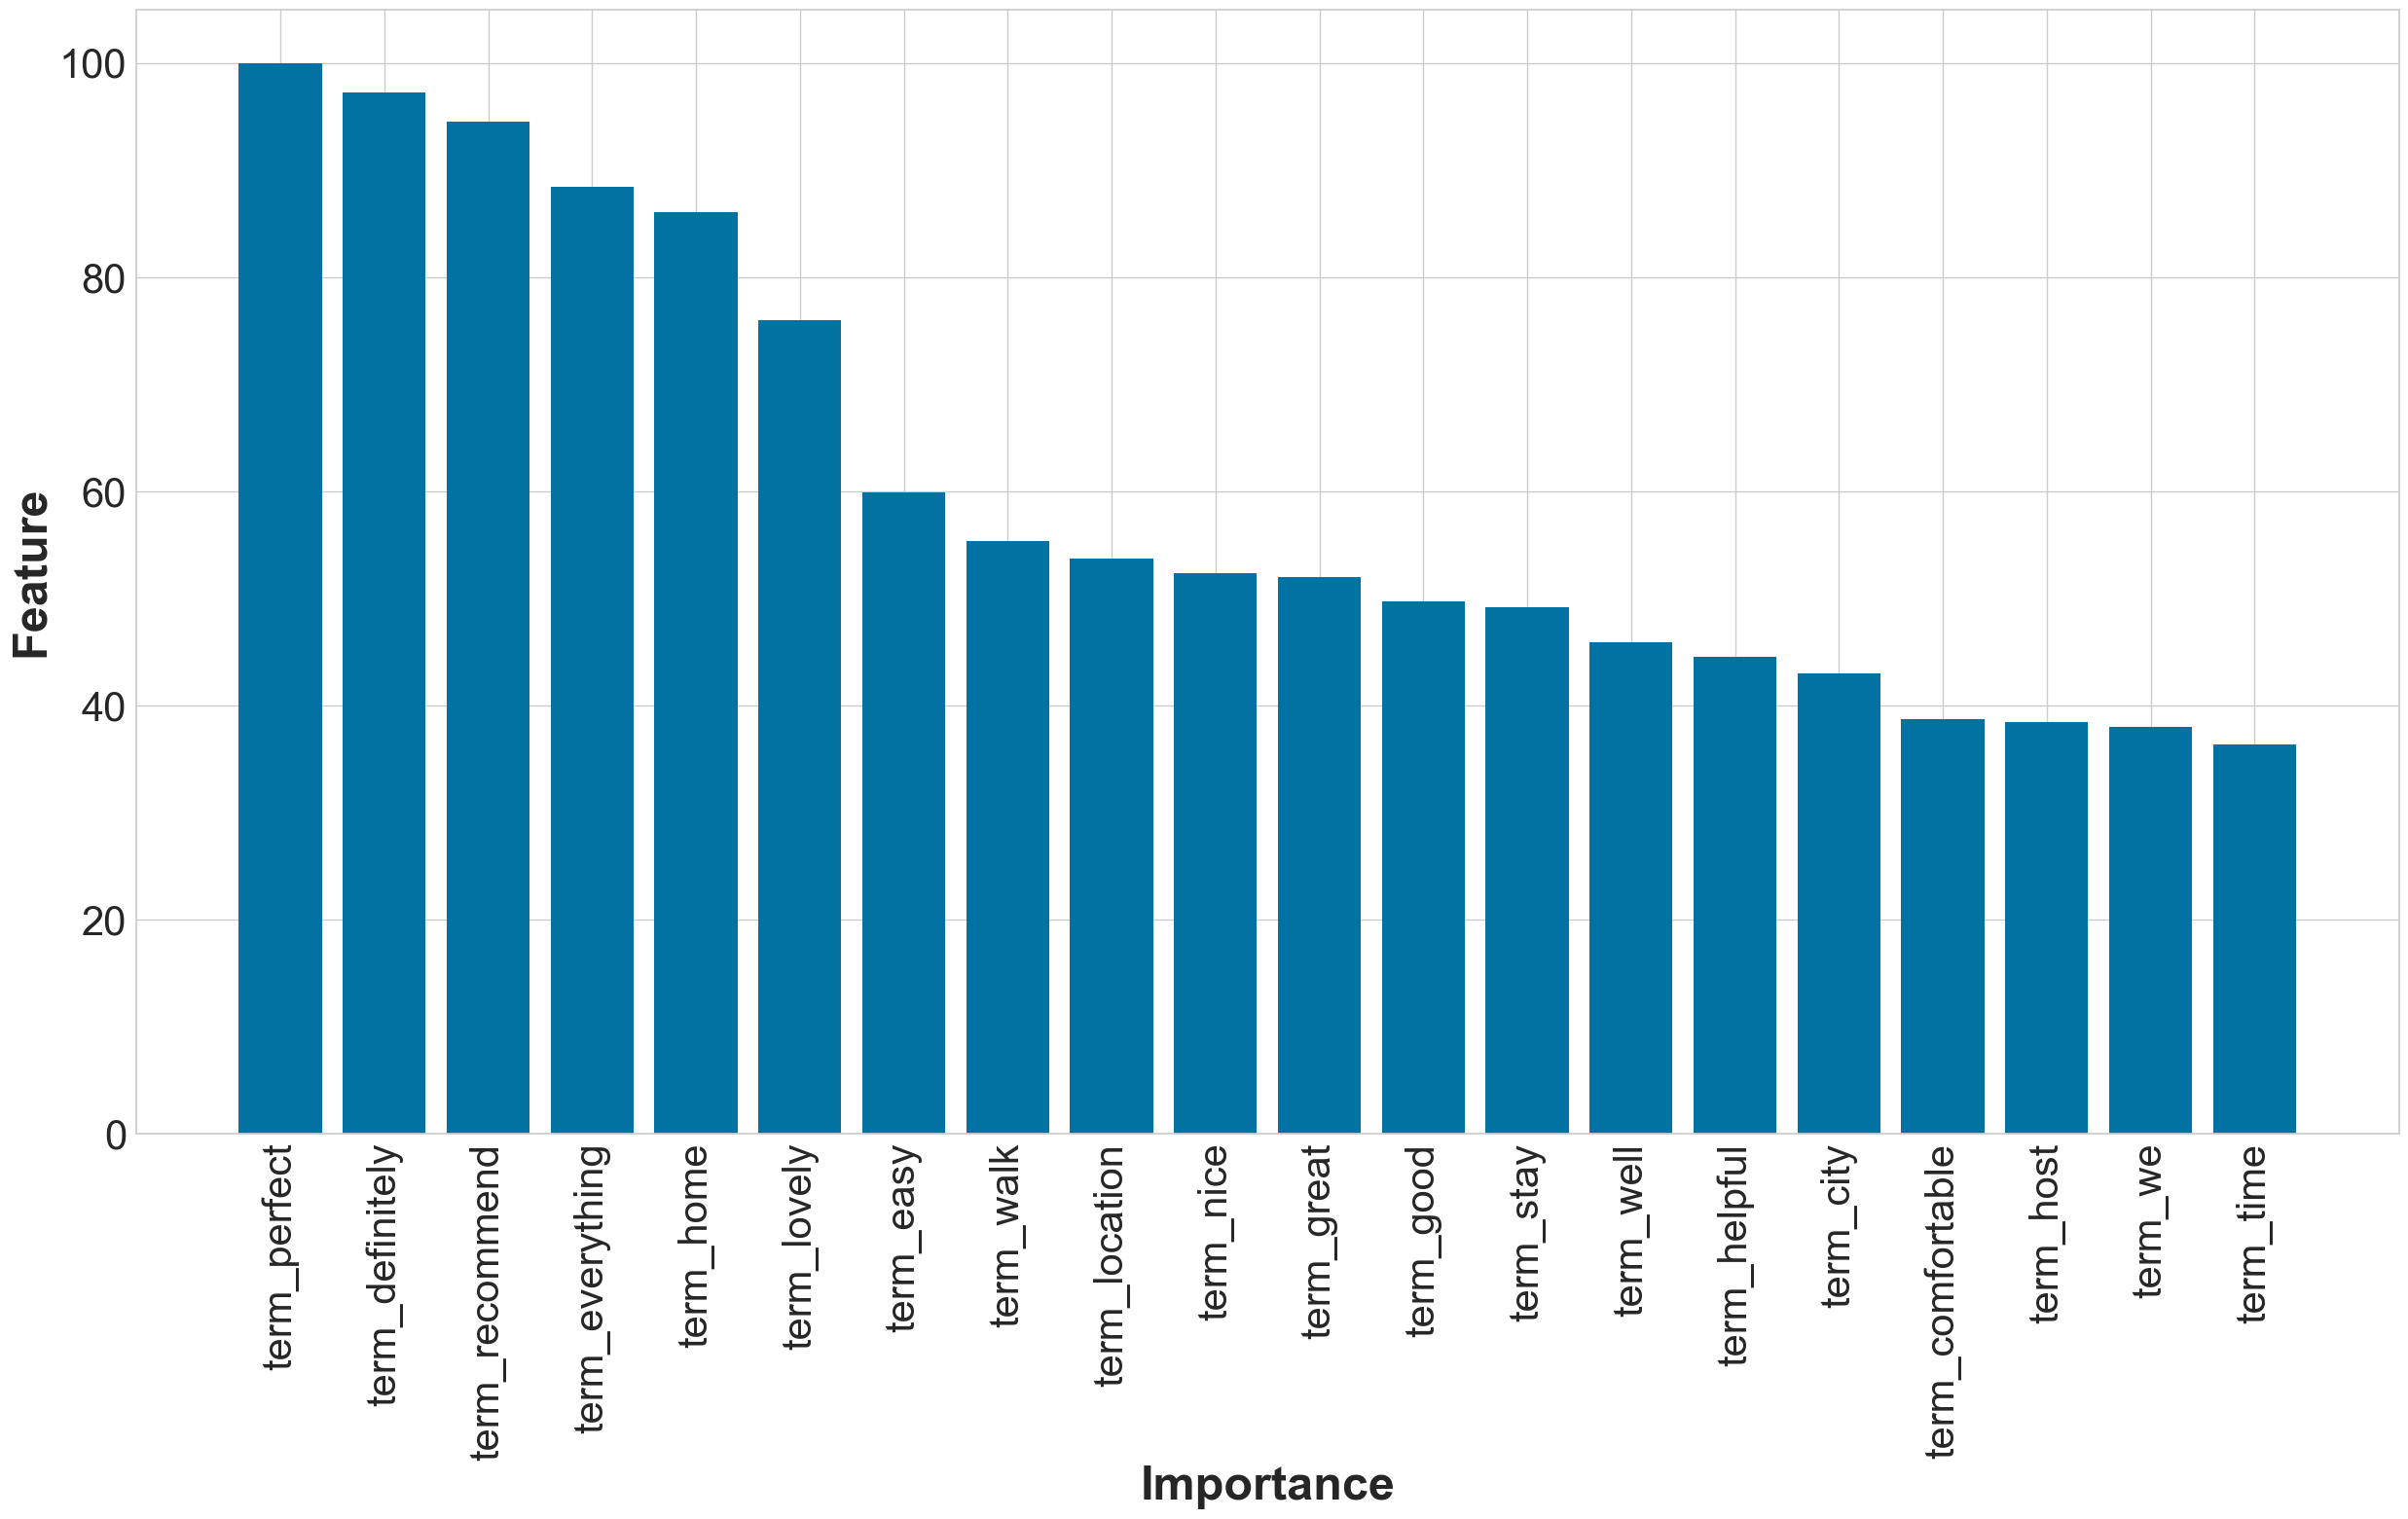

In [107]:
cols = X.columns
cols = np.asarray(cols)

plt.figure(figsize=(30,15))
feature_importance = abs(logit.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
top_features = pd.DataFrame({'feature_imp': feature_importance, 
                             'features': cols}, columns=['feature_imp', 'features'])
top_features = top_features.sort_values(by='feature_imp', ascending=False).head(20)
plt.bar(top_features.features, top_features.feature_imp)
plt.xlabel('Importance', fontsize=35, fontweight='bold')
plt.ylabel('Feature', fontsize=35, fontweight='bold')
plt.xticks(fontsize=30, rotation = 90)
plt.yticks(fontsize=30)
plt.show()

plt.figure(figsize=(30,15))
feature_importance = abs(logit.coef_[1])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
top_features = pd.DataFrame({'feature_imp': feature_importance, 
                             'features': cols}, columns=['feature_imp', 'features'])
top_features = top_features.sort_values(by='feature_imp', ascending=False).head(20)
plt.bar(top_features.features, top_features.feature_imp)
plt.xlabel('Importance', fontsize=35, fontweight='bold')
plt.ylabel('Feature', fontsize=35, fontweight='bold')
plt.xticks(fontsize=30, rotation = 90)
plt.yticks(fontsize=30)
plt.show()

plt.figure(figsize=(30,15))
feature_importance = abs(logit.coef_[2])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
top_features = pd.DataFrame({'feature_imp': feature_importance, 
                             'features': cols}, columns=['feature_imp', 'features'])
top_features = top_features.sort_values(by='feature_imp', ascending=False).head(20)
plt.bar(top_features.features, top_features.feature_imp)
plt.xlabel('Importance', fontsize=35, fontweight='bold')
plt.ylabel('Feature', fontsize=35, fontweight='bold')
plt.xticks(fontsize=30, rotation = 90)
plt.yticks(fontsize=30)
plt.show()

#### ROC-AUC Curve for all three categories

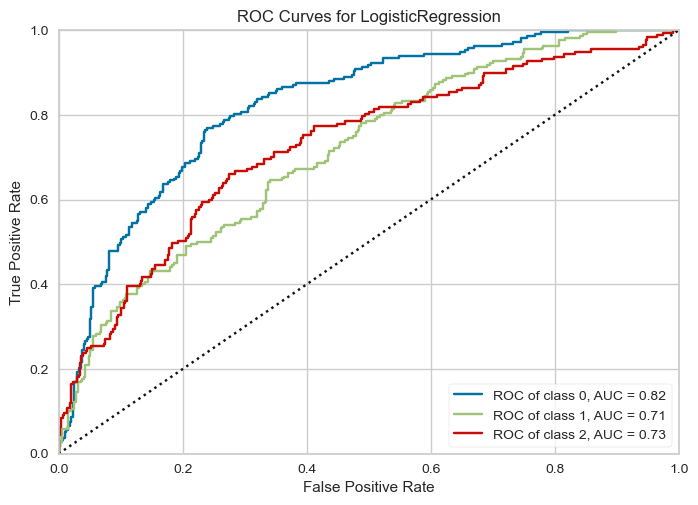

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [108]:
visualizer = ROCAUC(logit, classes=["0", "1", "2"], macro=False, micro=False)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)        
visualizer.show() 

#### Polynomial Degree and Error Plots

 Logistic Regression
 For Degree =  2
 For C =  0.001
 Confusion Matrix - 
 [[120  32  36]
 [ 41  77  44]
 [ 24  37  81]]
 Train accuracy score:  0.6868635437881874
 Test accuracy score:  0.5650406504065041
 F1 Score =  0.6784140969162996
 Classification Report
               precision    recall  f1-score   support

           0       0.65      0.64      0.64       188
           1       0.53      0.48      0.50       162
           2       0.50      0.57      0.53       142

    accuracy                           0.57       492
   macro avg       0.56      0.56      0.56       492
weighted avg       0.57      0.57      0.56       492



 Logistic Regression
 For Degree =  2
 For C =  0.1
 Confusion Matrix - 
 [[122  31  35]
 [ 40  75  47]
 [ 24  38  80]]
 Train accuracy score:  0.6904276985743381
 Test accuracy score:  0.5630081300813008
 F1 Score =  0.6787330316742082
 Classification Report
               precision    recall  f1-score   support

           0       0.66      0.65     

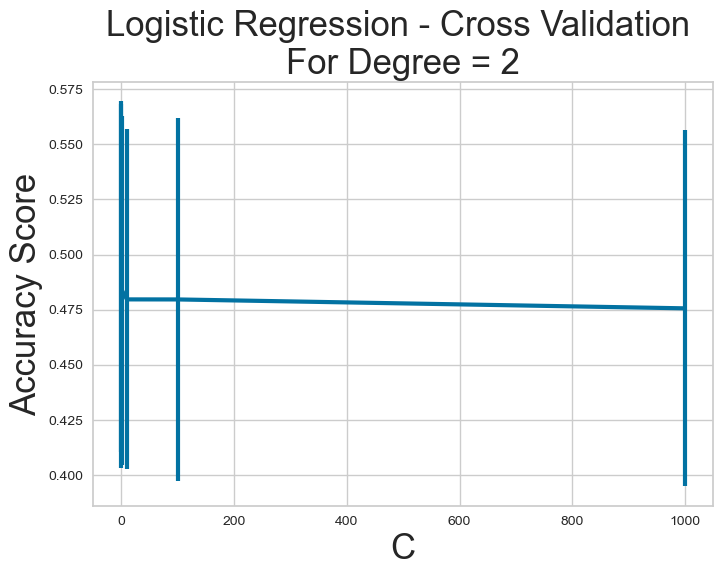

In [109]:
c_range = [0.001, 0.1, 1, 10, 100, 1000]
degree_range = [2]

for i in degree_range:
    trans = PolynomialFeatures(degree = i)
    x_poly = trans.fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state=(1))
    mean_error = []
    std_error = []
    for c in c_range:
        log_reg = LogisticRegression(C = c, random_state=0, solver='newton-cg',multi_class='multinomial')
        log_reg.fit(x_train, y_train)
        y_pred = log_reg.predict(x_test)
        
        cnf_mtx = metrics.confusion_matrix(y_test, y_pred)
        f1_score = (2*cnf_mtx[1][1])/((2*cnf_mtx[1][1]) + cnf_mtx[0][1] + cnf_mtx[1][0])
        
        scores = cross_val_score(log_reg, x_test, y_test, cv=5, scoring='accuracy')
        mean_error.append(np.array(scores).mean())
        std_error.append(np.array(scores).std())
        
        
        print(" Logistic Regression")
        print(" For Degree = ", i)
        print(" For C = ", c)
        print(" Confusion Matrix - \n", cnf_mtx)
        print(' Train accuracy score: ', log_reg.score(x_train, y_train))
        print(' Test accuracy score: ', log_reg.score(x_test, y_test))
        print(" F1 Score = ", f1_score)
        print(" Classification Report\n", classification_report(y_test, y_pred))
        print("\n")
    
    plt.errorbar(c_range, mean_error, yerr = std_error, linewidth=3)
    plt.xlabel('C', fontsize=25)
    plt.ylabel('Accuracy Score', fontsize=25)
    title_cv = f"Logistic Regression - Cross Validation \nFor Degree = {i}"
    plt.title(title_cv, fontsize=25)
    plt.show()

#### k-NN Classifier

NN =  1
Train accuracy score: 1.0
Test accuracy score: 0.44308943089430897
NN =  3
Train accuracy score: 0.7092668024439919
Test accuracy score: 0.47764227642276424
NN =  5
Train accuracy score: 0.6374745417515275
Test accuracy score: 0.483739837398374
NN =  7
Train accuracy score: 0.6211812627291242
Test accuracy score: 0.4796747967479675
NN =  9
Train accuracy score: 0.6023421588594705
Test accuracy score: 0.483739837398374
NN =  11
Train accuracy score: 0.5860488798370672
Test accuracy score: 0.483739837398374
NN =  13
Train accuracy score: 0.5697556008146639
Test accuracy score: 0.4959349593495935
NN =  15
Train accuracy score: 0.554989816700611
Test accuracy score: 0.4796747967479675
NN =  17
Train accuracy score: 0.5544806517311609
Test accuracy score: 0.49390243902439024
NN =  19
Train accuracy score: 0.5488798370672098
Test accuracy score: 0.49390243902439024


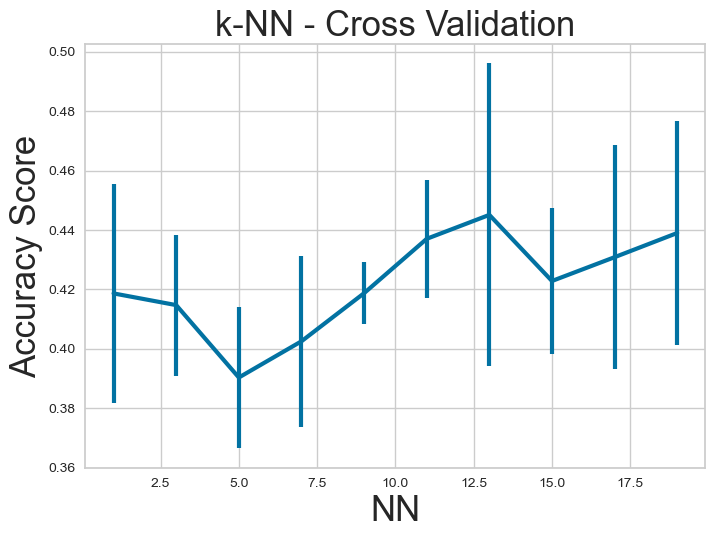

In [110]:
nn_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
x_train_nn, x_test_nn, y_train_nn, y_test_nn = train_test_split(X, y, test_size = 0.2, random_state=(1))
merr = []
serr = []

for nn in nn_range:
    knn_model = KNeighborsClassifier(n_neighbors=nn, weights='uniform')
    knn_model.fit(x_train_nn, y_train_nn)
    y_pred_nn = knn_model.predict(x_test_nn)
    print("NN = ", nn)
    print('Train accuracy score:',knn_model.score(x_train_nn, y_train_nn))
    print('Test accuracy score:',knn_model.score(x_test_nn, y_test_nn))
    
    scores_knn = cross_val_score(knn_model, x_test_nn, y_test_nn, cv=5, scoring='accuracy')
    merr.append(np.array(scores_knn).mean())
    serr.append(np.array(scores_knn).std())

plt.errorbar(nn_range, merr, yerr = serr, linewidth=3)
plt.xlabel('NN', fontsize=25)
plt.ylabel('Accuracy Score', fontsize=25)
title_cv = f"k-NN - Cross Validation"
plt.title(title_cv, fontsize=25)
plt.show()

#### ROC-AUC Curve

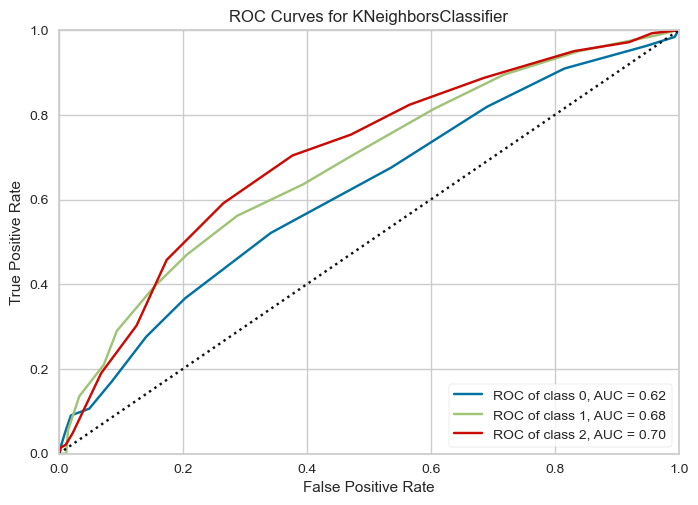

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [111]:
visualizer = ROCAUC(knn_model, classes=["0", "1", "2"], macro=False, micro=False)

visualizer.fit(x_train_nn, y_train_nn)
visualizer.score(x_test_nn, y_test_nn)        
visualizer.show() 

## Review Scores Value
### Logistic Regression
#### Defining the Input and Target Variables

In [112]:
X = listings[
                ['host_response_time', 'host_response_rate', 'host_acceptance_rate',
                 'bedrooms', 'beds','neighbourhood_cleansed',
                 'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
                 'host_identity_verified', 'room_type',
                 'accommodates','price', 'minimum_nights', 'maximum_nights',
                 'bath-products','electric-system',
                 'food-services','house-furniture','house-rules',
                 'kitchen-appliances','parking','recreation','safety',
                 'host_email','host_work_email'] + list(reviews.columns[2:])
]

In [113]:
y = listings[['review_scores_value']]
y = (y/y.max())*100

y = y.assign(
    rating_bin_ep = pd.qcut(
        y['review_scores_value'],
        q=3,
        duplicates='drop',
        labels=[0,1,2]
    )
)

#### Min Max of Each Bin

In [114]:
y.groupby('rating_bin_ep').min()

review_scores_value
rating_bin_ep                     
0                             20.0
1                             92.2
2                             96.6

In [115]:
y.groupby('rating_bin_ep').max()

review_scores_value
rating_bin_ep                     
0                             92.0
1                             96.4
2                            100.0

#### Splitting Data in 75-25 Ratio

In [116]:
y = y['rating_bin_ep']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### Number of Records in Each Bin

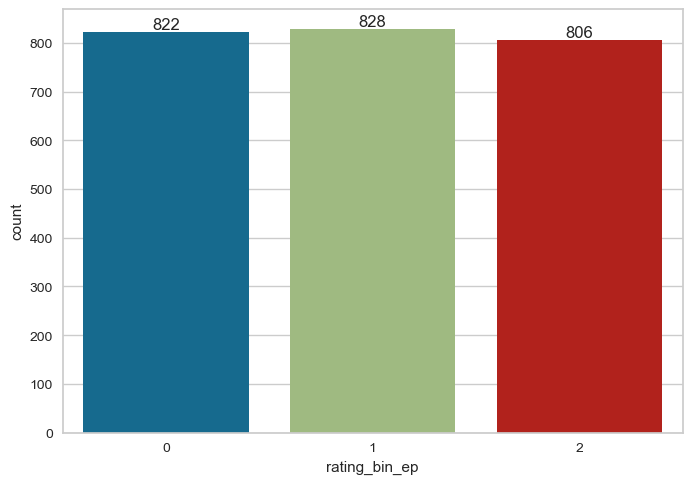

In [117]:
cnt_plt = sns.countplot(y)
cnt_plt.bar_label(cnt_plt.containers[0])
plt.show()

#### Logistic Regression - Varied C Range, using 'newton-cg' solver and multi_class='multinomial'

C =  0.001
Train accuracy score: 0.48697068403908794
Test accuracy score: 0.49185667752442996
Mean Squared Error:  1.01628664495114
C =  0.1
Train accuracy score: 0.5401737242128122
Test accuracy score: 0.49185667752442996
Mean Squared Error:  1.006514657980456
C =  1
Train accuracy score: 0.5716612377850163
Test accuracy score: 0.509771986970684
Mean Squared Error:  0.9104234527687296
C =  10
Train accuracy score: 0.5814332247557004
Test accuracy score: 0.5179153094462541
Mean Squared Error:  0.8778501628664495
C =  100
Train accuracy score: 0.5814332247557004
Test accuracy score: 0.5244299674267101
Mean Squared Error:  0.8664495114006515
C =  1000
Train accuracy score: 0.5819761129207384
Test accuracy score: 0.5228013029315961
Mean Squared Error:  0.8631921824104235


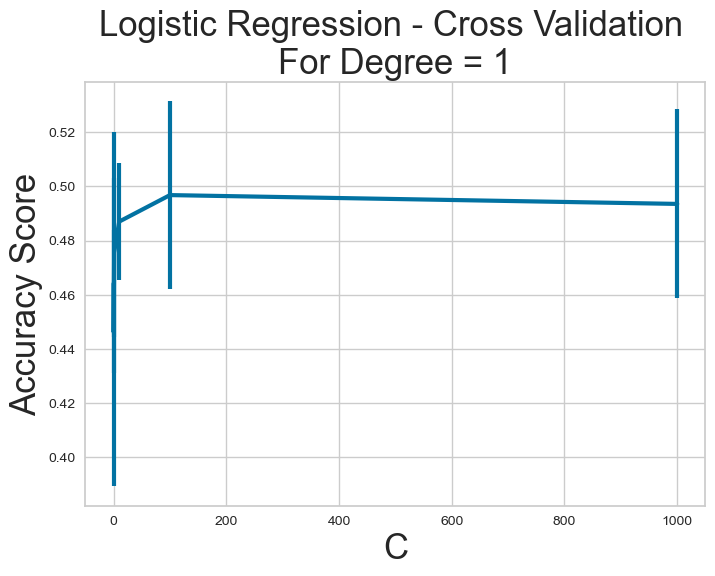

In [118]:
c_range = [0.001, 0.1, 1, 10, 100, 1000]
mean_error = []
std_error = []
for c in sorted(c_range):
    logit = LogisticRegression(C=c, random_state=0, solver='newton-cg',multi_class='multinomial')
    logit.fit(X_train, y_train)
    y_pred = logit.predict(X_test)
    print("C = ",c)
    print('Train accuracy score:',logit.score(X_train, y_train))
    print('Test accuracy score:',logit.score(X_test, y_test))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    scores = cross_val_score(logit, X_test, y_test, cv=5, scoring='accuracy')
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())
plt.errorbar(c_range, mean_error, yerr = std_error, linewidth=3)
plt.xlabel('C', fontsize=25)
plt.ylabel('Accuracy Score', fontsize=25)
title_cv = "Logistic Regression - Cross Validation \nFor Degree = 1"
plt.title(title_cv, fontsize=25)
plt.show()

#### Feature Importance

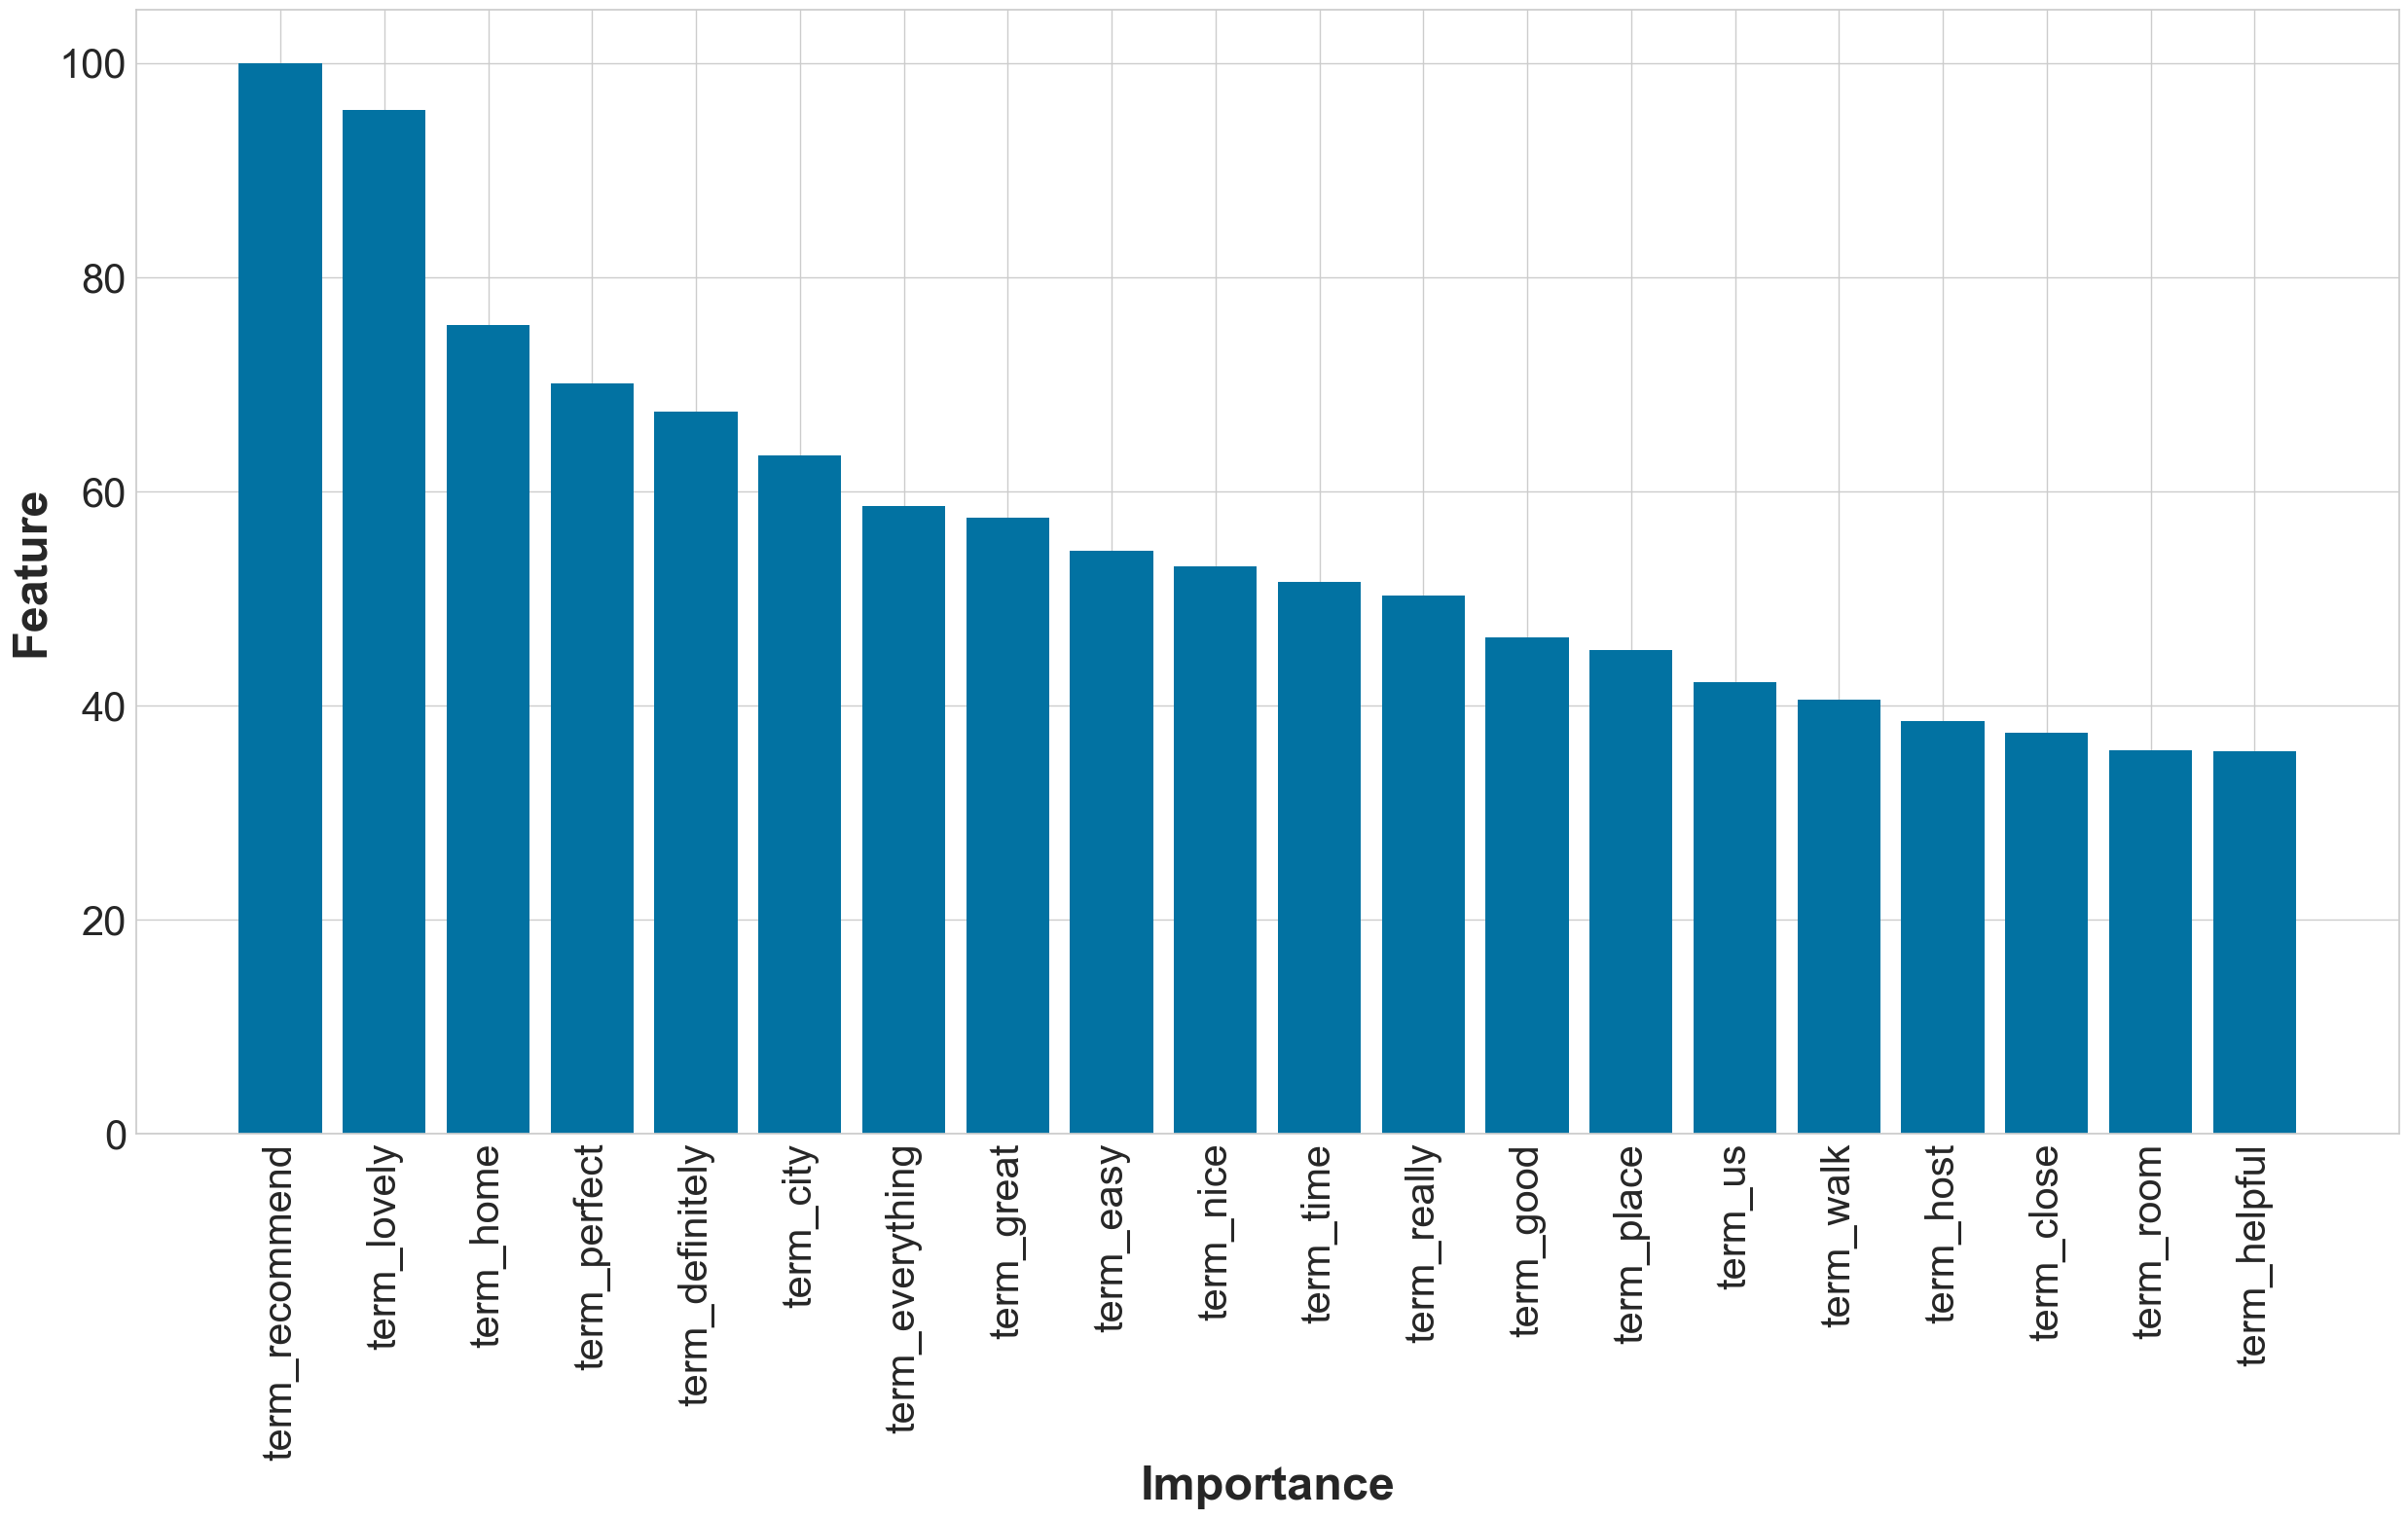

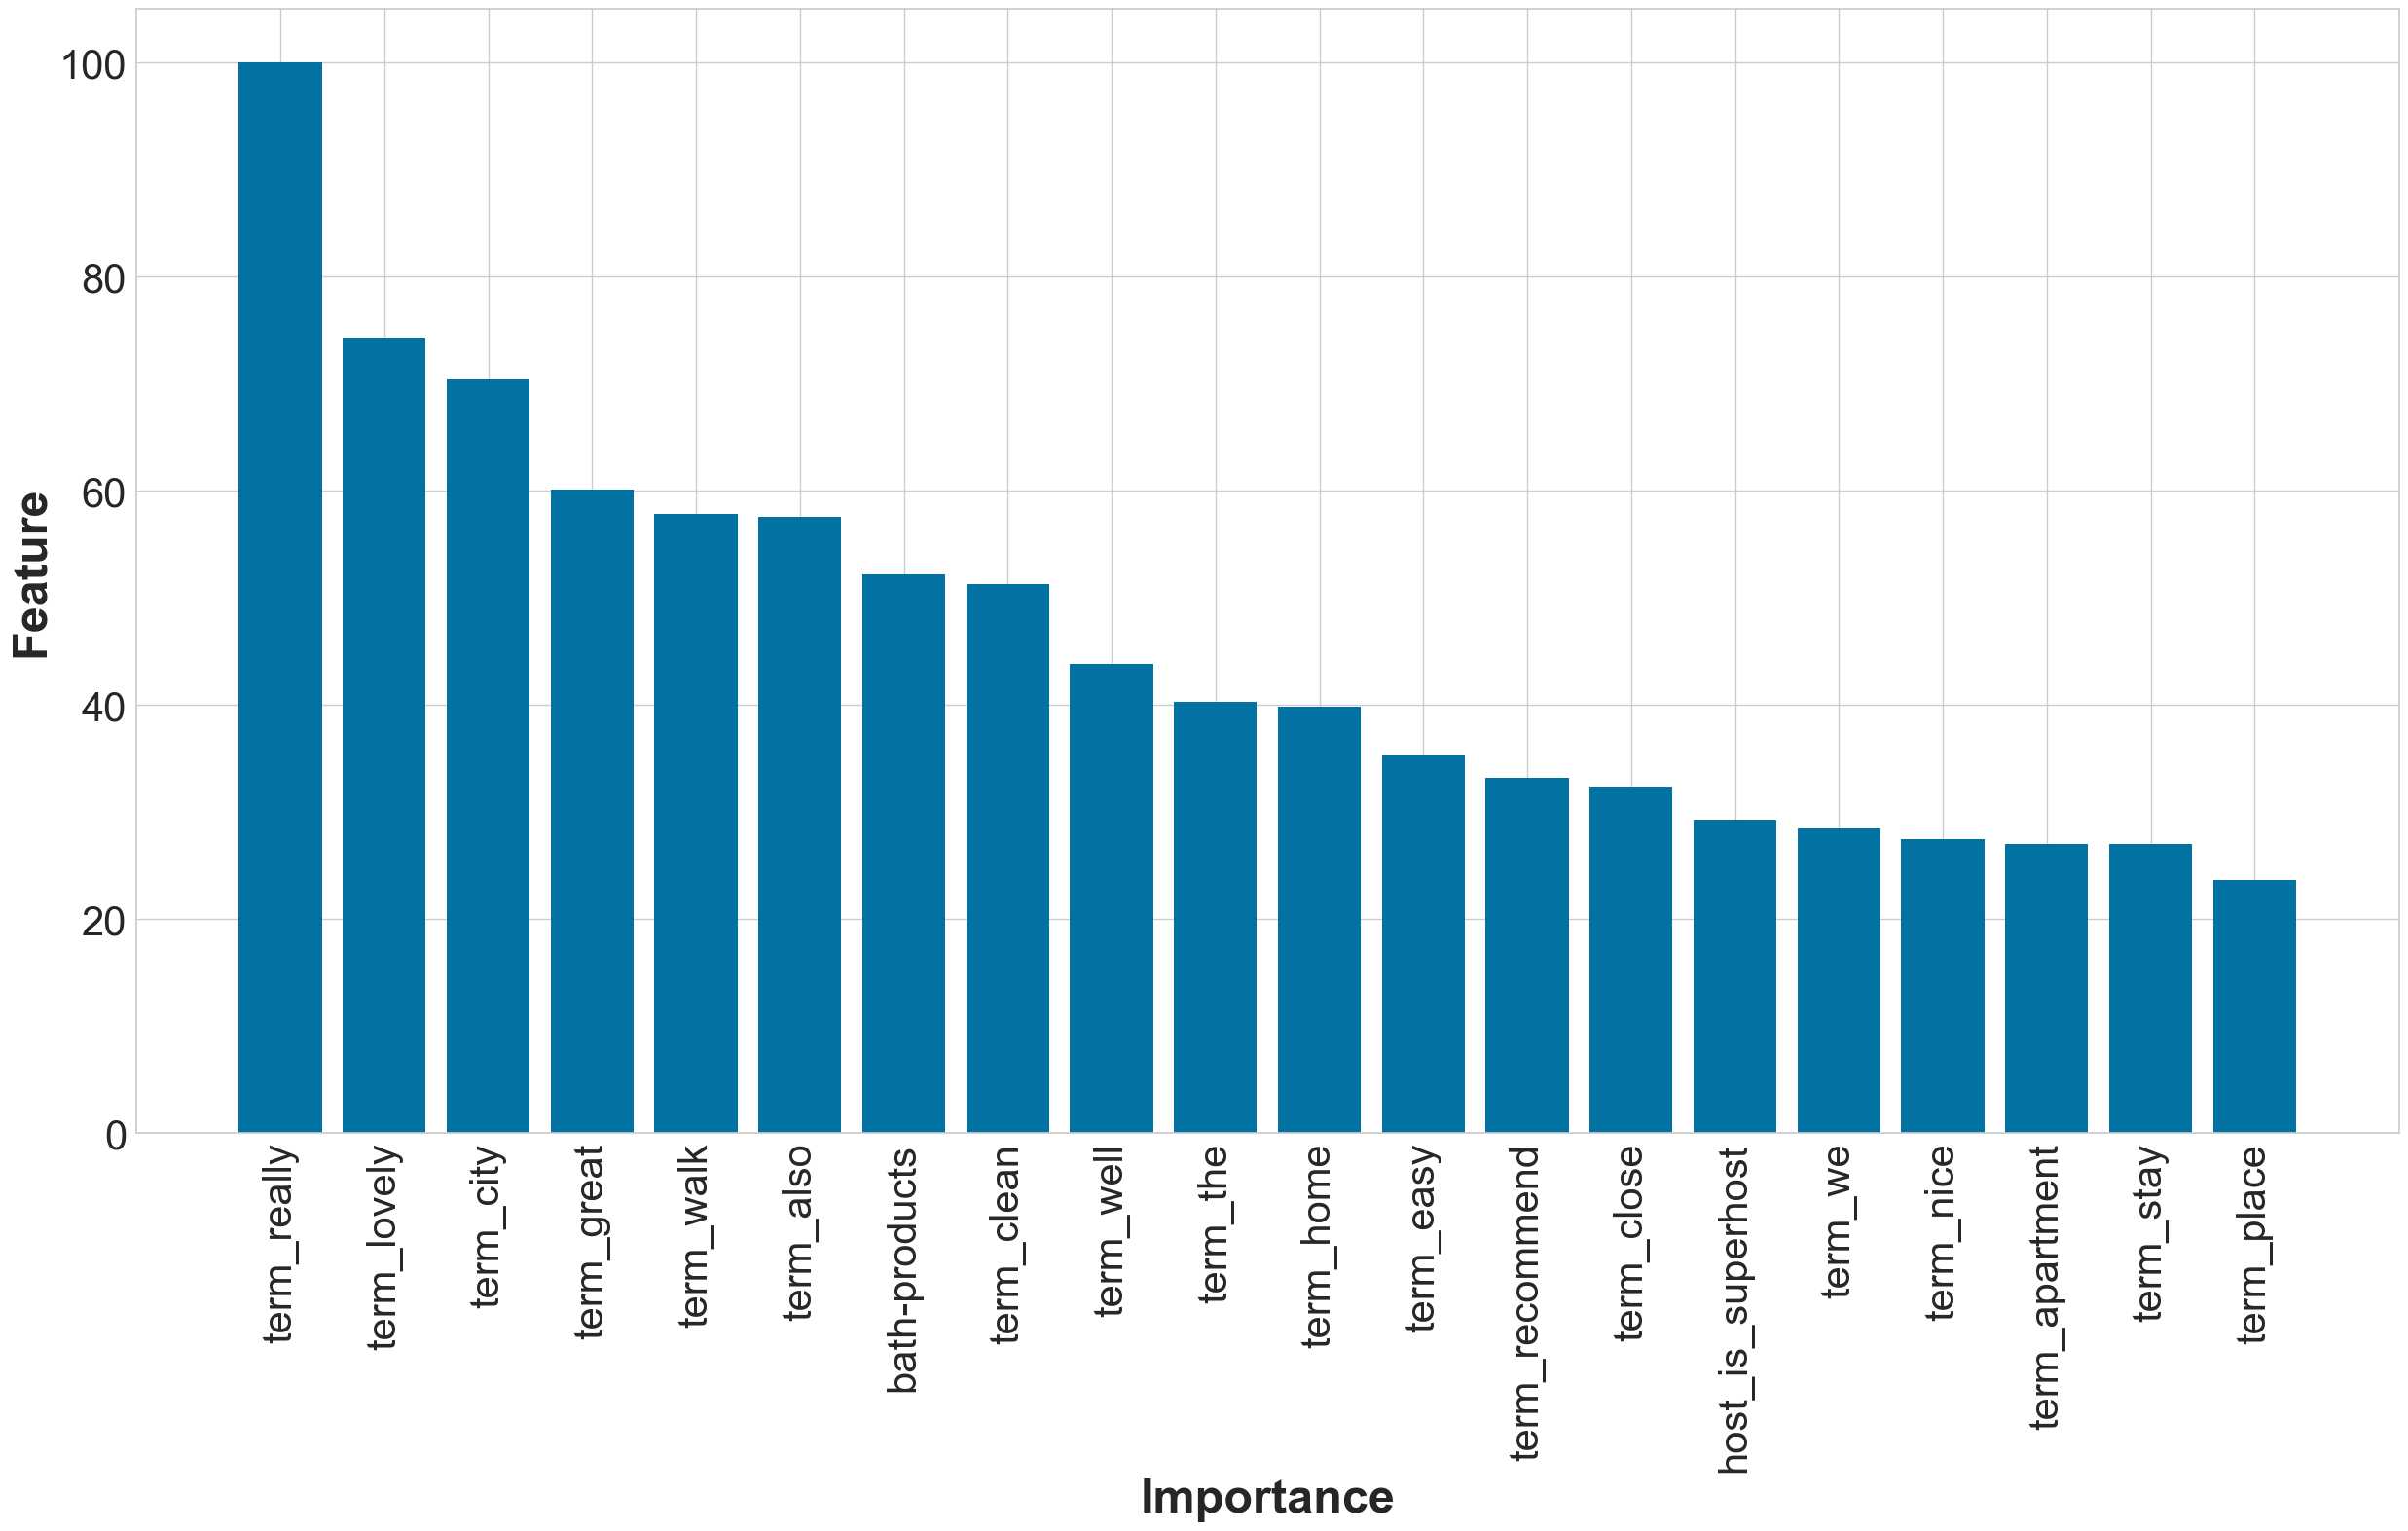

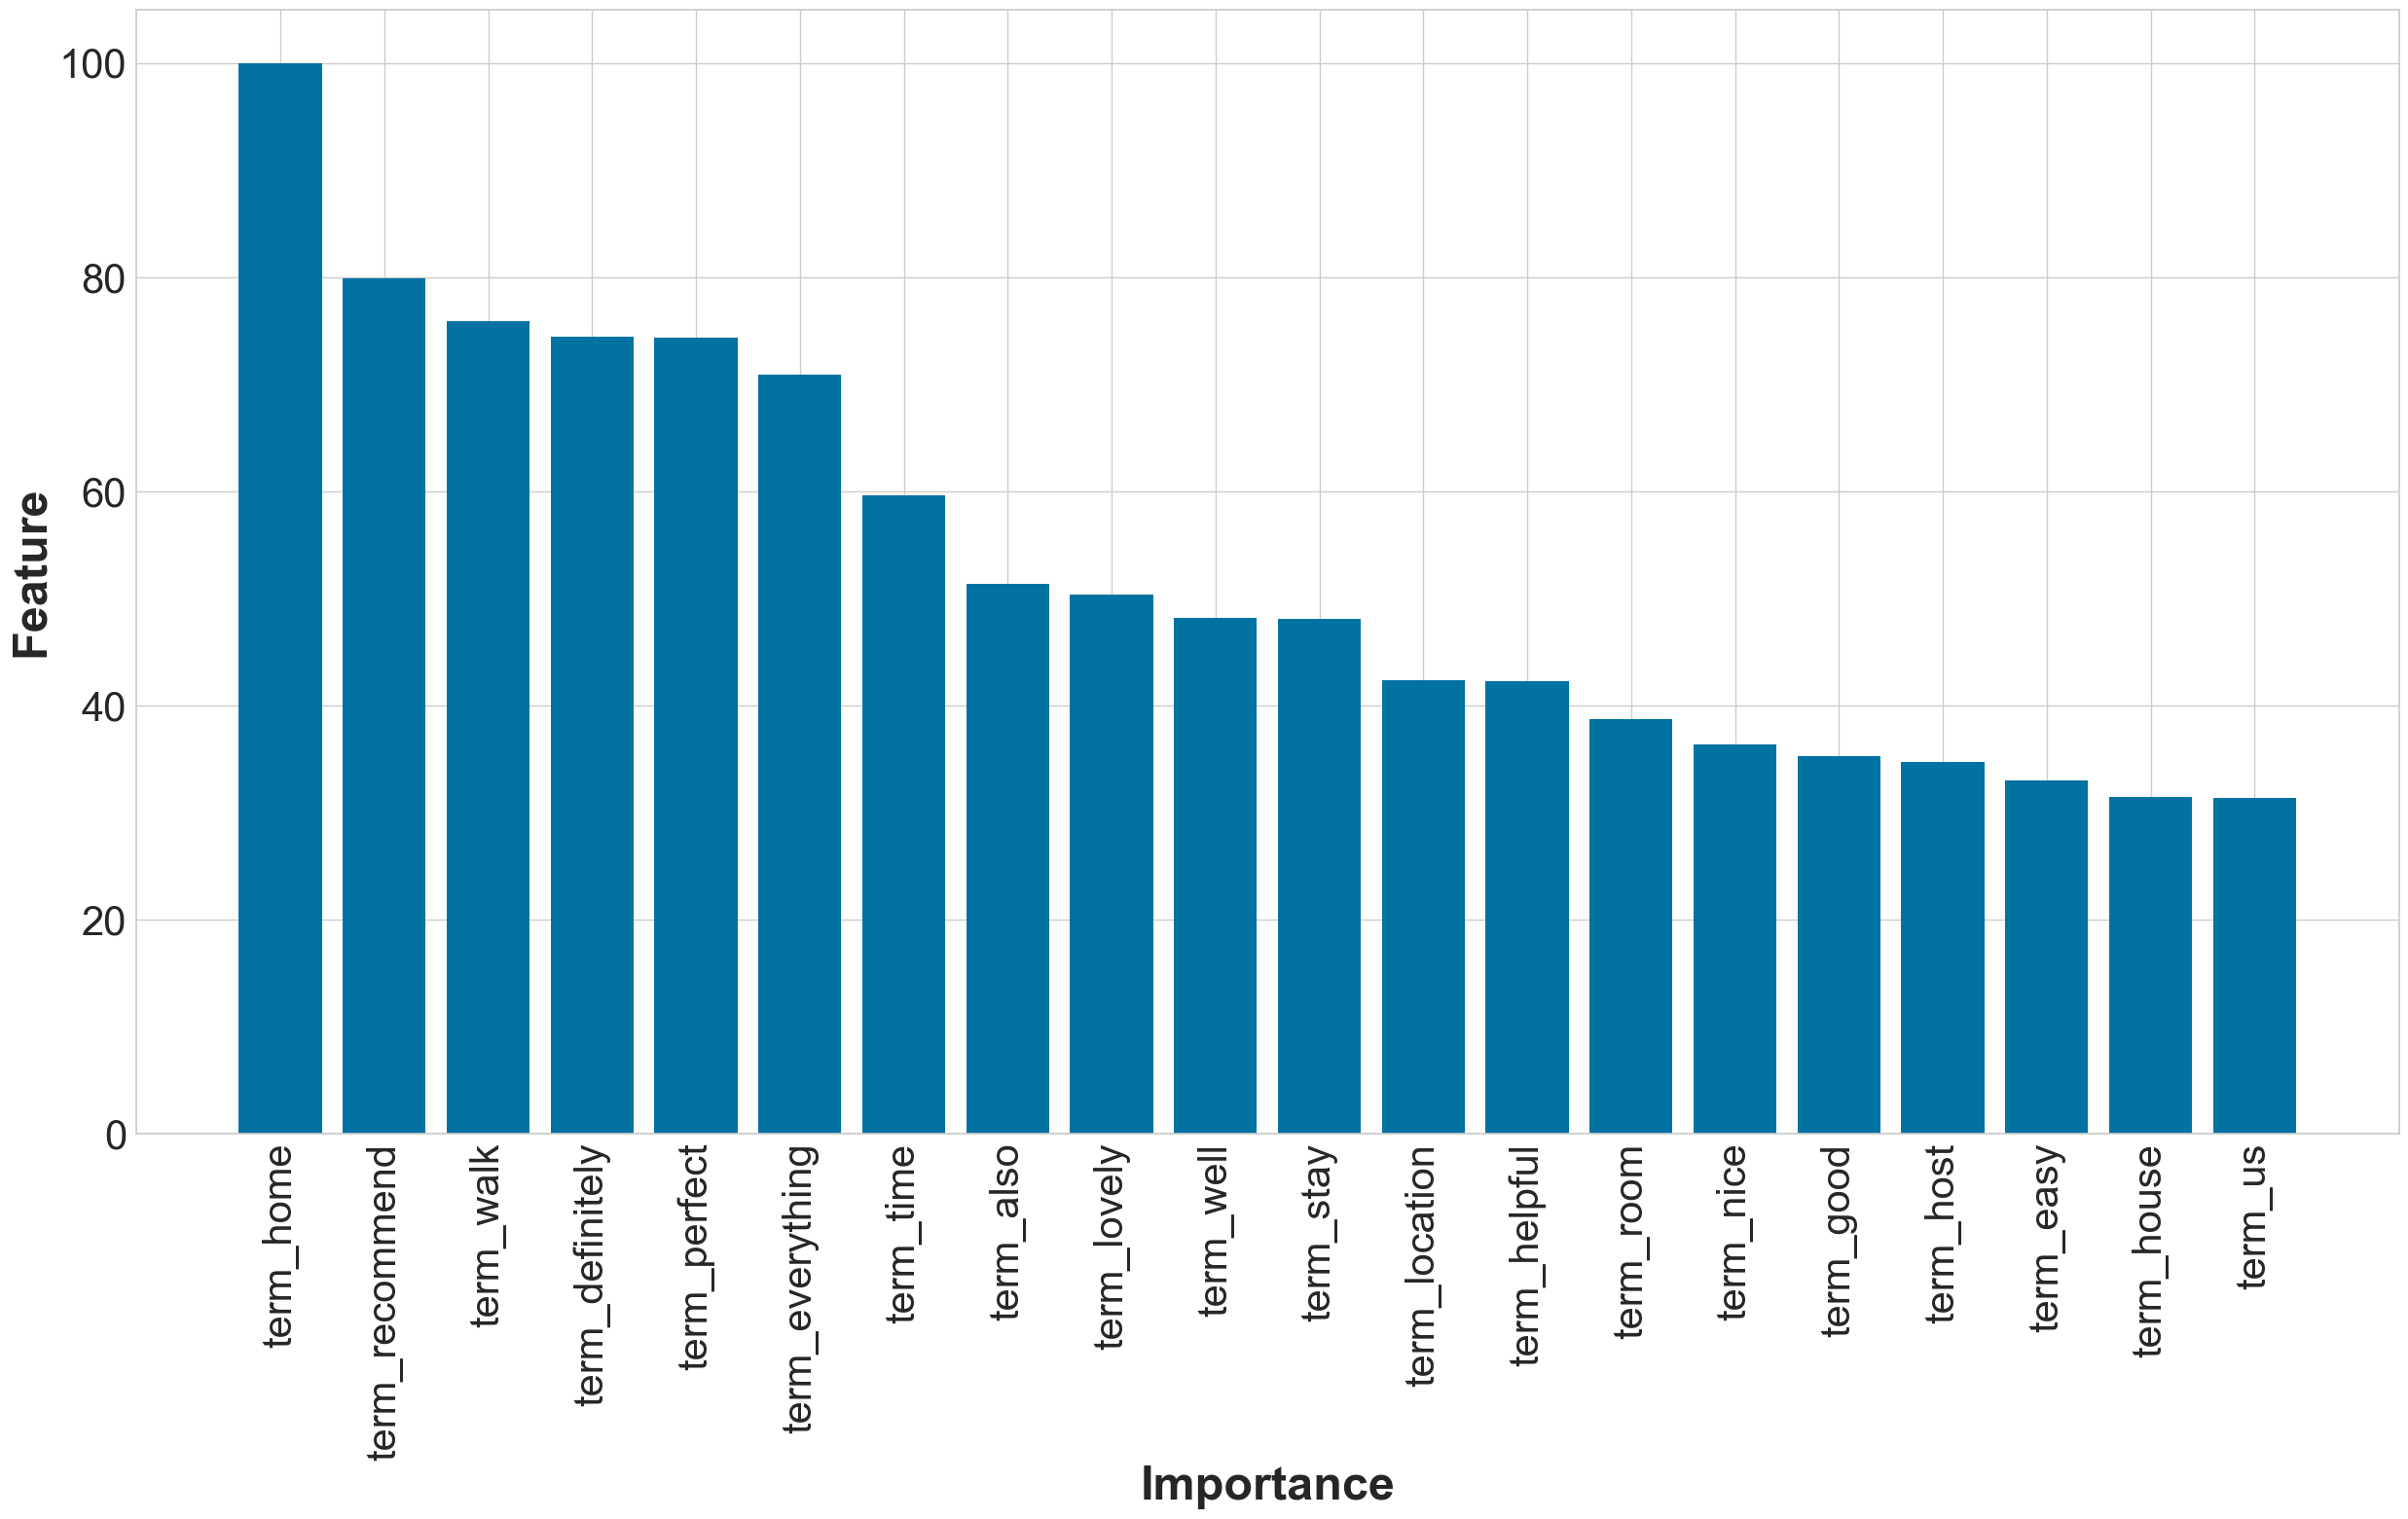

In [119]:
cols = X.columns
cols = np.asarray(cols)

plt.figure(figsize=(30,15))
feature_importance = abs(logit.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
top_features = pd.DataFrame({'feature_imp': feature_importance, 
                             'features': cols}, columns=['feature_imp', 'features'])
top_features = top_features.sort_values(by='feature_imp', ascending=False).head(20)
plt.bar(top_features.features, top_features.feature_imp)
plt.xlabel('Importance', fontsize=35, fontweight='bold')
plt.ylabel('Feature', fontsize=35, fontweight='bold')
plt.xticks(fontsize=30, rotation = 90)
plt.yticks(fontsize=30)
plt.show()

plt.figure(figsize=(30,15))
feature_importance = abs(logit.coef_[1])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
top_features = pd.DataFrame({'feature_imp': feature_importance, 
                             'features': cols}, columns=['feature_imp', 'features'])
top_features = top_features.sort_values(by='feature_imp', ascending=False).head(20)
plt.bar(top_features.features, top_features.feature_imp)
plt.xlabel('Importance', fontsize=35, fontweight='bold')
plt.ylabel('Feature', fontsize=35, fontweight='bold')
plt.xticks(fontsize=30, rotation = 90)
plt.yticks(fontsize=30)
plt.show()

plt.figure(figsize=(30,15))
feature_importance = abs(logit.coef_[2])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
top_features = pd.DataFrame({'feature_imp': feature_importance, 
                             'features': cols}, columns=['feature_imp', 'features'])
top_features = top_features.sort_values(by='feature_imp', ascending=False).head(20)
plt.bar(top_features.features, top_features.feature_imp)
plt.xlabel('Importance', fontsize=35, fontweight='bold')
plt.ylabel('Feature', fontsize=35, fontweight='bold')
plt.xticks(fontsize=30, rotation = 90)
plt.yticks(fontsize=30)
plt.show()

#### ROC-AUC Curve for all three categories

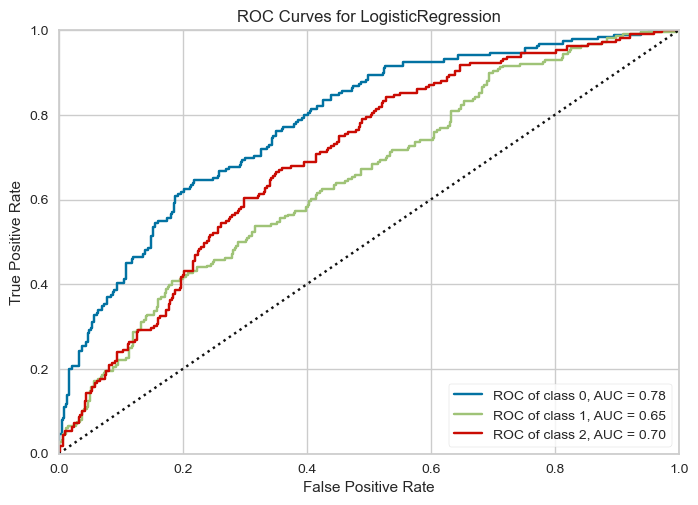

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [120]:
visualizer = ROCAUC(logit, classes=["0", "1", "2"], macro=False, micro=False)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)        
visualizer.show() 

#### Polynomial Degree and Error Plots

 Logistic Regression
 For Degree =  2
 For C =  0.001
 Confusion Matrix - 
 [[117  36  33]
 [ 28  82  38]
 [ 38  32  88]]
 Train accuracy score:  0.6435845213849287
 Test accuracy score:  0.5833333333333334
 F1 Score =  0.7192982456140351
 Classification Report
               precision    recall  f1-score   support

           0       0.64      0.63      0.63       186
           1       0.55      0.55      0.55       148
           2       0.55      0.56      0.56       158

    accuracy                           0.58       492
   macro avg       0.58      0.58      0.58       492
weighted avg       0.58      0.58      0.58       492



 Logistic Regression
 For Degree =  2
 For C =  0.1
 Confusion Matrix - 
 [[117  36  33]
 [ 28  81  39]
 [ 40  32  86]]
 Train accuracy score:  0.6425661914460286
 Test accuracy score:  0.5772357723577236
 F1 Score =  0.7168141592920354
 Classification Report
               precision    recall  f1-score   support

           0       0.63      0.63     

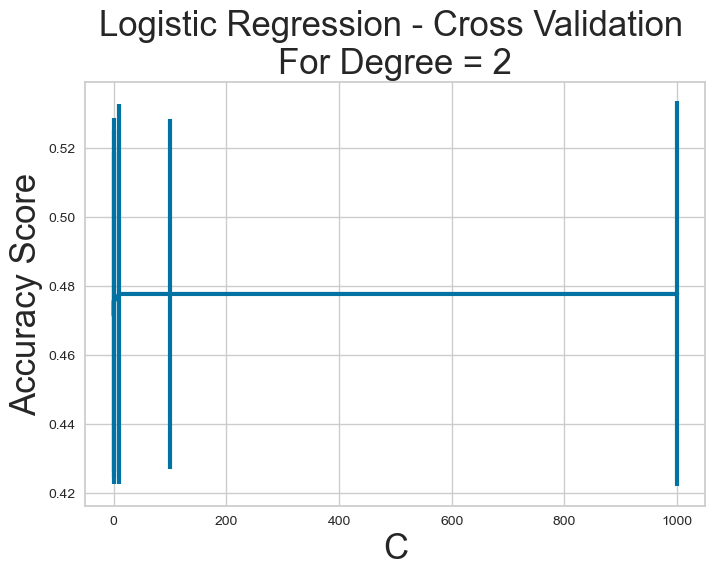

In [121]:
c_range = [0.001, 0.1, 1, 10, 100, 1000]
degree_range = [2]

for i in degree_range:
    trans = PolynomialFeatures(degree = i)
    x_poly = trans.fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state=(1))
    mean_error = []
    std_error = []
    for c in c_range:
        log_reg = LogisticRegression(C = c, random_state=0, solver='newton-cg',multi_class='multinomial')
        log_reg.fit(x_train, y_train)
        y_pred = log_reg.predict(x_test)
        
        cnf_mtx = metrics.confusion_matrix(y_test, y_pred)
        f1_score = (2*cnf_mtx[1][1])/((2*cnf_mtx[1][1]) + cnf_mtx[0][1] + cnf_mtx[1][0])
        
        scores = cross_val_score(log_reg, x_test, y_test, cv=5, scoring='accuracy')
        mean_error.append(np.array(scores).mean())
        std_error.append(np.array(scores).std())
        
        
        print(" Logistic Regression")
        print(" For Degree = ", i)
        print(" For C = ", c)
        print(" Confusion Matrix - \n", cnf_mtx)
        print(' Train accuracy score: ', log_reg.score(x_train, y_train))
        print(' Test accuracy score: ', log_reg.score(x_test, y_test))
        print(" F1 Score = ", f1_score)
        print(" Classification Report\n", classification_report(y_test, y_pred))
        print("\n")
    
    plt.errorbar(c_range, mean_error, yerr = std_error, linewidth=3)
    plt.xlabel('C', fontsize=25)
    plt.ylabel('Accuracy Score', fontsize=25)
    title_cv = f"Logistic Regression - Cross Validation \nFor Degree = {i}"
    plt.title(title_cv, fontsize=25)
    plt.show()

#### k-NN Classifier

NN =  1
Train accuracy score: 1.0
Test accuracy score: 0.4186991869918699
NN =  3
Train accuracy score: 0.6761710794297352
Test accuracy score: 0.4634146341463415
NN =  5
Train accuracy score: 0.6176171079429735
Test accuracy score: 0.45528455284552843
NN =  7
Train accuracy score: 0.5824847250509165
Test accuracy score: 0.43902439024390244
NN =  9
Train accuracy score: 0.5610997963340122
Test accuracy score: 0.45121951219512196
NN =  11
Train accuracy score: 0.5386965376782077
Test accuracy score: 0.45528455284552843
NN =  13
Train accuracy score: 0.5371690427698574
Test accuracy score: 0.4451219512195122
NN =  15
Train accuracy score: 0.5269857433808554
Test accuracy score: 0.45121951219512196
NN =  17
Train accuracy score: 0.5132382892057027
Test accuracy score: 0.46747967479674796
NN =  19
Train accuracy score: 0.5081466395112016
Test accuracy score: 0.4654471544715447


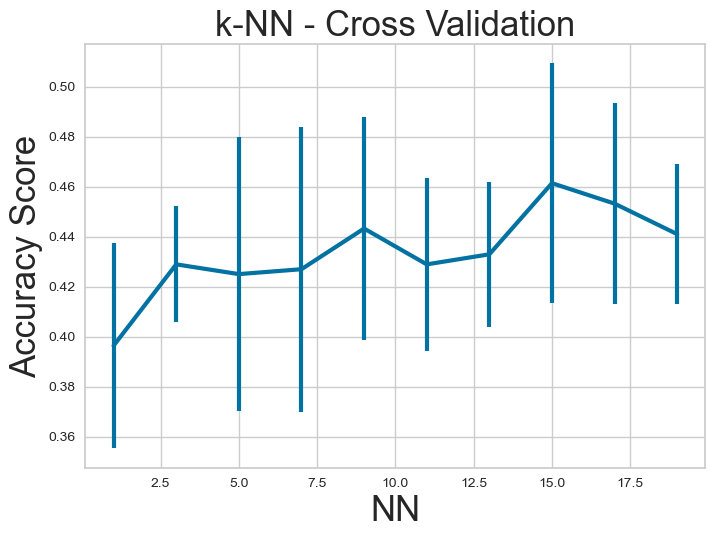

In [122]:
nn_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
x_train_nn, x_test_nn, y_train_nn, y_test_nn = train_test_split(X, y, test_size = 0.2, random_state=(1))
merr = []
serr = []

for nn in nn_range:
    knn_model = KNeighborsClassifier(n_neighbors=nn, weights='uniform')
    knn_model.fit(x_train_nn, y_train_nn)
    y_pred_nn = knn_model.predict(x_test_nn)
    print("NN = ", nn)
    print('Train accuracy score:',knn_model.score(x_train_nn, y_train_nn))
    print('Test accuracy score:',knn_model.score(x_test_nn, y_test_nn))
    
    scores_knn = cross_val_score(knn_model, x_test_nn, y_test_nn, cv=5, scoring='accuracy')
    merr.append(np.array(scores_knn).mean())
    serr.append(np.array(scores_knn).std())

plt.errorbar(nn_range, merr, yerr = serr, linewidth=3)
plt.xlabel('NN', fontsize=25)
plt.ylabel('Accuracy Score', fontsize=25)
title_cv = f"k-NN - Cross Validation"
plt.title(title_cv, fontsize=25)
plt.show()

#### ROC-AUC Curve

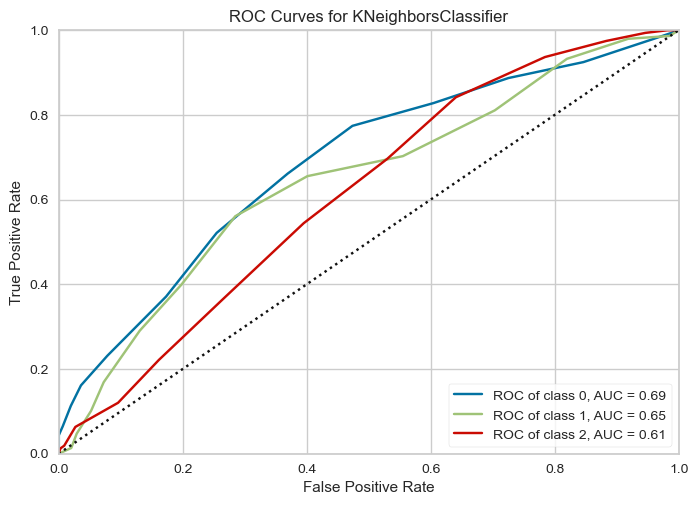

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [123]:
visualizer = ROCAUC(knn_model, classes=["0", "1", "2"], macro=False, micro=False)

visualizer.fit(x_train_nn, y_train_nn)
visualizer.score(x_test_nn, y_test_nn)        
visualizer.show() 